<div align="center">

# 📊 Análisis y Predicción de Customer Churn en Telco

<img src="https://img.shields.io/badge/Python-3.8+-blue.svg" alt="Python">
<img src="https://img.shields.io/badge/Scikit--learn-Latest-orange.svg" alt="Scikit-learn">
<img src="https://img.shields.io/badge/Status-Production%20Ready-success.svg" alt="Status">
<img src="https://img.shields.io/badge/Platform-Google%20Colab-yellow.svg" alt="Platform">

</div>

---

## 📋 Tabla de Contenidos

| # | Sección | Descripción |
|:---:|---------|-------------|
| 0 | [⚙️ Configuración](#0-configuración-e-importaciones) | Imports, semillas y funciones auxiliares |
| 1 | [📂 Carga de Datos](#1-carga-y-exploración-de-datos) | Carga robusta y exploración inicial |
| 2 | [🧹 Limpieza](#2-limpieza-de-datos) | Tratamiento de nulos y conversión de tipos |
| 3 | [📊 EDA](#3-análisis-exploratorio-eda) | Análisis exploratorio de datos |
| 4 | [🔧 Feature Engineering](#4-feature-engineering) | Creación de nuevas características |
| 5 | [✂️ Preparación](#5-preparación-de-datos) | División train/test y pipeline |
| 6 | [🤖 Modelos Baseline](#6-modelos-baseline) | Entrenamiento de 7 algoritmos |
| 7 | [⚖️ Balanceo](#7-comparativa-de-balanceo) | SMOTE, SMOTE+Tomek, Undersampling |
| 8 | [🎯 Optimización](#8-optimización-de-hiperparámetros) | RandomizedSearchCV |
| 9 | [📈 Evaluación](#9-evaluación-del-mejor-modelo) | Métricas y curvas ROC |
| 10 | [🔍 Interpretabilidad](#10-interpretabilidad-y-robustez) | Feature importance y validación |
| 11 | [💾 Guardado](#11-guardado-del-modelo) | Exportar modelo para producción |
| 12 | [📋 Resumen](#12-resumen-técnico) | Metodología y resultados |
| 13 | [📝 Informe](#13-generación-de-informe) | Informe automático |

---

## 🎯 Descripción del Proyecto

> **Objetivo Principal:** Desarrollar modelos de Machine Learning que identifiquen clientes con alta probabilidad de abandono (churn), facilitando estrategias de retención proactivas.

| Impacto | Valor Esperado |
|---------|----------------|
| 🎯 Reducción de churn | 15-25% |
| 💰 Ahorro anual | $500K-$1M |
| 📊 ROI de campañas | >300% |

---

## 📦 Dataset

| Característica | Valor |
|----------------|-------|
| 📊 Registros | 7,043 clientes |
| 🔢 Variables | 21 + 1 objetivo |
| 🎯 Objetivo | Churn (Yes/No) |
| ⚖️ Balance | 73% No / 27% Yes |

---

# ⚙️ 0. Configuración e Importaciones

> **Propósito:** Cargar todas las librerías necesarias, configurar semillas de reproducibilidad y definir funciones auxiliares.

| Categoría | Librerías | Uso |
|-----------|----------|-----|
| 🐼 Datos | Pandas, NumPy | Manipulación |
| 📊 Visualización | Matplotlib, Seaborn | Gráficos |
| 🤖 ML | Scikit-learn, XGBoost | Modelos |
| ⚖️ Balanceo | Imbalanced-learn | SMOTE |

In [41]:
# ============================================================================
# 📦 IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

import os
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📦 CARGANDO LIBRERÍAS...")
print("="*80)

# ----------------------------------------------------------------------------
# 🐼 Manipulación de datos
# ----------------------------------------------------------------------------
import numpy as np
import pandas as pd
print("✅ Pandas & NumPy")

# ----------------------------------------------------------------------------
# 📊 Visualización
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
print("✅ Matplotlib & Seaborn")

# ----------------------------------------------------------------------------
# 🔧 Preprocesamiento
# ----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
print("✅ Scikit-learn (Preprocesamiento)")

# ----------------------------------------------------------------------------
# 🤖 Modelos de Machine Learning
# ----------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
print("✅ Modelos (7 algoritmos)")

# ----------------------------------------------------------------------------
# 📈 Métricas de Evaluación
# ----------------------------------------------------------------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
print("✅ Métricas de evaluación")

# ----------------------------------------------------------------------------
# ⚖️ Manejo de Desbalanceo de Clases
# ----------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
print("✅ Imbalanced-learn (3 técnicas de balanceo)")

# ----------------------------------------------------------------------------
# 🎯 Optimización de Hiperparámetros
# ----------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
print("✅ Optimización (GridSearch & RandomizedSearch)")

# ----------------------------------------------------------------------------
# 🛠️ Utilidades
# ----------------------------------------------------------------------------
from datetime import datetime, timezone
import json
import joblib
import sys
import sklearn

# Configurar zona horaria de Colombia (UTC-5)
try:
    from zoneinfo import ZoneInfo
    COLOMBIA_TZ = ZoneInfo('America/Bogota')
except ImportError:
    import pytz
    COLOMBIA_TZ = pytz.timezone('America/Bogota')

def get_colombia_time():
    """Obtiene la hora actual en zona horaria de Colombia."""
    return datetime.now(COLOMBIA_TZ)

print("✅ Utilidades (datetime, json, joblib)")
print(f"🌎 Zona horaria configurada: Colombia (America/Bogota)")

print("\n" + "="*80)
print("✅ TODAS LAS LIBRERÍAS CARGADAS EXITOSAMENTE")
print("="*80)
print(f"\n📌 Versiones:")
print(f"   • Python: {sys.version.split()[0]}")
print(f"   • Pandas: {pd.__version__}")
print(f"   • NumPy: {np.__version__}")
print(f"   • Scikit-learn: {sklearn.__version__}")
print(f"   • XGBoost: {xgb.__version__}")
print()



📦 CARGANDO LIBRERÍAS...
✅ Pandas & NumPy
✅ Matplotlib & Seaborn
✅ Scikit-learn (Preprocesamiento)
✅ Modelos (7 algoritmos)
✅ Métricas de evaluación
✅ Imbalanced-learn (3 técnicas de balanceo)
✅ Optimización (GridSearch & RandomizedSearch)
✅ Utilidades (datetime, json, joblib)
🌎 Zona horaria configurada: Colombia (America/Bogota)

✅ TODAS LAS LIBRERÍAS CARGADAS EXITOSAMENTE

📌 Versiones:
   • Python: 3.12.12
   • Pandas: 2.2.2
   • NumPy: 2.0.2
   • Scikit-learn: 1.6.1
   • XGBoost: 3.1.2




## �� 0.1 Configuración de Reproducibilidad

> Controla si los resultados son reproducibles (`REPRODUCIBLE_MODE=True`) o experimentales (`False`).

In [42]:
# ============================================================================
# ⚙️ CONFIGURACIÓN GLOBAL DE REPRODUCIBILIDAD
# ============================================================================

#@title 🎛️ **Parámetros de Configuración** { display-mode: "form" }

#@markdown ### 🎲 Modo de Reproducibilidad
#@markdown Selecciona el modo de ejecución del notebook:

REPRODUCIBLE_MODE = True #@param {type:"boolean"}

#@markdown ---
#@markdown ### 🔢 Semilla Fija (solo si modo reproducible está activado)
FIXED_SEED = 42 #@param {type:"integer"}

#@markdown ---

# ============================================================================
# Aplicar configuración
# ============================================================================

print("\n" + "="*80)
print("⚙️  CONFIGURACIÓN DE REPRODUCIBILIDAD")
print("="*80 + "\n")

if REPRODUCIBLE_MODE:
    RANDOM_STATE = FIXED_SEED
    print("🔒 MODO REPRODUCIBLE ACTIVADO")
    print("="*80)
    print(f"   ✅ Semilla fija: {RANDOM_STATE}")
    print(f"   ✅ Los resultados serán idénticos en cada ejecución")
    print(f"   ✅ Ideal para: documentación, presentaciones, validación")
else:
    RANDOM_STATE = np.random.randint(0, 10000)
    print("🔬 MODO EXPERIMENTAL ACTIVADO")
    print("="*80)
    print(f"   🎲 Semilla aleatoria: {RANDOM_STATE}")
    print(f"   🔄 Los resultados variarán en cada ejecución")
    print(f"   🧪 Ideal para: experimentación, prueba de robustez")

print("\n" + "="*80)
print(f"📌 RANDOM_STATE = {RANDOM_STATE}")
print("="*80 + "\n")



⚙️  CONFIGURACIÓN DE REPRODUCIBILIDAD

🔒 MODO REPRODUCIBLE ACTIVADO
   ✅ Semilla fija: 42
   ✅ Los resultados serán idénticos en cada ejecución
   ✅ Ideal para: documentación, presentaciones, validación

📌 RANDOM_STATE = 42




## 💰 0.2 Función de Análisis de ROI

> Traduce métricas técnicas del modelo a valor de negocio (clientes salvados, ingresos protegidos, ROI).

In [43]:
# ============================================================================
# 💰 FUNCIÓN DE ANÁLISIS DE ROI (RETORNO DE INVERSIÓN)
# ============================================================================

def reporte_negocio(modelo, X_test, y_test,
                    ltv_cliente=2000,
                    costo_retencion=150,
                    tasa_exito=0.5,
                    verbose=True):
    """
    Calcula el ROI (Retorno de Inversión) de una campaña de retención
    basada en las predicciones del modelo.

    Parámetros:
    -----------
    modelo : estimator
        Modelo entrenado con método predict()
    X_test : array-like
        Datos de prueba (features)
    y_test : array-like
        Etiquetas reales de prueba
    ltv_cliente : float, default=2000
        Lifetime Value promedio de un cliente (en $)
    costo_retencion : float, default=150
        Costo promedio de un incentivo de retención (en $)
    tasa_exito : float, default=0.5
        Tasa de éxito de la campaña de retención (0-1)
    verbose : bool, default=True
        Si True, imprime el reporte detallado

    Returns:
    --------
    dict : Diccionario con métricas de negocio
        - clientes_salvados: Número estimado de clientes retenidos
        - inversion_retencion: Costo total de la campaña
        - ingresos_protegidos: Valor total de clientes retenidos
        - roi_neto: Ganancia neta (ingresos - inversión)
        - roi_porcentaje: ROI como porcentaje
    """
    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Calcular matriz de confusión
    tp = np.sum((y_pred == 1) & (y_test == 1))  # Verdaderos Positivos: Churns detectados correctamente
    fp = np.sum((y_pred == 1) & (y_test == 0))  # Falsos Positivos: No-churns clasificados como churn
    fn = np.sum((y_pred == 0) & (y_test == 1))  # Falsos Negativos: Churns no detectados
    tn = np.sum((y_pred == 0) & (y_test == 0))  # Verdaderos Negativos: No-churns correctos

    # Cálculos de negocio
    clientes_contactados = tp + fp  # Total de clientes a los que se les ofrece incentivo
    clientes_salvados = tp * tasa_exito  # Clientes que realmente se quedan
    clientes_perdidos = fn  # Churns que no detectamos

    # Métricas financieras
    inversion_retencion = clientes_contactados * costo_retencion
    ingresos_protegidos = clientes_salvados * ltv_cliente
    perdida_por_fn = clientes_perdidos * ltv_cliente  # Valor perdido por no detectar churns
    roi_neto = ingresos_protegidos - inversion_retencion

    # ROI como porcentaje
    roi_porcentaje = (roi_neto / inversion_retencion * 100) if inversion_retencion > 0 else 0

    # Imprimir reporte si verbose=True
    if verbose:
        print("\n" + "="*80)
        print("💰 ANÁLISIS DE RETORNO DE INVERSIÓN (ROI)")
        print("="*80)

        print("\n📊 PARÁMETROS DE NEGOCIO:")
        print("-" * 80)
        print(f"   • Lifetime Value por cliente:        ${ltv_cliente:,.0f}")
        print(f"   • Costo de retención por cliente:    ${costo_retencion:,.0f}")
        print(f"   • Tasa de éxito de retención:        {tasa_exito*100:.0f}%")

        print("\n🎯 RESULTADOS DE LA CAMPAÑA:")
        print("-" * 80)
        print(f"   • Clientes contactados (TP + FP):    {clientes_contactados:,}")
        print(f"   • Clientes salvados estimados:       {int(clientes_salvados):,}")
        print(f"   • Clientes perdidos (no detectados): {clientes_perdidos:,}")

        print("\n💵 ANÁLISIS FINANCIERO:")
        print("-" * 80)
        print(f"   • Inversión en retención:            ${inversion_retencion:,.0f}")
        print(f"   • Ingresos protegidos:               ${ingresos_protegidos:,.0f}")
        print(f"   • Pérdida por churns no detectados:  ${perdida_por_fn:,.0f}")
        print("-" * 80)
        print(f"   ✅ GANANCIA NETA (ROI):              ${roi_neto:,.0f}")
        print(f"   📈 ROI Porcentual:                   {roi_porcentaje:+.1f}%")

        print("\n" + "="*80)

        # Interpretación del ROI
        if roi_neto > 0:
            print(f"\n✅ La campaña es RENTABLE: Por cada $1 invertido, se recuperan ${(ingresos_protegidos/inversion_retencion):.2f}")
        else:
            print(f"\n⚠️ La campaña NO es rentable con estos parámetros. Considere ajustar:")
            print(f"   • Mejorar la precisión del modelo (reducir FP)")
            print(f"   • Reducir el costo de retención")
            print(f"   • Aumentar la tasa de éxito de retención")

        print("\n" + "="*80 + "\n")

    # Retornar métricas
    return {
        'clientes_contactados': clientes_contactados,
        'clientes_salvados': int(clientes_salvados),
        'clientes_perdidos': clientes_perdidos,
        'inversion_retencion': inversion_retencion,
        'ingresos_protegidos': ingresos_protegidos,
        'perdida_por_fn': perdida_por_fn,
        'roi_neto': roi_neto,
        'roi_porcentaje': roi_porcentaje,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'tn': tn
    }

print("✅ Función reporte_negocio() definida correctamente")
print("   Úsala después de entrenar un modelo para calcular el ROI")


✅ Función reporte_negocio() definida correctamente
   Úsala después de entrenar un modelo para calcular el ROI


---

# 📂 1. Carga y Exploración de Datos

> **Propósito:** Cargar el dataset con sistema robusto de fallbacks y realizar inspección inicial.

**Sistema de carga multinivel:**
1. 📁 Búsqueda en directorio local
2. ☁️ Montaje y búsqueda en Google Drive
3. 📤 Interfaz de carga de archivos

**Feature Engineering automático:** `Charge_Ratio`, `Total_Services`

In [44]:
# ============================================================================
# 🔄 CARGA ROBUSTA DE DATOS CON FEATURE ENGINEERING AUTOMÁTICO
# ============================================================================

def cargar_y_preparar_datos():
    """
    Sistema de carga robusto con 3 niveles de fallback:
    1. Búsqueda en directorio local
    2. Montaje y búsqueda en Google Drive
    3. Interfaz de carga de archivos (file upload)

    Además, realiza automáticamente:
    - Limpieza de datos (TotalCharges, Churn)
    - Feature Engineering (Charge_Ratio, Total_Services)

    Returns:
        pd.DataFrame: Dataset limpio y enriquecido
    """
    filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    df = None

    # ========================================================================
    # NIVEL 1: Búsqueda en directorio local
    # ========================================================================
    print("🔍 Nivel 1: Buscando archivo en directorio local...")
    rutas_locales = [
        filename,
        f'./{filename}',
        f'../{filename}',
    ]

    for ruta in rutas_locales:
        if os.path.exists(ruta):
            print(f"✅ Archivo encontrado en: {ruta}")
            df = pd.read_csv(ruta)
            break

    # ========================================================================
    # NIVEL 2: Intentar montar Google Drive
    # ========================================================================
    if df is None:
        print("\n🔍 Nivel 2: Intentando montar Google Drive...")
        try:
            from google.colab import drive
            drive.mount('/content/drive')
            print("✅ Google Drive montado exitosamente")

            rutas_drive = [
                f'/content/drive/MyDrive/{filename}',
                f'/content/drive/MyDrive/Colab Notebooks/{filename}',
                f'/content/drive/MyDrive/Colab Notebooks/Defensa-Proyecto/{filename}',
            ]

            for ruta in rutas_drive:
                if os.path.exists(ruta):
                    print(f"✅ Archivo encontrado en Drive: {ruta}")
                    df = pd.read_csv(ruta)
                    break

            if df is None:
                print("⚠️ Archivo no encontrado en Google Drive")

        except Exception as e:
            print(f"⚠️ No se pudo montar Google Drive: {e}")

    # ========================================================================
    # NIVEL 3: Interfaz de carga de archivos
    # ========================================================================
    if df is None:
        print("\n🔍 Nivel 3: Interfaz de carga de archivos")
        print("⚠️ Archivo no encontrado en ubicaciones predeterminadas.")
        print("📤 Por favor, sube el archivo manualmente:\n")

        try:
            from google.colab import files
            uploaded = files.upload()

            if uploaded:
                uploaded_filename = next(iter(uploaded))
                print(f"\n✅ Archivo subido: {uploaded_filename}")
                df = pd.read_csv(uploaded_filename)
            else:
                raise FileNotFoundError("No se subió ningún archivo")

        except ImportError:
            # No estamos en Google Colab
            raise FileNotFoundError(
                f"No se encontró el archivo '{filename}'. "
                f"Por favor, colócalo en el directorio del notebook."
            )

    # ========================================================================
    # LIMPIEZA Y FEATURE ENGINEERING AUTOMÁTICO
    # ========================================================================
    print("\n🔧 Aplicando limpieza y feature engineering...")

    # 1. Convertir TotalCharges a numérico
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # 2. Rellenar valores nulos en TotalCharges con MonthlyCharges
    nulls_before = df['TotalCharges'].isnull().sum()
    df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
    if nulls_before > 0:
        print(f"   ✓ Rellenados {nulls_before} valores nulos en TotalCharges")

    # 3. Convertir Churn a binario (se hará después en limpieza)
    # (Mantenemos esto en la sección de limpieza original para no duplicar)

    # 4. FEATURE ENGINEERING: Charge_Ratio
    # Ratio que indica si el cliente paga más ahora que su promedio histórico
    df['Charge_Ratio'] = df['MonthlyCharges'] / (df['TotalCharges'] / (df['tenure'] + 1))
    df['Charge_Ratio'] = df['Charge_Ratio'].replace([np.inf, -np.inf], 1.0)
    print("   ✓ Creada variable 'Charge_Ratio' (ratio de cargos mensuales)")

    # 5. FEATURE ENGINEERING: Total_Services
    # Contador de servicios contratados por el cliente
    services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

    df['Total_Services'] = df[services].apply(
        lambda x: ((x != 'No') & (x != 'No internet service') & (x != 'No phone service')).sum(),
        axis=1
    )
    print("   ✓ Creada variable 'Total_Services' (total de servicios contratados)")

    print(f"\n✅ Datos cargados y preparados exitosamente: {df.shape}")
    print(f"   • Variables originales: {df.shape[1] - 2}")
    print(f"   • Variables nuevas: 2 (Charge_Ratio, Total_Services)")
    print(f"   • Total de variables: {df.shape[1]}")

    return df

# ============================================================================
# Cargar datos con el nuevo sistema robusto
# ============================================================================
df = cargar_y_preparar_datos()

# Información básica
print(f"\n{'='*80}")
print(f"📊 RESUMEN DEL DATASET")
print(f"{'='*80}")
print(f"Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\nPrimeras filas del dataset:")
df.head()


🔍 Nivel 1: Buscando archivo en directorio local...
✅ Archivo encontrado en: WA_Fn-UseC_-Telco-Customer-Churn.csv

🔧 Aplicando limpieza y feature engineering...
   ✓ Rellenados 11 valores nulos en TotalCharges
   ✓ Creada variable 'Charge_Ratio' (ratio de cargos mensuales)
   ✓ Creada variable 'Total_Services' (total de servicios contratados)

✅ Datos cargados y preparados exitosamente: (7043, 23)
   • Variables originales: 21
   • Variables nuevas: 2 (Charge_Ratio, Total_Services)
   • Total de variables: 23

📊 RESUMEN DEL DATASET
Dimensiones: 7,043 filas × 23 columnas

Primeras filas del dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Charge_Ratio,Total_Services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2.000000,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1.054909,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.493759,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1.057069,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.398615,2


In [45]:
# Información detallada del dataset
print("="*80)
print("INFORMACIÓN DEL DATASET")
print("="*80)

print("\n1. Tipos de datos:")
print(df.dtypes)

print("\n2. Información general:")
df.info()

print("\n3. Estadísticas descriptivas (variables numéricas):")
df.describe()


INFORMACIÓN DEL DATASET

1. Tipos de datos:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Charge_Ratio        float64
Total_Services        int64
dtype: object

2. Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            70

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charge_Ratio,Total_Services
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,1.159653,4.146244
std,0.368612,24.559481,30.090047,2266.730170,0.288103,2.312720
min,0.000000,0.000000,18.250000,18.800000,0.836163,1.000000
25%,0.000000,9.000000,35.500000,398.550000,1.012774,2.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.042850,4.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.126500,6.000000
max,1.000000,72.000000,118.750000,8684.800000,2.123412,9.000000


---

# 🧹 2. Limpieza de Datos

> **Propósito:** Identificar y tratar valores faltantes e inconsistencias.

| Problema | Solución |
|----------|----------|
| Espacios en TotalCharges | Convertir a NaN |
| Valores nulos | Imputar con MonthlyCharges |
| Tipos incorrectos | Conversión a numérico |

In [46]:
# Análisis de valores faltantes
print("Valores faltantes por columna:")
missing = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentaje': missing_pct
})
print(missing_table[missing_table['Valores Faltantes'] > 0])

# Verificar tipo de dato de TotalCharges
print(f"\nTipo de dato de TotalCharges: {df['TotalCharges'].dtype}")
print(f"\nValores únicos en TotalCharges (primeros 10):")
print(df['TotalCharges'].unique()[:10])

# Identificar espacios en blanco en TotalCharges
espacios_blancos = df[df['TotalCharges'] == ' ']
print(f"\nRegistros con TotalCharges vacío: {len(espacios_blancos)}")
if len(espacios_blancos) > 0:
    print("\nCaracterísticas de registros con TotalCharges vacío:")
    print(espacios_blancos[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Valores faltantes por columna:
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje]
Index: []

Tipo de dato de TotalCharges: float64

Valores únicos en TotalCharges (primeros 10):
[  29.85 1889.5   108.15 1840.75  151.65  820.5  1949.4   301.9  3046.05
 3487.95]

Registros con TotalCharges vacío: 0


In [47]:
# Limpieza de TotalCharges
# Convertir espacios en blanco a NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convertir a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Análisis de registros con TotalCharges faltante
print(f"Registros con TotalCharges NaN: {df['TotalCharges'].isna().sum()}")

# Estrategia: Para clientes nuevos (tenure=0), TotalCharges debería ser igual a MonthlyCharges
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df.loc[df['TotalCharges'].isna(), 'MonthlyCharges']

print(f"\nDespués de la imputación:")
print(f"Registros con TotalCharges NaN: {df['TotalCharges'].isna().sum()}")

# Verificar que no hay valores faltantes
print(f"\nTotal de valores faltantes en el dataset: {df.isnull().sum().sum()}")


Registros con TotalCharges NaN: 0

Después de la imputación:
Registros con TotalCharges NaN: 0

Total de valores faltantes en el dataset: 0


---

# 📊 3. Análisis Exploratorio (EDA)

> **Propósito:** Comprender la distribución de variables e identificar patrones.

**Análisis incluidos:**
- 📈 Distribución de Churn (desbalanceo ~27%)
- �� Variables categóricas vs Churn
- 📉 Variables numéricas (tenure, cargos)
- 🔗 Matriz de correlaciones

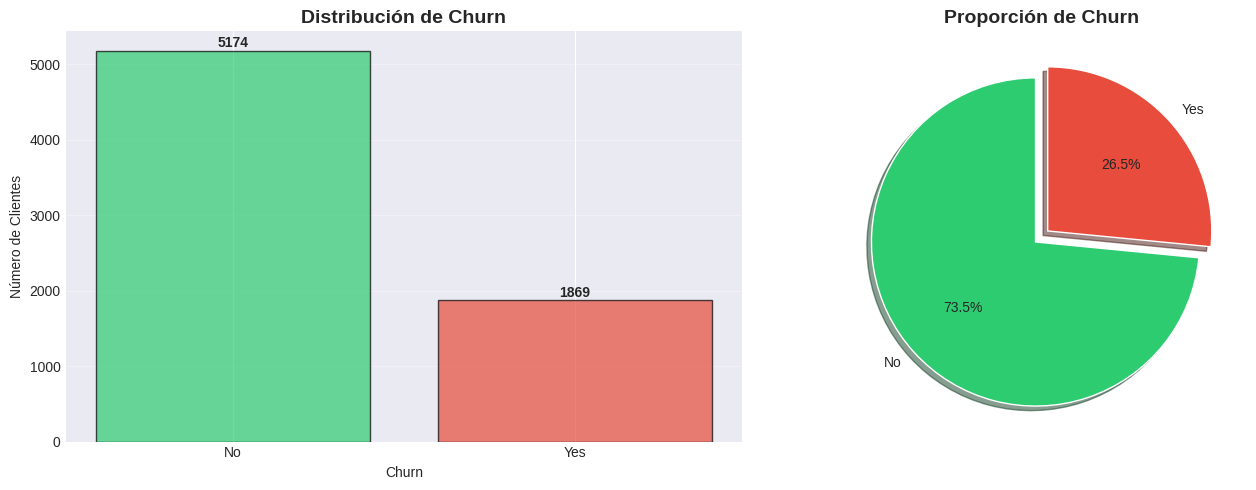


Estadísticas de Churn:
Total de clientes: 7043
Clientes que NO abandonaron: 5174 (73.46%)
Clientes que SÍ abandonaron: 1869 (26.54%)

Ratio de desbalanceo: 2.77:1


In [48]:
# Análisis de la distribución de Churn

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Número de Clientes')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, explode=explode, shadow=True, startangle=90)
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas
print("\nEstadísticas de Churn:")
print(f"Total de clientes: {len(df)}")
print(f"Clientes que NO abandonaron: {churn_counts['No']} ({100*churn_counts['No']/len(df):.2f}%)")
print(f"Clientes que SÍ abandonaron: {churn_counts['Yes']} ({100*churn_counts['Yes']/len(df):.2f}%)")
print(f"\nRatio de desbalanceo: {churn_counts['No']/churn_counts['Yes']:.2f}:1")

Variables categóricas a analizar: 15
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


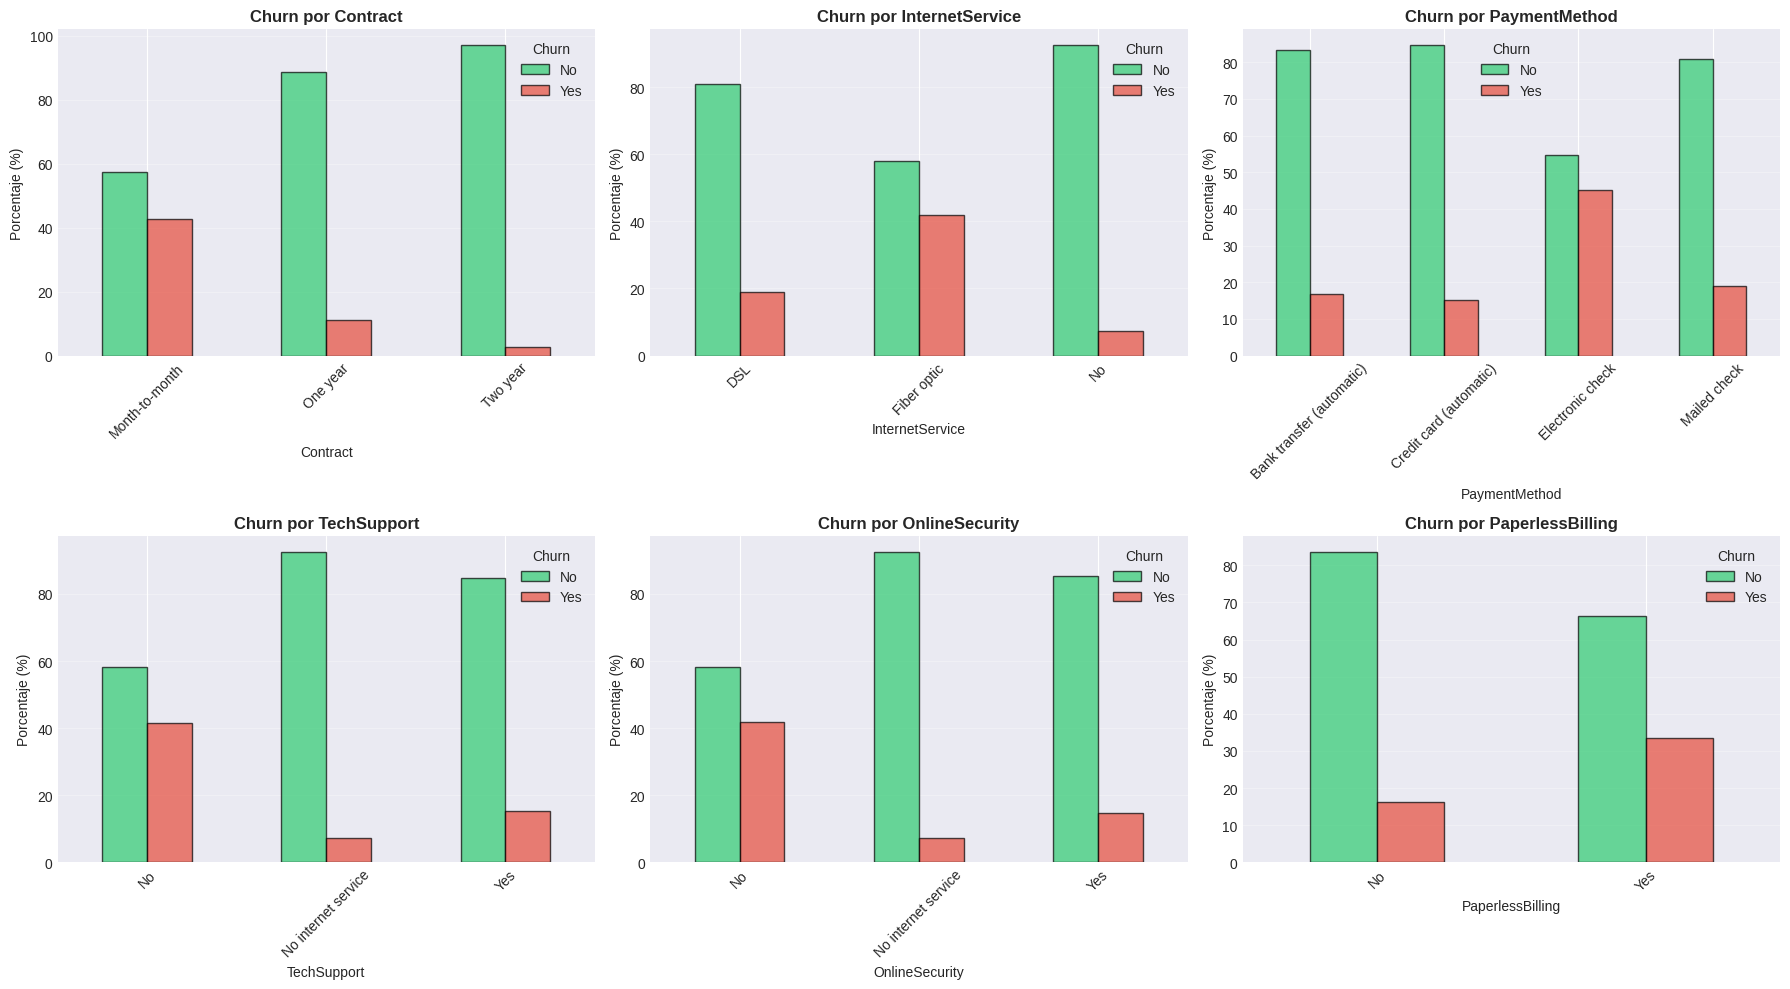


Tasa de Churn por categoría:


Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

InternetService:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Churn, dtype: float64

TechSupport:
TechSupport
No                     41.635474
Yes                    15.166341
No internet service     7.404980
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     41.766724
Yes                    14.611194
No internet service     7.404980
Name: Churn, dtype: float64

PaperlessBilling:
PaperlessBilling
Yes    33.565092
No     16.330084
Name: Churn, dtype: float64


In [49]:
# Identificar variables categóricas (excluyendo customerID y Churn)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

print(f"Variables categóricas a analizar: {len(categorical_cols)}")
print(categorical_cols)

# Visualizar las variables categóricas más importantes
important_cats = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport',
                  'OnlineSecurity', 'PaperlessBilling']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(important_cats):
    # Crear tabla de contingencia
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Graficar
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Churn por {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis estadístico
print("\nTasa de Churn por categoría:\n")
for col in important_cats:
    print(f"\n{col}:")
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').sum()/len(x)*100)
    print(churn_rate.sort_values(ascending=False))


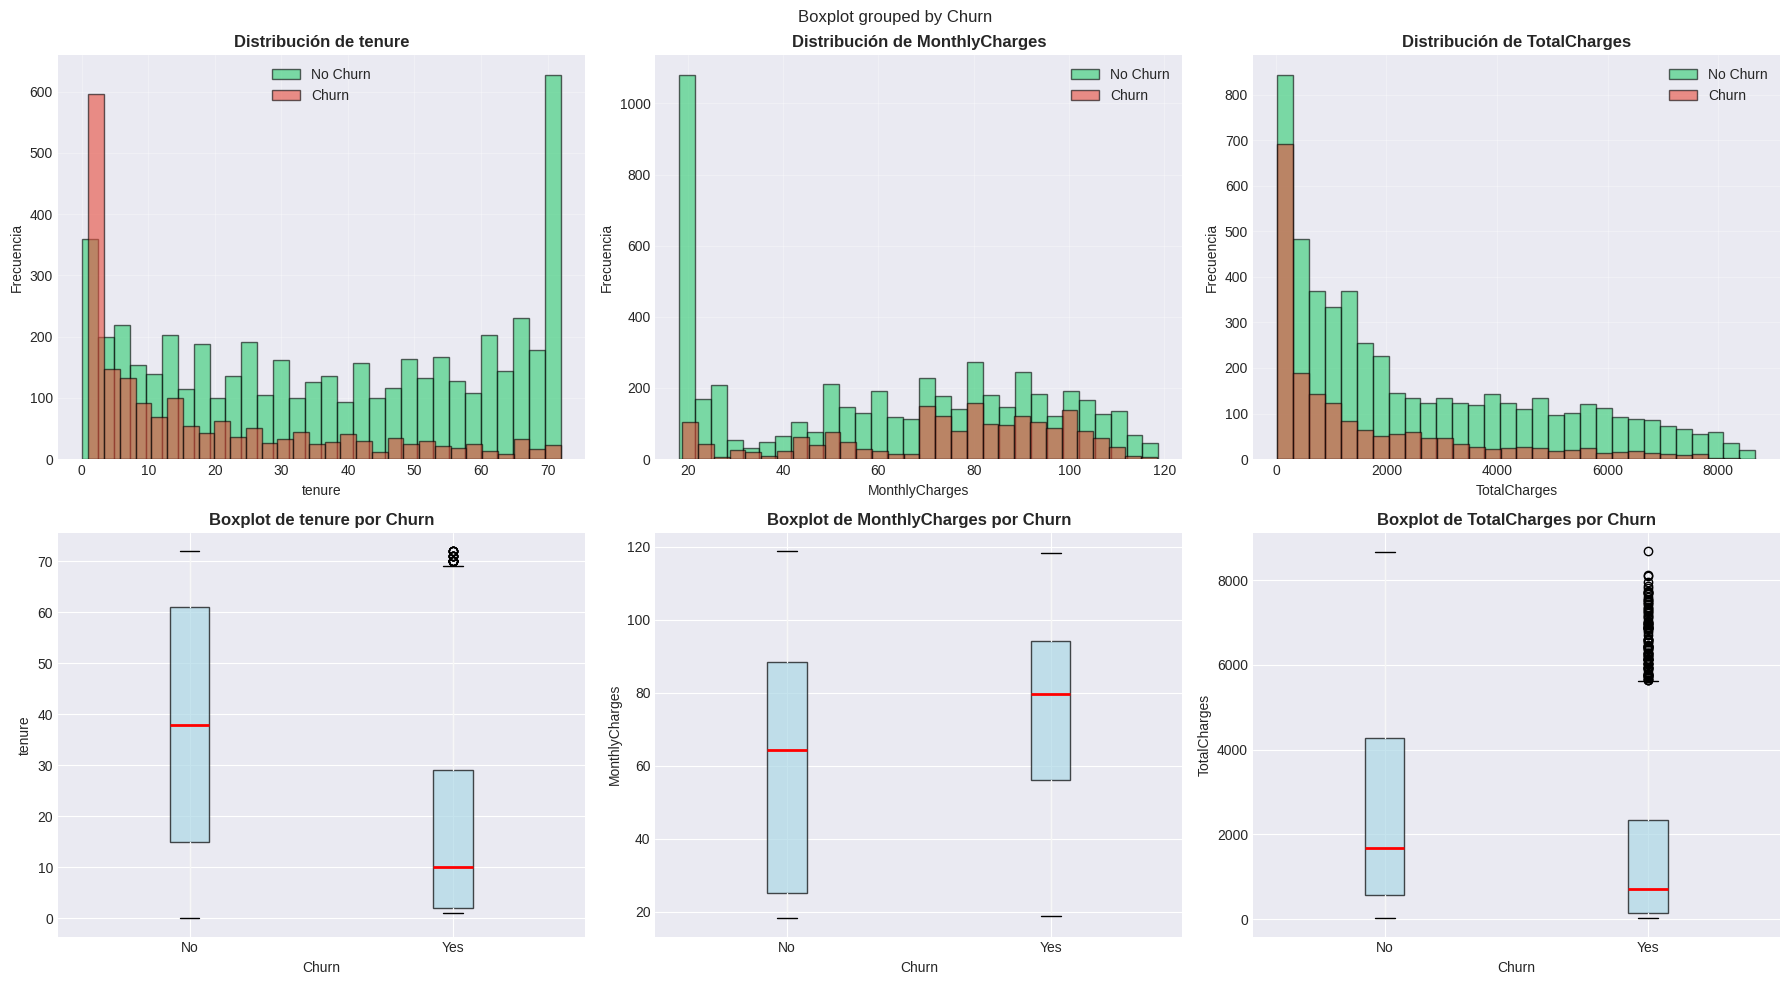


Estadísticas de variables numéricas por Churn:

Churn                          No          Yes
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.999497  1531.796094
               std    2329.858843  1890.822994
           

In [50]:
# Variables numéricas
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualización de distribuciones
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, col in enumerate(numerical_cols):
    # Histograma
    axes[0, idx].hist(df[df['Churn']=='No'][col], bins=30, alpha=0.6, label='No Churn', color='#2ecc71', edgecolor='black')
    axes[0, idx].hist(df[df['Churn']=='Yes'][col], bins=30, alpha=0.6, label='Churn', color='#e74c3c', edgecolor='black')
    axes[0, idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frecuencia')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

    # Boxplot
    df.boxplot(column=col, by='Churn', ax=axes[1, idx], patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
    axes[1, idx].set_title(f'Boxplot de {col} por Churn', fontsize=12, fontweight='bold')
    axes[1, idx].set_xlabel('Churn')
    axes[1, idx].set_ylabel(col)
    plt.sca(axes[1, idx])
    plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# Estadísticas por grupo
print("\nEstadísticas de variables numéricas por Churn:\n")
print(df.groupby('Churn')[numerical_cols].describe().T)


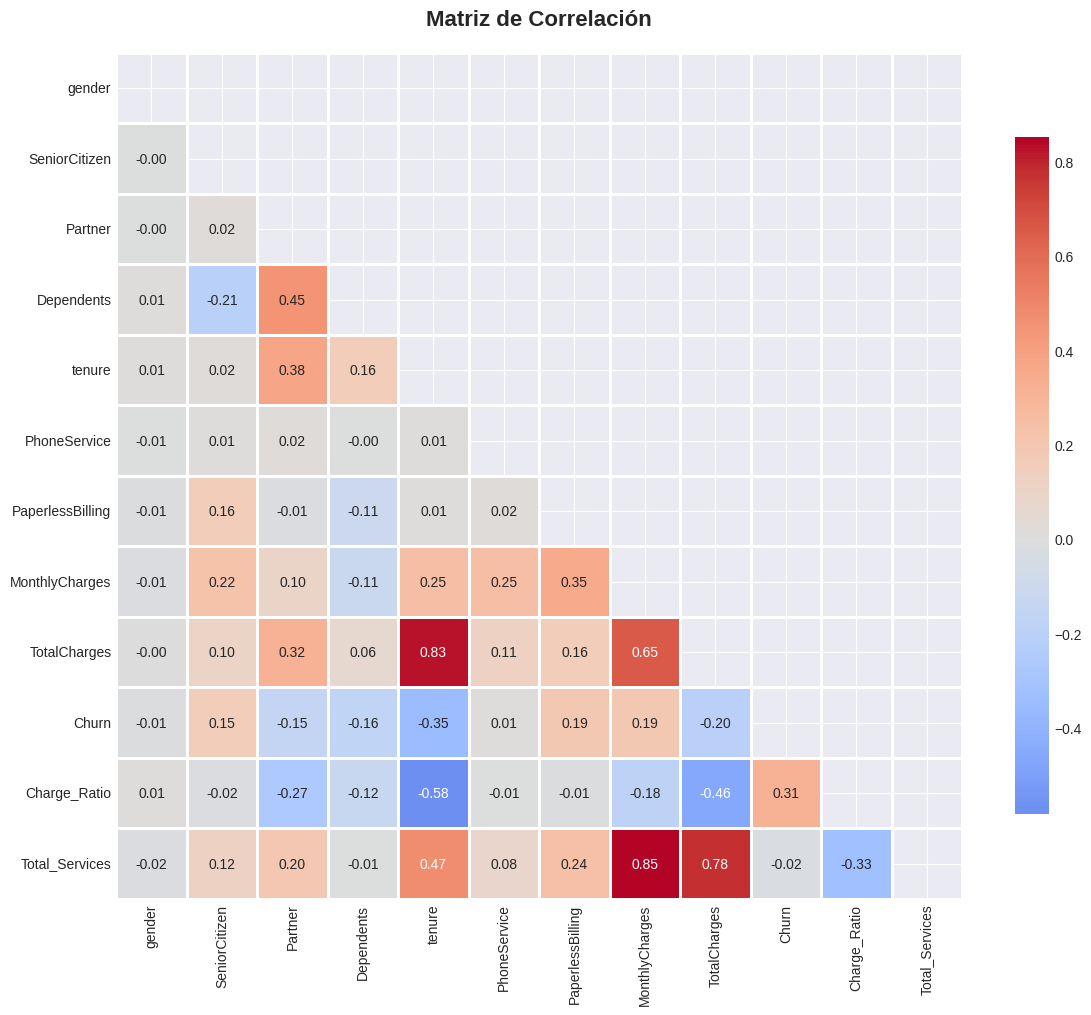


Correlaciones con Churn (ordenadas por valor absoluto):

tenure             -0.352229
Charge_Ratio        0.313508
TotalCharges       -0.198347
MonthlyCharges      0.193356
PaperlessBilling    0.191825
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
Total_Services     -0.019375
PhoneService        0.011942
gender             -0.008612
Name: Churn, dtype: float64


In [51]:
# Preparar datos para correlación

df_corr = df.copy()

# Convertir variables categóricas binarias a numéricas
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Seleccionar solo columnas numéricas
numeric_df = df_corr.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con Churn
print("\nCorrelaciones con Churn (ordenadas por valor absoluto):\n")
churn_corr = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
print(churn_corr)


---

# 🔧 4. Feature Engineering

> **Propósito:** Crear características derivadas que mejoren el poder predictivo.

| Nueva Variable | Descripción |
|----------------|-------------|
| `ChargeRatio` | Ratio de cargos mensuales vs totales |
| `Total_Services` | Contador de servicios contratados |
| `tenure_group` | Agrupación de antigüedad |

In [52]:
# Crear copia para feature engineering
df_fe = df.copy()

# NOTA: Las variables Charge_Ratio y Total_Services ya fueron creadas en la función
# cargar_y_preparar_datos() con cálculos más robustos, por lo que no se duplican aquí.

# 1. Promedio de cargos mensuales basado en tenure
df_fe['AvgMonthlyCharges'] = df_fe['TotalCharges'] / (df_fe['tenure'] + 1)

# 2. Categorizar tenure en grupos
df_fe['TenureGroup'] = pd.cut(df_fe['tenure'], bins=[0, 12, 24, 48, 72],
                               labels=['0-1 año', '1-2 años', '2-4 años', '4+ años'])

# 3. Cliente senior con dependientes
df_fe['SeniorWithDependents'] = ((df_fe['SeniorCitizen'] == 1) & (df_fe['Dependents'] == 'Yes')).astype(int)

# 4. Contrato de alto valor (contrato largo + cargos altos)
df_fe['HighValueContract'] = ((df_fe['Contract'].isin(['One year', 'Two year'])) &
                               (df_fe['MonthlyCharges'] > df_fe['MonthlyCharges'].median())).astype(int)

print("Nuevas características creadas:")
new_features = ['Charge_Ratio', 'Total_Services', 'AvgMonthlyCharges', 'TenureGroup',
                'SeniorWithDependents', 'HighValueContract']
print(df_fe[new_features].head(10))

print(f"\nDimensiones del dataset con nuevas características: {df_fe.shape}")


Nuevas características creadas:
   Charge_Ratio  Total_Services  AvgMonthlyCharges TenureGroup  \
0      2.000000               2          14.925000     0-1 año   
1      1.054909               4          53.985714    2-4 años   
2      1.493759               4          36.050000     0-1 año   
3      1.057069               4          40.016304    2-4 años   
4      1.398615               2          50.550000     0-1 año   
5      1.093053               6          91.166667     0-1 año   
6      1.051247               5          84.756522    1-2 años   
7      1.083968               2          27.445455     0-1 año   
8      0.997751               7         105.036207    2-4 años   
9      1.014192               4          55.364286     4+ años   

   SeniorWithDependents  HighValueContract  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4               

---

# ✂️ 5. Preparación de Datos para Modelado

> **Propósito:** Codificar variables, dividir datos y crear pipeline de preprocesamiento.

**Pipeline:**
1. 🏷️ One-Hot Encoding para categóricas
2. 📏 StandardScaler para numéricas
3. ✂️ División estratificada 80/20

In [53]:
# Preparar datos para modelado
df_model = df_fe.copy()

# Eliminar customerID (no es útil para predicción)
df_model = df_model.drop('customerID', axis=1)

# Convertir TenureGroup a string para encoding
df_model['TenureGroup'] = df_model['TenureGroup'].astype(str)

# Separar características y variable objetivo
X = df_model.drop('Churn', axis=1)
y = df_model['Churn'].map({'Yes': 1, 'No': 0})

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())

# Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numeric_features)}): {numeric_features}")
print(f"\nCaracterísticas categóricas ({len(categorical_features)}): {categorical_features}")


Dimensiones de X: (7043, 25)
Dimensiones de y: (7043,)

Distribución de la variable objetivo:
Churn
0    5174
1    1869
Name: count, dtype: int64

Características numéricas (9): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Charge_Ratio', 'Total_Services', 'AvgMonthlyCharges', 'SeniorWithDependents', 'HighValueContract']

Características categóricas (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


In [54]:
from sklearn.model_selection import train_test_split

# División estratificada de datos (80% train, 20% test)
# Usa la semilla configurada en la celda de configuración
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"🎲 Usando semilla aleatoria: {RANDOM_STATE}")

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nDistribución de Churn en entrenamiento:")
print(y_train.value_counts(normalize=True))

print(f"\nDistribución de Churn en prueba:")
print(y_test.value_counts(normalize=True))

🎲 Usando semilla aleatoria: 42
Tamaño del conjunto de entrenamiento: 5634 (80.0%)
Tamaño del conjunto de prueba: 1409 (20.0%)

Distribución de Churn en entrenamiento:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución de Churn en prueba:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Crear transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Crear preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Ajustar y transformar datos de entrenamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Obtener nombres de características después del encoding
feature_names = (
    numeric_features +
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_features).tolist()
)

print(f"Dimensiones después del preprocesamiento:")
print(f"X_train: {X_train_processed.shape}")
print(f"X_test: {X_test_processed.shape}")
print(f"\nTotal de características: {len(feature_names)}")


Dimensiones después del preprocesamiento:
X_train: (5634, 39)
X_test: (1409, 39)

Total de características: 39


---

# 🤖 6. Modelos Baseline

> **Propósito:** Entrenar y comparar múltiples algoritmos sin optimización.

| Modelo | Tipo |
|--------|------|
| Logistic Regression | Lineal |
| Decision Tree | Árbol |
| Random Forest | Ensemble |
| Gradient Boosting | Ensemble |
| XGBoost | Ensemble |
| SVM | Kernel |
| KNN | Instancias |

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Definir modelos baseline
# Todos los modelos usan la semilla configurada (RANDOM_STATE)
models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=RANDOM_STATE, n_estimators=100, eval_metric='logloss'),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'KNN': KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
results = []

print("Entrenando modelos baseline...\n")
print("="*80)

for name, model in models.items():
    print(f"\nEntrenando {name}...")

    # Entrenar
    model.fit(X_train_processed, y_train)

    # Predicciones
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")

# Crear DataFrame con resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("\n" + "="*80)
print("\nRESUMEN DE RESULTADOS BASELINE:\n")
print(results_df.to_string(index=False))


Entrenando modelos baseline...


Entrenando Logistic Regression...
  Accuracy: 0.8041
  Precision: 0.6655
  Recall: 0.5267
  F1-Score: 0.5881
  ROC-AUC: 0.8484

Entrenando Decision Tree...
  Accuracy: 0.7175
  Precision: 0.4689
  Recall: 0.4840
  F1-Score: 0.4763
  ROC-AUC: 0.6424

Entrenando Random Forest...
  Accuracy: 0.7842
  Precision: 0.6199
  Recall: 0.4840
  F1-Score: 0.5435
  ROC-AUC: 0.8227

Entrenando Gradient Boosting...
  Accuracy: 0.7963
  Precision: 0.6495
  Recall: 0.5053
  F1-Score: 0.5684
  ROC-AUC: 0.8439

Entrenando XGBoost...
  Accuracy: 0.7850
  Precision: 0.6092
  Recall: 0.5294
  F1-Score: 0.5665
  ROC-AUC: 0.8227

Entrenando SVM...
  Accuracy: 0.8041
  Precision: 0.6655
  Recall: 0.5267
  F1-Score: 0.5881
  ROC-AUC: 0.8041

Entrenando KNN...
  Accuracy: 0.7672
  Precision: 0.5661
  Recall: 0.5267
  F1-Score: 0.5457
  ROC-AUC: 0.7772


RESUMEN DE RESULTADOS BASELINE:

             Modelo  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.804

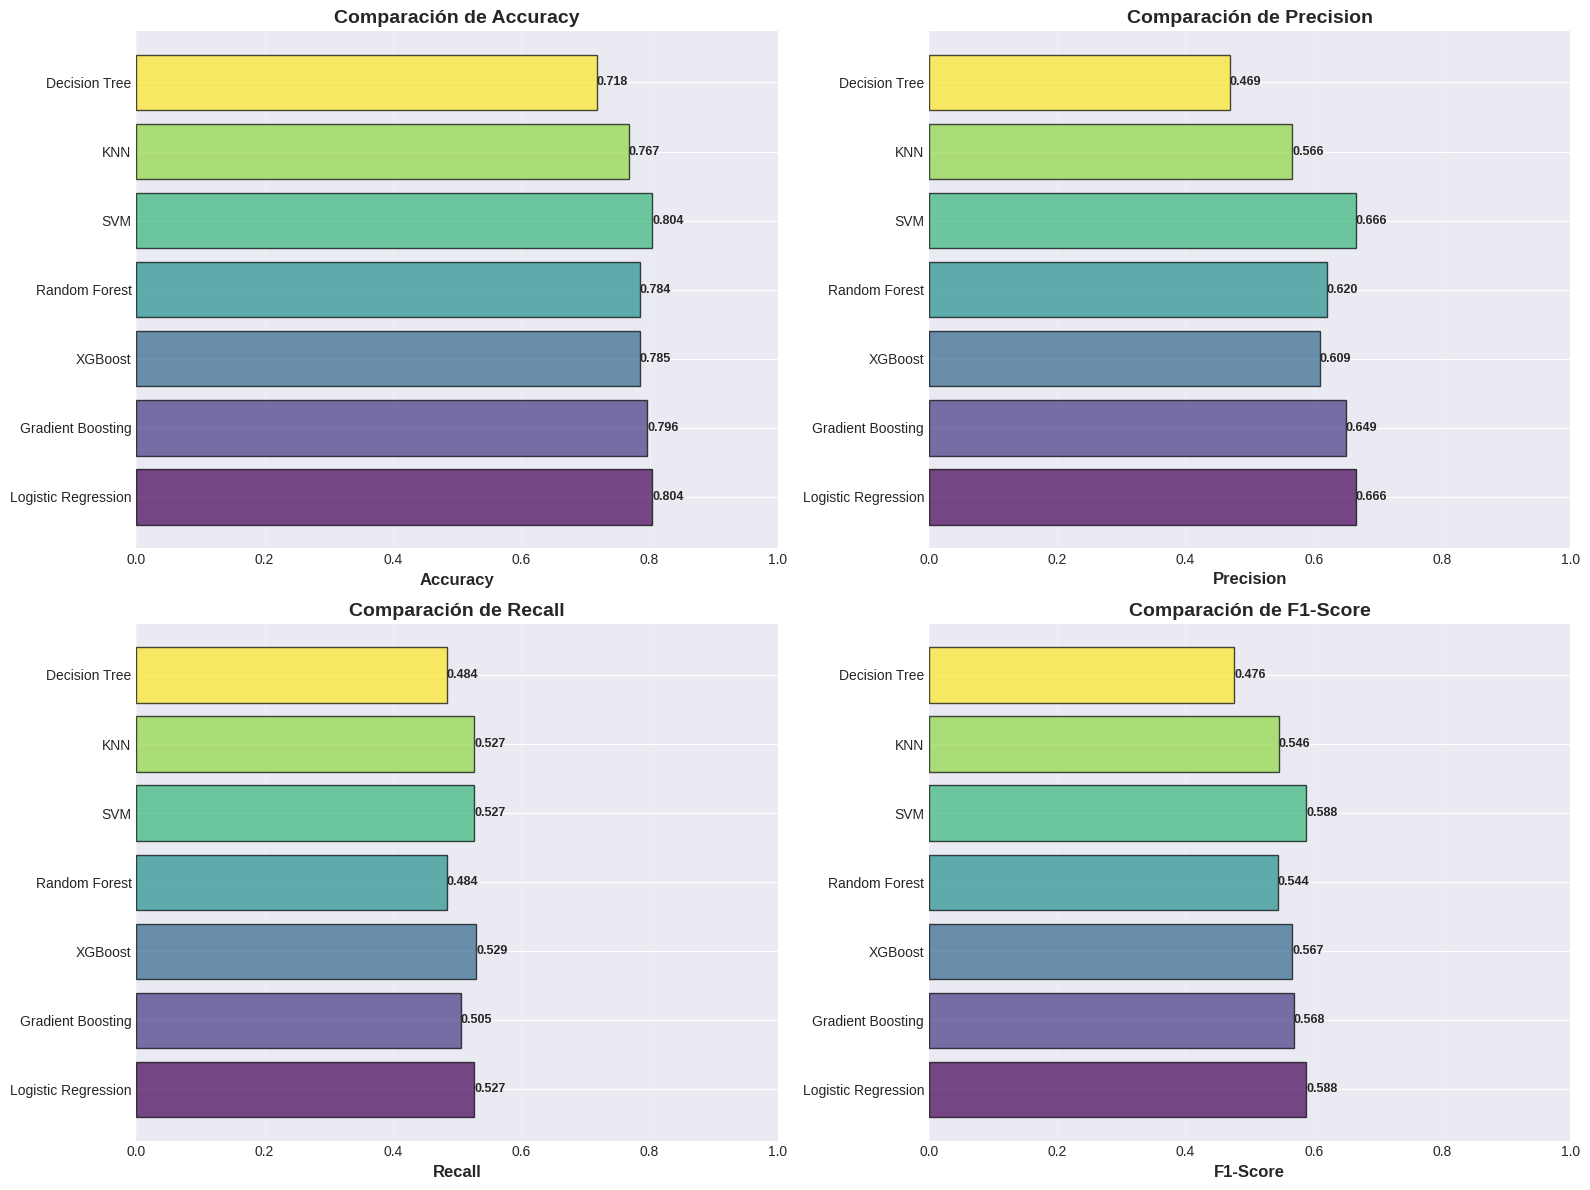

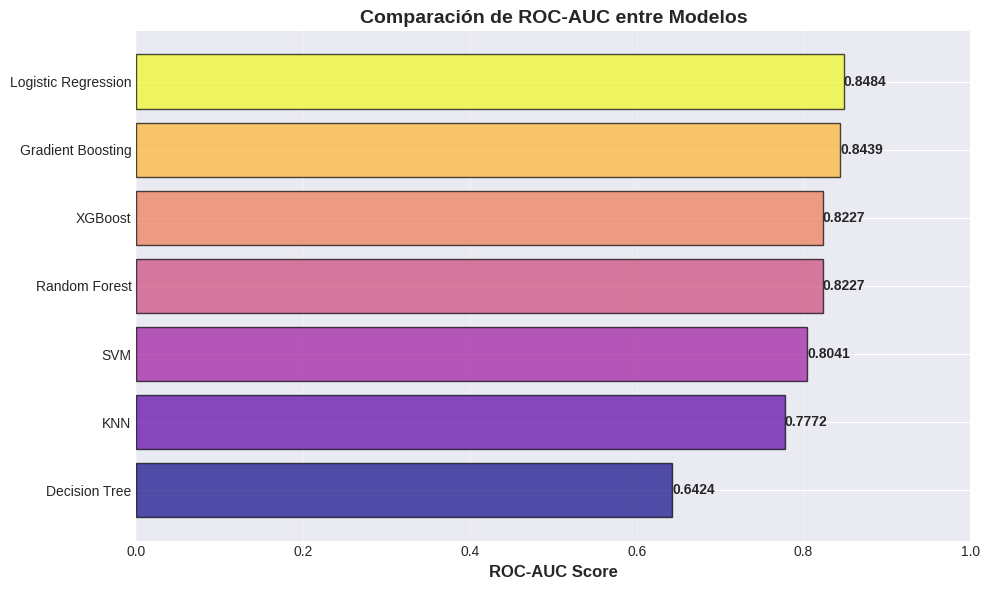

In [57]:
# Visualizar comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    bars = ax.barh(results_df['Modelo'], results_df[metric], color=colors, edgecolor='black', alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparación de {metric}', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)

    # Añadir valores en las barras
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
                ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ROC-AUC separado
plt.figure(figsize=(10, 6))
results_roc = results_df.dropna(subset=['ROC-AUC']).sort_values('ROC-AUC')
bars = plt.barh(results_roc['Modelo'], results_roc['ROC-AUC'],
                color=plt.cm.plasma(np.linspace(0, 1, len(results_roc))),
                edgecolor='black', alpha=0.7)
plt.xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
plt.title('Comparación de ROC-AUC entre Modelos', fontsize=14, fontweight='bold')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


---

# ⚖️ 7. Comparativa de Técnicas de Balanceo

> **Propósito:** Evaluar el impacto de diferentes técnicas de balanceo.

| Técnica | Estrategia |
|---------|------------|
| SMOTE | Genera ejemplos sintéticos |
| SMOTE + Tomek | Oversampling + limpieza |
| Random Undersampling | Reduce clase mayoritaria |

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

print("="*80)
print("🔄 COMPARATIVA DE TÉCNICAS DE BALANCEO")
print("="*80)
print(f"\n🎲 Usando semilla: {RANDOM_STATE}\n")

# Distribución original
print("📊 DISTRIBUCIÓN ORIGINAL:")
print(f"   Clase 0 (No Churn): {y_train.value_counts()[0]:,} muestras")
print(f"   Clase 1 (Churn):    {y_train.value_counts()[1]:,} muestras")
print(f"   Ratio: {y_train.value_counts()[0]/y_train.value_counts()[1]:.2f}:1")
print()

# Diccionario para almacenar resultados
balancing_results = {}

# ============================================================================
# TÉCNICA 1: SMOTE
# ============================================================================
print("="*80)
print("1️⃣  TÉCNICA: SMOTE (Synthetic Minority Over-sampling)")
print("="*80)

start_time = time.time()
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)
smote_time = time.time() - start_time

print(f"⏱️  Tiempo de procesamiento: {smote_time:.2f} segundos")
print(f"📊 Distribución después de SMOTE:")
print(f"   Clase 0: {pd.Series(y_train_smote).value_counts()[0]:,} muestras")
print(f"   Clase 1: {pd.Series(y_train_smote).value_counts()[1]:,} muestras")
print(f"   Ratio: {pd.Series(y_train_smote).value_counts()[0]/pd.Series(y_train_smote).value_counts()[1]:.2f}:1")
print(f"   Total de muestras: {len(y_train_smote):,}")
print()

# ============================================================================
# TÉCNICA 2: SMOTE + Tomek Link
# ============================================================================
print("="*80)
print("2️⃣  TÉCNICA: SMOTE + Tomek Link (Híbrida)")
print("="*80)

start_time = time.time()
smote_tomek = SMOTETomek(random_state=RANDOM_STATE)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_processed, y_train)
smote_tomek_time = time.time() - start_time

print(f"⏱️  Tiempo de procesamiento: {smote_tomek_time:.2f} segundos")
print(f"📊 Distribución después de SMOTE + Tomek:")
print(f"   Clase 0: {pd.Series(y_train_smote_tomek).value_counts()[0]:,} muestras")
print(f"   Clase 1: {pd.Series(y_train_smote_tomek).value_counts()[1]:,} muestras")
print(f"   Ratio: {pd.Series(y_train_smote_tomek).value_counts()[0]/pd.Series(y_train_smote_tomek).value_counts()[1]:.2f}:1")
print(f"   Total de muestras: {len(y_train_smote_tomek):,}")
print(f"   💡 Tomek Links eliminados: {len(y_train_smote) - len(y_train_smote_tomek):,} muestras")
print()

# ============================================================================
# TÉCNICA 3: Undersampling
# ============================================================================
print("="*80)
print("3️⃣  TÉCNICA: Random Undersampling")
print("="*80)

start_time = time.time()
undersampler = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_under, y_train_under = undersampler.fit_resample(X_train_processed, y_train)
under_time = time.time() - start_time

print(f"⏱️  Tiempo de procesamiento: {under_time:.2f} segundos")
print(f"📊 Distribución después de Undersampling:")
print(f"   Clase 0: {pd.Series(y_train_under).value_counts()[0]:,} muestras")
print(f"   Clase 1: {pd.Series(y_train_under).value_counts()[1]:,} muestras")
print(f"   Ratio: {pd.Series(y_train_under).value_counts()[0]/pd.Series(y_train_under).value_counts()[1]:.2f}:1")
print(f"   Total de muestras: {len(y_train_under):,}")
print(f"   💡 Muestras eliminadas: {len(y_train) - len(y_train_under):,}")
print()

# ============================================================================
# EVALUACIÓN DE CADA TÉCNICA
# ============================================================================
print("="*80)
print("📊 EVALUACIÓN DE RENDIMIENTO POR TÉCNICA")
print("="*80)
print()

# Modelo base para evaluación (Random Forest)
from sklearn.ensemble import RandomForestClassifier

techniques = {
    'SMOTE': (X_train_smote, y_train_smote, smote_time),
    'SMOTE + Tomek': (X_train_smote_tomek, y_train_smote_tomek, smote_tomek_time),
    'Undersampling': (X_train_under, y_train_under, under_time)
}

for technique_name, (X_bal, y_bal, proc_time) in techniques.items():
    print(f"\n{'='*80}")
    print(f"🔍 Evaluando: {technique_name}")
    print(f"{'='*80}")

    # Entrenar modelo
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    train_start = time.time()
    rf_model.fit(X_bal, y_bal)
    train_time = time.time() - train_start

    # Predicciones
    y_pred = rf_model.predict(X_test_processed)
    y_pred_proba = rf_model.predict_proba(X_test_processed)[:, 1]

    # Calcular métricas
    metrics = {
        'technique': technique_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'processing_time': proc_time,
        'training_time': train_time,
        'total_time': proc_time + train_time,
        'train_samples': len(y_bal),
        'X_train': X_bal,
        'y_train': y_bal,
        'model': rf_model
    }

    balancing_results[technique_name] = metrics

    # Mostrar resultados
    print(f"   Accuracy:  {metrics['accuracy']:.4f}")
    print(f"   Precision: {metrics['precision']:.4f}")
    print(f"   Recall:    {metrics['recall']:.4f}")
    print(f"   F1-Score:  {metrics['f1']:.4f}")
    print(f"   ROC-AUC:   {metrics['roc_auc']:.4f}")
    print(f"   ⏱️  Tiempo total: {metrics['total_time']:.2f}s (Balanceo: {proc_time:.2f}s + Entrenamiento: {train_time:.2f}s)")
    print(f"   📊 Muestras de entrenamiento: {metrics['train_samples']:,}")

# ============================================================================
# SELECCIÓN AUTOMÁTICA DE LA MEJOR TÉCNICA
# ============================================================================
print("\n" + "="*80)
print("🏆 SELECCIÓN AUTOMÁTICA DE LA MEJOR TÉCNICA")
print("="*80)
print()

# Crear DataFrame comparativo
comparison_df = pd.DataFrame([
    {
        'Técnica': name,
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc'],
        'Tiempo (s)': metrics['total_time'],
        'Muestras': metrics['train_samples']
    }
    for name, metrics in balancing_results.items()
])

print("📊 TABLA COMPARATIVA:")
print()
print(comparison_df.to_string(index=False))
print()

# Criterio de selección: ROC-AUC (métrica principal para clasificación desbalanceada)
best_technique_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Técnica']
best_metrics = balancing_results[best_technique_name]

print("="*80)
print(f"✅ MEJOR TÉCNICA SELECCIONADA: {best_technique_name}")
print("="*80)
print()
print(f"📈 Métricas de la mejor técnica:")
print(f"   • ROC-AUC:   {best_metrics['roc_auc']:.4f} ⭐")
print(f"   • F1-Score:  {best_metrics['f1']:.4f}")
print(f"   • Precision: {best_metrics['precision']:.4f}")
print(f"   • Recall:    {best_metrics['recall']:.4f}")
print(f"   • Accuracy:  {best_metrics['accuracy']:.4f}")
print()
print(f"⏱️  Eficiencia:")
print(f"   • Tiempo total: {best_metrics['total_time']:.2f} segundos")
print(f"   • Muestras de entrenamiento: {best_metrics['train_samples']:,}")
print()

# Asignar los mejores datos balanceados para uso posterior
X_train_balanced = best_metrics['X_train']
y_train_balanced = best_metrics['y_train']
best_balancing_technique = best_technique_name

print(f"💾 Variables actualizadas:")
print(f"   • X_train_balanced: {X_train_balanced.shape}")
print(f"   • y_train_balanced: {len(y_train_balanced):,} muestras")
print(f"   • best_balancing_technique: '{best_balancing_technique}'")
print()

🔄 COMPARATIVA DE TÉCNICAS DE BALANCEO

🎲 Usando semilla: 42

📊 DISTRIBUCIÓN ORIGINAL:
   Clase 0 (No Churn): 4,139 muestras
   Clase 1 (Churn):    1,495 muestras
   Ratio: 2.77:1

1️⃣  TÉCNICA: SMOTE (Synthetic Minority Over-sampling)
⏱️  Tiempo de procesamiento: 0.03 segundos
📊 Distribución después de SMOTE:
   Clase 0: 4,139 muestras
   Clase 1: 4,139 muestras
   Ratio: 1.00:1
   Total de muestras: 8,278

2️⃣  TÉCNICA: SMOTE + Tomek Link (Híbrida)
⏱️  Tiempo de procesamiento: 0.54 segundos
📊 Distribución después de SMOTE + Tomek:
   Clase 0: 4,011 muestras
   Clase 1: 4,011 muestras
   Ratio: 1.00:1
   Total de muestras: 8,022
   💡 Tomek Links eliminados: 256 muestras

3️⃣  TÉCNICA: Random Undersampling
⏱️  Tiempo de procesamiento: 0.00 segundos
📊 Distribución después de Undersampling:
   Clase 0: 1,495 muestras
   Clase 1: 1,495 muestras
   Ratio: 1.00:1
   Total de muestras: 2,990
   💡 Muestras eliminadas: 2,644

📊 EVALUACIÓN DE RENDIMIENTO POR TÉCNICA


🔍 Evaluando: SMOTE
   Accur

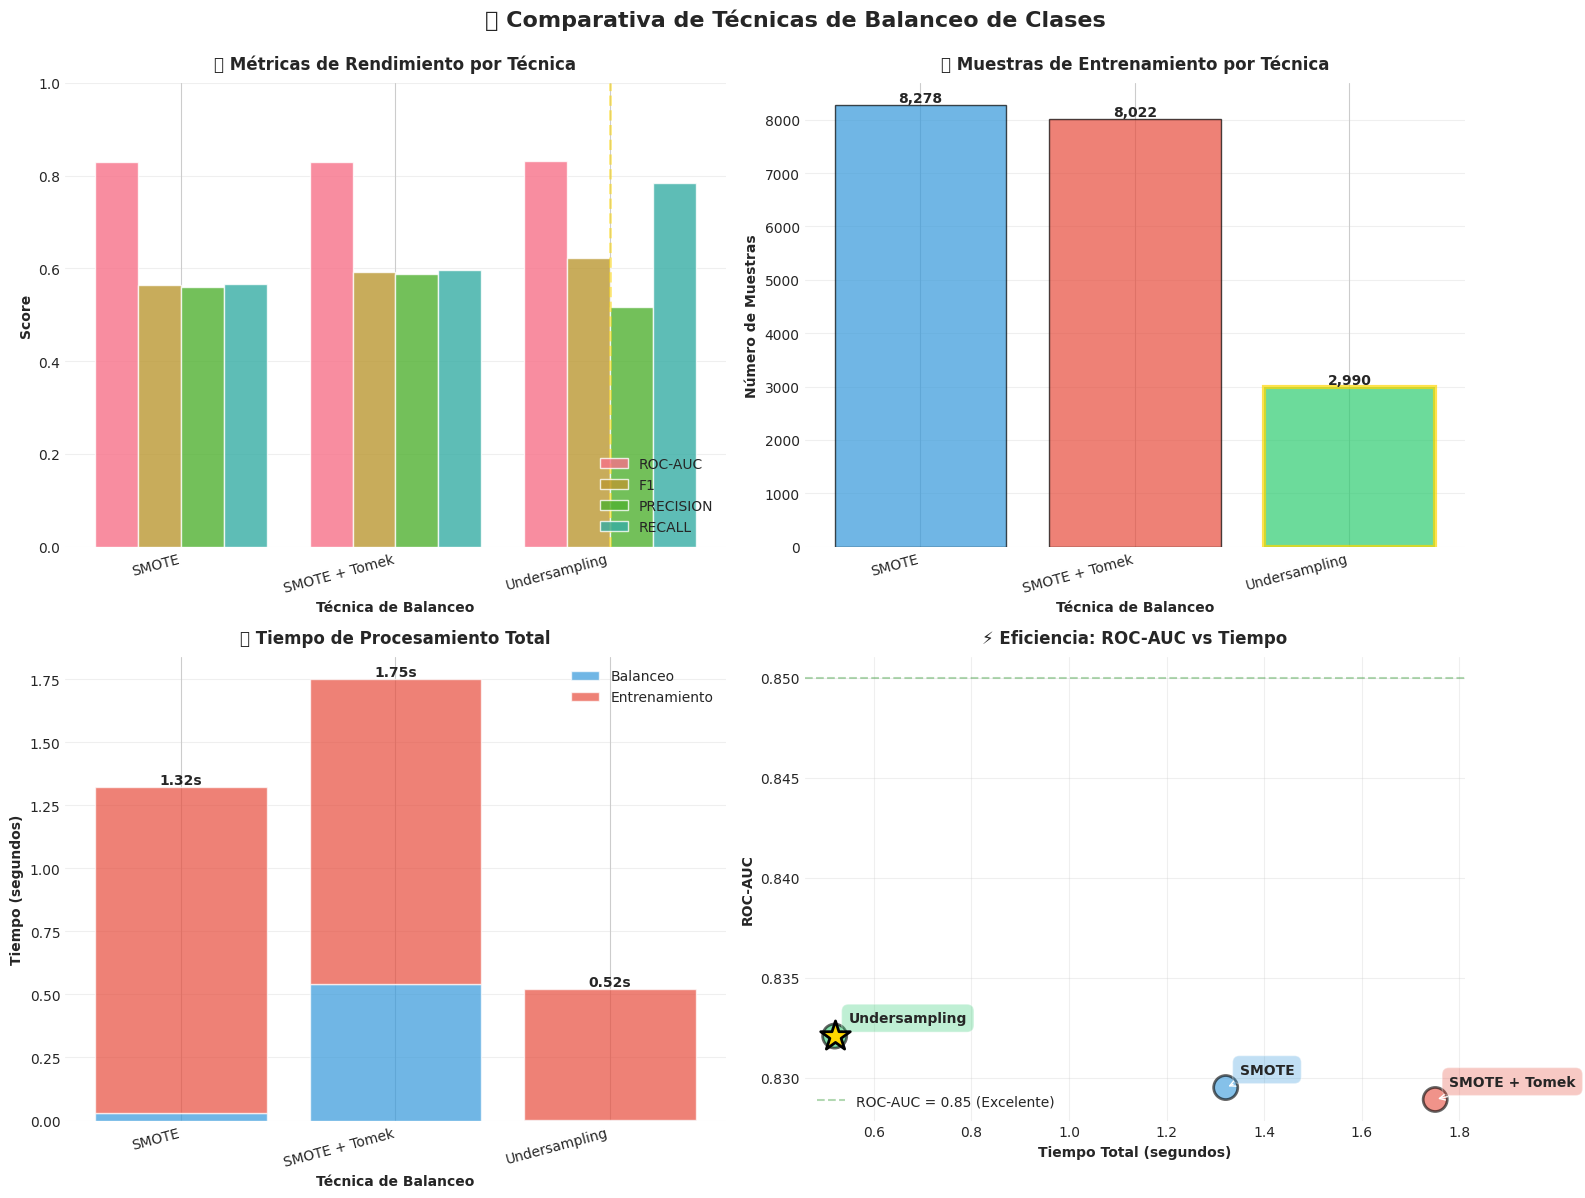


✅ Visualizaciones generadas exitosamente


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 12)

# Crear figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Comparativa de Técnicas de Balanceo de Clases', fontsize=16, fontweight='bold', y=0.995)

# Preparar datos para visualización
techniques = list(balancing_results.keys())
colors = ['#3498db', '#e74c3c', '#2ecc71']

# ============================================================================
# GRÁFICO 1: Comparación de Métricas de Rendimiento
# ============================================================================
ax1 = axes[0, 0]
metrics_to_plot = ['roc_auc', 'f1', 'precision', 'recall']
x = np.arange(len(techniques))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    values = [balancing_results[tech][metric] for tech in techniques]
    ax1.bar(x + i*width, values, width, label=metric.upper().replace('_', '-'), alpha=0.8)

ax1.set_xlabel('Técnica de Balanceo', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('📈 Métricas de Rendimiento por Técnica', fontweight='bold', pad=10)
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(techniques, rotation=15, ha='right')
ax1.legend(loc='lower right')
ax1.set_ylim([0, 1.0])
ax1.grid(axis='y', alpha=0.3)

# Marcar la mejor técnica
best_idx = techniques.index(best_balancing_technique)
ax1.axvline(x=best_idx + width*1.5, color='gold', linestyle='--', linewidth=2, alpha=0.5, label='Mejor')

# ============================================================================
# GRÁFICO 2: Distribución de Muestras de Entrenamiento
# ============================================================================
ax2 = axes[0, 1]
samples = [balancing_results[tech]['train_samples'] for tech in techniques]
bars = ax2.bar(techniques, samples, color=colors, alpha=0.7, edgecolor='black')

# Añadir valores en las barras
for bar, sample in zip(bars, samples):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{sample:,}',
             ha='center', va='bottom', fontweight='bold')

ax2.set_xlabel('Técnica de Balanceo', fontweight='bold')
ax2.set_ylabel('Número de Muestras', fontweight='bold')
ax2.set_title('📊 Muestras de Entrenamiento por Técnica', fontweight='bold', pad=10)
ax2.set_xticklabels(techniques, rotation=15, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Marcar la mejor técnica
bars[best_idx].set_edgecolor('gold')
bars[best_idx].set_linewidth(3)

# ============================================================================
# GRÁFICO 3: Tiempo de Procesamiento Total
# ============================================================================
ax3 = axes[1, 0]
processing_times = [balancing_results[tech]['processing_time'] for tech in techniques]
training_times = [balancing_results[tech]['training_time'] for tech in techniques]

x_pos = np.arange(len(techniques))
p1 = ax3.bar(x_pos, processing_times, color='#3498db', alpha=0.7, label='Balanceo')
p2 = ax3.bar(x_pos, training_times, bottom=processing_times, color='#e74c3c', alpha=0.7, label='Entrenamiento')

# Añadir valores totales
for i, (proc, train) in enumerate(zip(processing_times, training_times)):
    total = proc + train
    ax3.text(i, total, f'{total:.2f}s', ha='center', va='bottom', fontweight='bold')

ax3.set_xlabel('Técnica de Balanceo', fontweight='bold')
ax3.set_ylabel('Tiempo (segundos)', fontweight='bold')
ax3.set_title('⏱️ Tiempo de Procesamiento Total', fontweight='bold', pad=10)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(techniques, rotation=15, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# ============================================================================
# GRÁFICO 4: Eficiencia (ROC-AUC vs Tiempo)
# ============================================================================
ax4 = axes[1, 1]
roc_aucs = [balancing_results[tech]['roc_auc'] for tech in techniques]
total_times = [balancing_results[tech]['total_time'] for tech in techniques]

scatter = ax4.scatter(total_times, roc_aucs, s=300, c=colors, alpha=0.6, edgecolors='black', linewidth=2)

# Añadir etiquetas
for i, tech in enumerate(techniques):
    ax4.annotate(tech,
                 (total_times[i], roc_aucs[i]),
                 xytext=(10, 10), textcoords='offset points',
                 fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[i], alpha=0.3),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Marcar la mejor técnica con estrella
best_time = balancing_results[best_balancing_technique]['total_time']
best_roc = balancing_results[best_balancing_technique]['roc_auc']
ax4.scatter([best_time], [best_roc], s=500, marker='*', c='gold', edgecolors='black', linewidth=2, zorder=5)

ax4.set_xlabel('Tiempo Total (segundos)', fontweight='bold')
ax4.set_ylabel('ROC-AUC', fontweight='bold')
ax4.set_title('⚡ Eficiencia: ROC-AUC vs Tiempo', fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)

# Añadir líneas de referencia
ax4.axhline(y=0.85, color='green', linestyle='--', alpha=0.3, label='ROC-AUC = 0.85 (Excelente)')
ax4.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Visualizaciones generadas exitosamente")
print("="*80)

In [60]:
# Seleccionar los mejores modelos para reentrenar con SMOTE
# Todos usan la semilla configurada (RANDOM_STATE)
best_models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=RANDOM_STATE, n_estimators=100, eval_metric='logloss')
}

# Entrenar con datos balanceados
results_balanced = []

print("Entrenando modelos con datos balanceados...\n")
print("="*80)

for name, model in best_models.items():
    print(f"\nEntrenando {name} con SMOTE...")

    # Entrenar
    model.fit(X_train_balanced, y_train_balanced)

    # Predicciones
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results_balanced.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

# Crear DataFrame con resultados
results_balanced_df = pd.DataFrame(results_balanced)
results_balanced_df = results_balanced_df.sort_values('ROC-AUC', ascending=False)

print("\n" + "="*80)
print("\nRESUMEN DE RESULTADOS CON SMOTE:\n")
print(results_balanced_df.to_string(index=False))


Entrenando modelos con datos balanceados...


Entrenando Logistic Regression con SMOTE...
  Accuracy: 0.7395
  Precision: 0.5059
  Recall: 0.8021
  F1-Score: 0.6205
  ROC-AUC: 0.8499

Entrenando Random Forest con SMOTE...
  Accuracy: 0.7480
  Precision: 0.5168
  Recall: 0.7834
  F1-Score: 0.6227
  ROC-AUC: 0.8321

Entrenando Gradient Boosting con SMOTE...
  Accuracy: 0.7480
  Precision: 0.5167
  Recall: 0.7861
  F1-Score: 0.6235
  ROC-AUC: 0.8413

Entrenando XGBoost con SMOTE...
  Accuracy: 0.7289
  Precision: 0.4930
  Recall: 0.7513
  F1-Score: 0.5953
  ROC-AUC: 0.8159


RESUMEN DE RESULTADOS CON SMOTE:

             Modelo  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.739532   0.505902 0.802139  0.620476 0.849926
  Gradient Boosting  0.748048   0.516696 0.786096  0.623542 0.841337
      Random Forest  0.748048   0.516755 0.783422  0.622742 0.832083
            XGBoost  0.728886   0.492982 0.751337  0.595339 0.815886


In [61]:
# ============================================================================
# SELECCIÓN AUTOMÁTICA DEL MEJOR MODELO
# ============================================================================

# Seleccionar automáticamente el mejor modelo según ROC-AUC
best_model_name = results_balanced_df.iloc[0]['Modelo']
best_model_roc_auc = results_balanced_df.iloc[0]['ROC-AUC']

print("\n" + "="*80)
print("\n🏆 MEJOR MODELO SEGÚN COMPARATIVA:")
print(f"   • Modelo: {best_model_name}")
print(f"   • ROC-AUC: {best_model_roc_auc:.4f}")
print("\n" + "="*80)




🏆 MEJOR MODELO SEGÚN COMPARATIVA:
   • Modelo: Logistic Regression
   • ROC-AUC: 0.8499



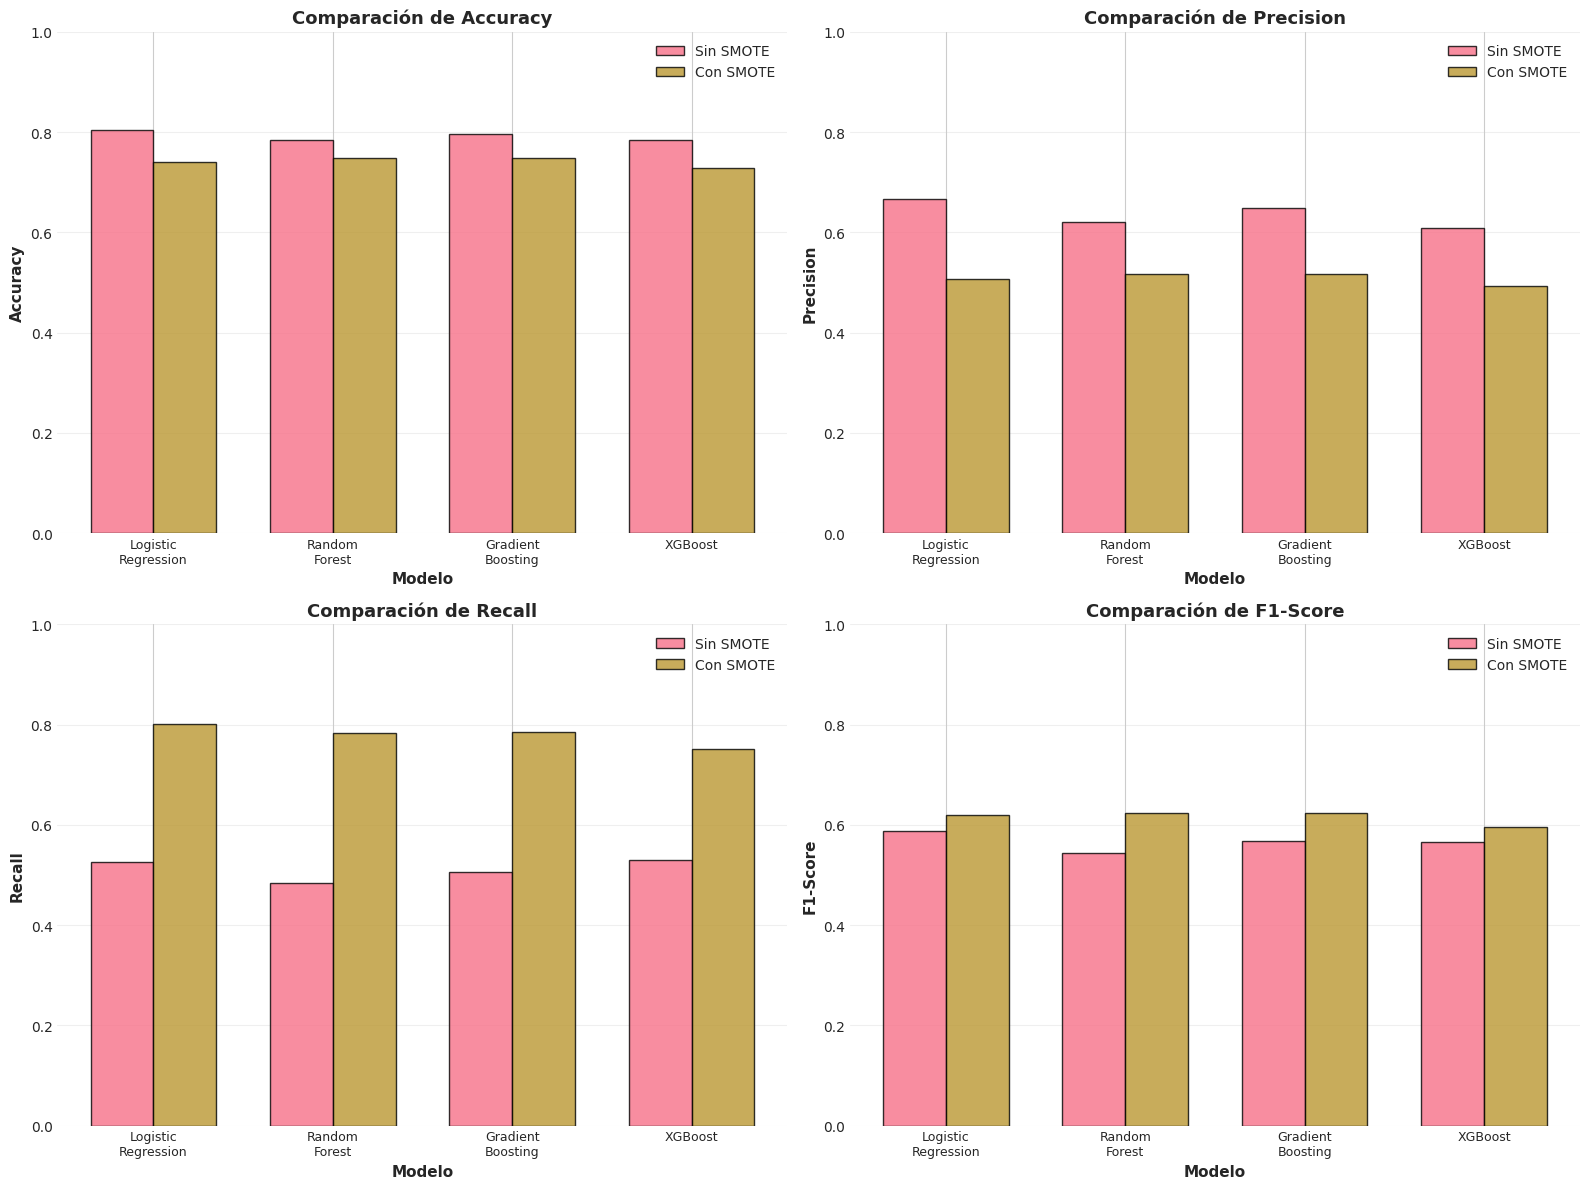

In [62]:
# Comparar resultados antes y después de SMOTE
comparison_models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]

    # Datos para comparación
    baseline_values = []
    smote_values = []

    for model_name in comparison_models:
        baseline_val = results_df[results_df['Modelo'] == model_name][metric].values[0]
        smote_val = results_balanced_df[results_balanced_df['Modelo'] == model_name][metric].values[0]
        baseline_values.append(baseline_val)
        smote_values.append(smote_val)

    x = np.arange(len(comparison_models))
    width = 0.35

    bars1 = ax.bar(x - width/2, baseline_values, width, label='Sin SMOTE', alpha=0.8, edgecolor='black')
    bars2 = ax.bar(x + width/2, smote_values, width, label='Con SMOTE', alpha=0.8, edgecolor='black')

    ax.set_xlabel('Modelo', fontsize=11, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'Comparación de {metric}', fontsize=13, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([m.replace(' ', '\n') for m in comparison_models], fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()


COMPARACIÓN DE CURVAS ROC - MODELOS CON SMOTE

Logistic Regression  → ROC-AUC: 0.8499
Random Forest        → ROC-AUC: 0.8321
Gradient Boosting    → ROC-AUC: 0.8413
XGBoost              → ROC-AUC: 0.8159


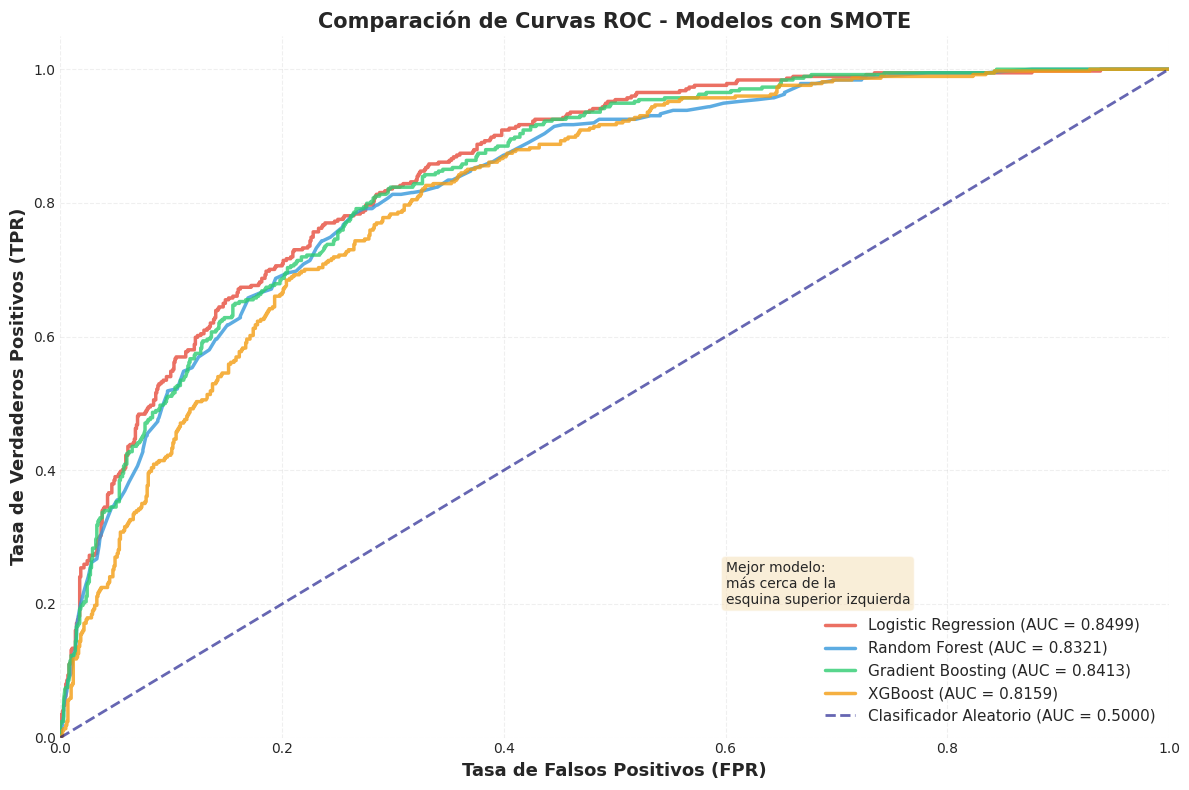


💡 Interpretación:
   • Cuanto más cerca esté la curva de la esquina superior izquierda, mejor
   • AUC = 1.0: Clasificador perfecto
   • AUC = 0.5: Clasificador aleatorio (línea diagonal)
   • AUC > 0.8: Muy buen modelo


In [63]:
# Comparación de Curvas ROC entre Modelos con SMOTE
print("\n" + "="*80)
print("COMPARACIÓN DE CURVAS ROC - MODELOS CON SMOTE")
print("="*80 + "\n")

plt.figure(figsize=(12, 8))

# Colores para cada modelo
colors = {
    'Logistic Regression': '#e74c3c',
    'Random Forest': '#3498db',
    'Gradient Boosting': '#2ecc71',
    'XGBoost': '#f39c12'
}

# Entrenar modelos y calcular curvas ROC
for name, model in best_models.items():
    # Entrenar modelo
    model.fit(X_train_balanced, y_train_balanced)

    # Obtener probabilidades
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Graficar
    plt.plot(fpr, tpr, color=colors[name], lw=2.5,
             label=f'{name} (AUC = {roc_auc:.4f})', alpha=0.8)

    print(f"{name:20s} → ROC-AUC: {roc_auc:.4f}")

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Clasificador Aleatorio (AUC = 0.5000)', alpha=0.6)

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=13, fontweight='bold')
plt.title('Comparación de Curvas ROC - Modelos con SMOTE', fontsize=15, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--')

# Añadir anotación
plt.text(0.6, 0.2, 'Mejor modelo:\nmás cerca de la\nesquina superior izquierda',
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("💡 Interpretación:")
print("   • Cuanto más cerca esté la curva de la esquina superior izquierda, mejor")
print("   • AUC = 1.0: Clasificador perfecto")
print("   • AUC = 0.5: Clasificador aleatorio (línea diagonal)")
print("   • AUC > 0.8: Muy buen modelo")
print("="*80)

---

# 🎯 8. Optimización de Hiperparámetros

> **Propósito:** Ajustar hiperparámetros del mejor modelo para maximizar rendimiento.

**Método:** RandomizedSearchCV con validación cruzada estratificada

**Métrica:** ROC-AUC (adecuada para datasets desbalanceados)

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# ============================================================================
# OPTIMIZACIÓN DINÁMICA SEGÚN EL MODELO GANADOR
# ============================================================================

# Definir espacios de hiperparámetros para cada modelo
param_distributions_all = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Crear instancias de modelos
models_dict = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'XGBoost': xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')
}

print(f"\n🔧 Optimizando {best_model_name}...")
print("="*80)
print(f"🎲 Usando semilla: {RANDOM_STATE}")
print("⚡ Configuración: n_iter=20, cv=3 (Opción Moderada)")
print("⏱️  Tiempo estimado: ~3 minutos\n")

# Seleccionar el modelo y sus parámetros
best_model_instance = models_dict[best_model_name]
param_dist = param_distributions_all[best_model_name]

# Usar GridSearchCV para Logistic Regression, RandomizedSearchCV para los demás
if best_model_name == 'Logistic Regression':
    search = GridSearchCV(
        best_model_instance,
        param_dist,
        cv=3,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
else:
    search = RandomizedSearchCV(
        best_model_instance,
        param_dist,
        n_iter=20,
        cv=3,
        scoring='roc_auc',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        verbose=1
    )

# Entrenar con búsqueda de hiperparámetros
search.fit(X_train_balanced, y_train_balanced)

# Mejor modelo optimizado
best_model_optimized = search.best_estimator_

print("\n" + "="*80)
print(f"\n✅ Mejores hiperparámetros para {best_model_name}:")
for param, value in search.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n📊 ROC-AUC en validación cruzada: {search.best_score_:.4f}")

# Predicciones
y_pred_best = best_model_optimized.predict(X_test_processed)
y_pred_proba_best = best_model_optimized.predict_proba(X_test_processed)[:, 1]

# Guardar métricas del mejor modelo para conclusiones dinámicas
best_model_metrics = {
    'name': f'{best_model_name} Optimizado',  # ✅ DINÁMICO
    'accuracy': accuracy_score(y_test, y_pred_best),
    'precision': precision_score(y_test, y_pred_best),
    'recall': recall_score(y_test, y_pred_best),
    'f1': f1_score(y_test, y_pred_best),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_best),
    'cv_score': search.best_score_,
    'best_params': search.best_params_
}

print("\n" + "="*80)
print(f"\n📈 MÉTRICAS FINALES - {best_model_metrics['name']}:")
print(f"   • Accuracy:  {best_model_metrics['accuracy']:.4f}")
print(f"   • Precision: {best_model_metrics['precision']:.4f}")
print(f"   • Recall:    {best_model_metrics['recall']:.4f}")
print(f"   • F1-Score:  {best_model_metrics['f1']:.4f}")
print(f"   • ROC-AUC:   {best_model_metrics['roc_auc']:.4f}")
print("\n" + "="*80)



🔧 Optimizando Logistic Regression...
🎲 Usando semilla: 42
⚡ Configuración: n_iter=20, cv=3 (Opción Moderada)
⏱️  Tiempo estimado: ~3 minutos

Fitting 3 folds for each of 48 candidates, totalling 144 fits


✅ Mejores hiperparámetros para Logistic Regression:
   • C: 1
   • max_iter: 1000
   • penalty: l1
   • solver: liblinear

📊 ROC-AUC en validación cruzada: 0.8389


📈 MÉTRICAS FINALES - Logistic Regression Optimizado:
   • Accuracy:  0.7410
   • Precision: 0.5077
   • Recall:    0.7968
   • F1-Score:  0.6202
   • ROC-AUC:   0.8505



---

# 📈 9. Evaluación del Mejor Modelo

> **Propósito:** Evaluación exhaustiva del modelo optimizado.

**Métricas:**
- 📊 Matriz de Confusión
- 📈 Curva ROC y AUC
- 📉 Curva Precision-Recall
- 📋 Classification Report

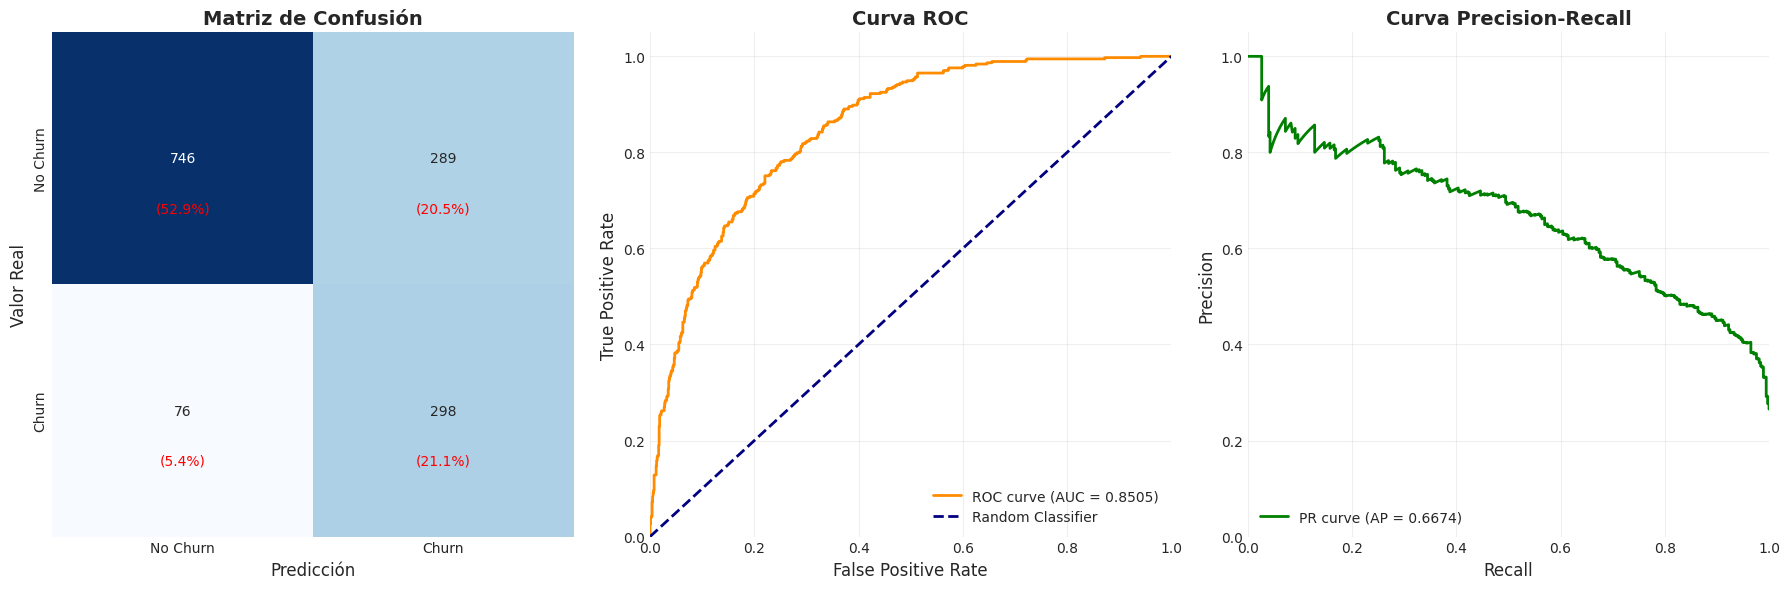


Reporte de Clasificación Detallado:

              precision    recall  f1-score   support

    No Churn       0.91      0.72      0.80      1035
       Churn       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [65]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, classification_report

# Crear visualizaciones de evaluación
fig = plt.figure(figsize=(18, 6))

# 1. Matriz de Confusión
ax1 = plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
ax1.set_title('Matriz de Confusión', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valor Real', fontsize=12)
ax1.set_xlabel('Predicción', fontsize=12)

# Añadir porcentajes
for i in range(2):
    for j in range(2):
        text = ax1.text(j + 0.5, i + 0.7, f'({cm[i, j]/cm.sum()*100:.1f}%)',
                       ha="center", va="center", color="red", fontsize=10)

# 2. Curva ROC
ax2 = plt.subplot(1, 3, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

# 3. Curva Precision-Recall
ax3 = plt.subplot(1, 3, 3)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba_best)
avg_precision = average_precision_score(y_test, y_pred_proba_best)

ax3.plot(recall_curve, precision_curve, color='green', lw=2,
         label=f'PR curve (AP = {avg_precision:.4f})')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.set_title('Curva Precision-Recall', fontsize=14, fontweight='bold')
ax3.legend(loc="lower left")
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación Detallado:\n")
print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))

---

# 🔍 10. Interpretabilidad y Robustez

> **Propósito:** Entender qué características son más importantes y validar estabilidad del modelo.

**Análisis:**
- 📊 Feature Importance
- 🔄 Validación Cruzada Estratificada
- 🎲 Robustez con Múltiples Semillas
- ✅ Validación Multi-Iteración para Deployment

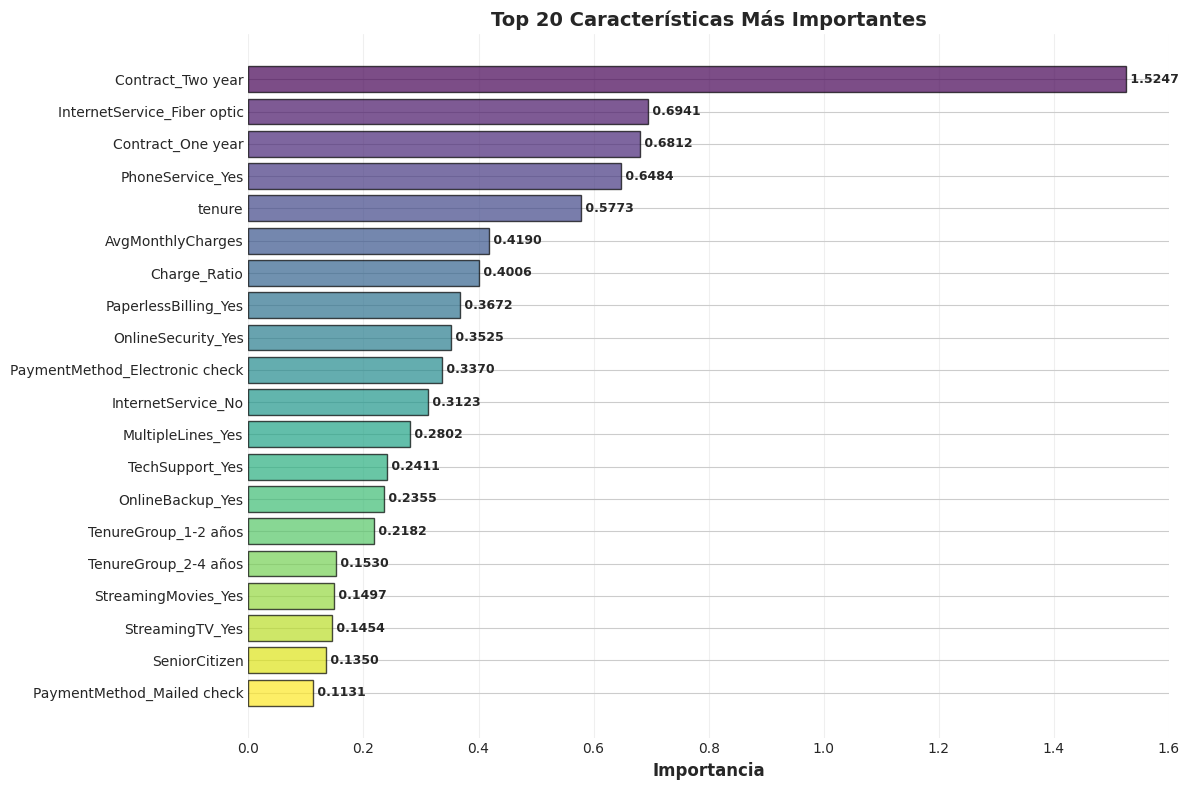


Top 10 Características Más Importantes:

                       Feature  Importance
             Contract_Two year    1.524701
   InternetService_Fiber optic    0.694082
             Contract_One year    0.681189
              PhoneService_Yes    0.648438
                        tenure    0.577288
             AvgMonthlyCharges    0.419024
                  Charge_Ratio    0.400593
          PaperlessBilling_Yes    0.367171
            OnlineSecurity_Yes    0.352531
PaymentMethod_Electronic check    0.336993


In [66]:
# Obtener importancia de características
if hasattr(best_model_optimized, 'feature_importances_'):
    feature_importance = best_model_optimized.feature_importances_
elif hasattr(best_model_optimized, 'coef_'):
    # For Logistic Regression, coef_ is typically 2D for binary classification (1, n_features)
    # We use the absolute values of coefficients for importance.
    feature_importance = np.abs(best_model_optimized.coef_[0])
else:
    raise ValueError("Model does not have feature_importances_ or coef_ attribute.")

# Crear DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Top 20 características
top_20 = importance_df.head(20)

# Visualizar
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_20)), top_20['Importance'],
                color=plt.cm.viridis(np.linspace(0, 1, len(top_20))),
                edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.title('Top 20 Características Más Importantes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (idx, row) in enumerate(top_20.iterrows()):
    plt.text(row['Importance'], i, f" {row['Importance']:.4f}",
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 10 Características Más Importantes:\n")
print(importance_df.head(10).to_string(index=False))

Scores de Validación Cruzada (ROC-AUC):
  Fold 1: 0.8475
  Fold 2: 0.8183
  Fold 3: 0.8441
  Fold 4: 0.8430
  Fold 5: 0.8467

Promedio: 0.8399 (+/- 0.0219)


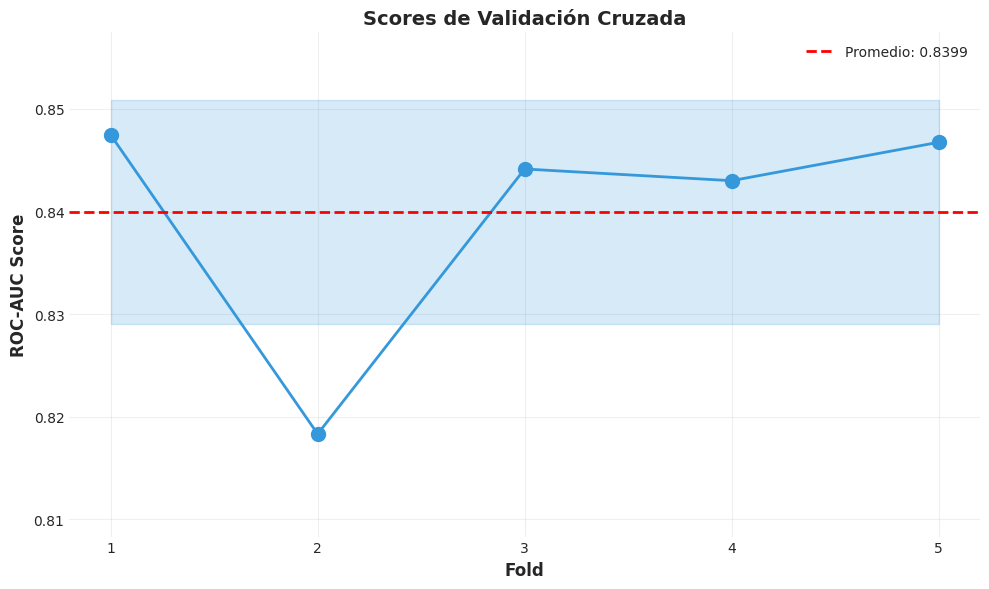

In [67]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Validación cruzada con el mejor modelo
cv_scores = cross_val_score(best_model_optimized, X_train_balanced, y_train_balanced,
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
                            scoring='roc_auc', n_jobs=-1)

print("Scores de Validación Cruzada (ROC-AUC):")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nPromedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=10, color='#3498db')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2, label=f'Promedio: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 6),
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='#3498db')
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('ROC-AUC Score', fontsize=12, fontweight='bold')
plt.title('Scores de Validación Cruzada', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.ylim([cv_scores.min() - 0.01, cv_scores.max() + 0.01])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 🎲 10.1 Validación de Robustez con Múltiples Semillas

> **Importante para producción:** Validar que el modelo es estable con diferentes semillas.

In [68]:
# ============================================================================
# VALIDACIÓN DE ROBUSTEZ CON MÚLTIPLES SEMILLAS
# ============================================================================

print("="*80)
print("🔍 VALIDACIÓN DE ROBUSTEZ DEL MODELO")
print("="*80)
print("\n⚠️  Esta validación es CRÍTICA antes de deployment a producción")
print("\n📋 Proceso:")
print("   1. Entrenar con los MEJORES hiperparámetros ya encontrados")
print("   2. Evaluar con 5 semillas diferentes (42, 123, 456, 789, 2024)")
print("   3. Analizar variabilidad del rendimiento")
print("   4. Aplicar criterios de aceptación para producción")
print("\n" + "="*80)

# Semillas para validación de robustez
SEEDS = [42, 123, 456, 789, 2024]
robustness_results = []

for seed in SEEDS:
    print(f"\n🎲 Evaluando con semilla: {seed}")

    # División de datos con nueva semilla
    X_train_rob, X_test_rob, y_train_rob, y_test_rob = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Preprocesamiento
    X_train_rob_processed = preprocessor.fit_transform(X_train_rob)
    X_test_rob_processed = preprocessor.transform(X_test_rob)

    # Balanceo con SMOTE
    smote_rob = SMOTE(random_state=seed)
    X_train_rob_balanced, y_train_rob_balanced = smote_rob.fit_resample(
        X_train_rob_processed, y_train_rob
    )

    # Entrenar con los MEJORES hiperparámetros ya encontrados
    # Crear una copia del modelo con la nueva semilla
    model_params = search.best_params_.copy()
    model_params['random_state'] = seed

    if best_model_name == 'Random Forest':
        model_rob = RandomForestClassifier(**model_params)
    elif best_model_name == 'Gradient Boosting':
        model_rob = GradientBoostingClassifier(**model_params)
    elif best_model_name == 'XGBoost':
        model_params['eval_metric'] = 'logloss'
        model_rob = xgb.XGBClassifier(**model_params)
    elif best_model_name == 'Logistic Regression':
        model_rob = LogisticRegression(**model_params)
    else:
        # Para otros modelos, usar el tipo del mejor modelo
        model_rob = type(best_model_optimized)(**model_params)

    model_rob.fit(X_train_rob_balanced, y_train_rob_balanced)

    # Evaluar
    y_pred_rob = model_rob.predict(X_test_rob_processed)
    y_pred_proba_rob = model_rob.predict_proba(X_test_rob_processed)[:, 1]

    robustness_results.append({
        'Semilla': seed,
        'ROC-AUC': roc_auc_score(y_test_rob, y_pred_proba_rob),
        'Precision': precision_score(y_test_rob, y_pred_rob),
        'Recall': recall_score(y_test_rob, y_pred_rob),
        'F1-Score': f1_score(y_test_rob, y_pred_rob),
        'Accuracy': accuracy_score(y_test_rob, y_pred_rob)
    })

    print(f"   ✅ ROC-AUC: {robustness_results[-1]['ROC-AUC']:.4f}")

# Análisis de resultados
df_robustness = pd.DataFrame(robustness_results)

print("\n" + "="*80)
print("📊 RESULTADOS DE ROBUSTEZ:")
print("="*80)
print(df_robustness.to_string(index=False))

print("\n" + "="*80)
print("📈 ESTADÍSTICAS:")
print("="*80)
print(f"\nROC-AUC:")
print(f"   • Promedio:           {df_robustness['ROC-AUC'].mean():.4f}")
print(f"   • Desviación estándar: {df_robustness['ROC-AUC'].std():.4f}")
print(f"   • Mínimo:             {df_robustness['ROC-AUC'].min():.4f}")
print(f"   • Máximo:             {df_robustness['ROC-AUC'].max():.4f}")
print(f"   • Rango:              {df_robustness['ROC-AUC'].max() - df_robustness['ROC-AUC'].min():.4f}")

print(f"\nRecall:")
print(f"   • Promedio:           {df_robustness['Recall'].mean():.4f}")
print(f"   • Desviación estándar: {df_robustness['Recall'].std():.4f}")

print(f"\nPrecision:")
print(f"   • Promedio:           {df_robustness['Precision'].mean():.4f}")
print(f"   • Desviación estándar: {df_robustness['Precision'].std():.4f}")

# Criterios de aceptación para producción
print("\n" + "="*80)
print("🎯 CRITERIOS DE ACEPTACIÓN PARA PRODUCCIÓN:")
print("="*80)

roc_auc_std = df_robustness['ROC-AUC'].std()
roc_auc_range = df_robustness['ROC-AUC'].max() - df_robustness['ROC-AUC'].min()
roc_auc_mean = df_robustness['ROC-AUC'].mean()

# Criterio 1: Desviación estándar
criterion_1 = roc_auc_std < 0.02
print(f"\n1. Desviación estándar < 0.02: {roc_auc_std:.4f} {'✅ PASS' if criterion_1 else '❌ FAIL'}")

# Criterio 2: Rango de variación
criterion_2 = roc_auc_range < 0.05
print(f"2. Rango de variación < 0.05:  {roc_auc_range:.4f} {'✅ PASS' if criterion_2 else '❌ FAIL'}")

# Criterio 3: ROC-AUC promedio
criterion_3 = roc_auc_mean > 0.80
print(f"3. ROC-AUC promedio > 0.80:    {roc_auc_mean:.4f} {'✅ PASS' if criterion_3 else '❌ FAIL'}")

# Decisión final
all_criteria_pass = criterion_1 and criterion_2 and criterion_3

print("\n" + "="*80)
if all_criteria_pass:
    print("✅ MODELO ROBUSTO - APROBADO PARA PRODUCCIÓN")
    print("="*80)
    print("\n🎉 El modelo ha pasado todos los criterios de robustez.")
    print("   El rendimiento es estable y predecible.")
    print("   ✅ Listo para deployment a producción.")
else:
    print("⚠️  MODELO INESTABLE - REQUIERE REVISIÓN")
    print("="*80)
    print("\n⚠️  El modelo muestra alta variabilidad en el rendimiento.")
    print("   Recomendaciones:")
    if not criterion_1:
        print("   • Reducir la desviación estándar (considerar más datos o regularización)")
    if not criterion_2:
        print("   • Reducir el rango de variación (revisar hiperparámetros)")
    if not criterion_3:
        print("   • Mejorar el ROC-AUC promedio (considerar feature engineering)")
    print("   ❌ NO recomendado para producción sin mejoras.")

print("\n" + "="*80)

# Guardar métricas de robustez para metadata
robustness_metrics = {
    'seeds_tested': SEEDS,
    'roc_auc_mean': float(roc_auc_mean),
    'roc_auc_std': float(roc_auc_std),
    'roc_auc_min': float(df_robustness['ROC-AUC'].min()),
    'roc_auc_max': float(df_robustness['ROC-AUC'].max()),
    'roc_auc_range': float(roc_auc_range),
    'robustness_status': 'APPROVED' if all_criteria_pass else 'REQUIRES_REVIEW',
    'criteria_passed': {
        'std_below_threshold': criterion_1,
        'range_below_threshold': criterion_2,
        'mean_above_threshold': criterion_3
    }
}

🔍 VALIDACIÓN DE ROBUSTEZ DEL MODELO

⚠️  Esta validación es CRÍTICA antes de deployment a producción

📋 Proceso:
   1. Entrenar con los MEJORES hiperparámetros ya encontrados
   2. Evaluar con 5 semillas diferentes (42, 123, 456, 789, 2024)
   3. Analizar variabilidad del rendimiento
   4. Aplicar criterios de aceptación para producción


🎲 Evaluando con semilla: 42
   ✅ ROC-AUC: 0.8466

🎲 Evaluando con semilla: 123
   ✅ ROC-AUC: 0.8474

🎲 Evaluando con semilla: 456
   ✅ ROC-AUC: 0.8483

🎲 Evaluando con semilla: 789
   ✅ ROC-AUC: 0.8638

🎲 Evaluando con semilla: 2024
   ✅ ROC-AUC: 0.8513

📊 RESULTADOS DE ROBUSTEZ:
 Semilla  ROC-AUC  Precision   Recall  F1-Score  Accuracy
      42 0.846602   0.500838 0.799465  0.615860  0.735273
     123 0.847389   0.530435 0.815508  0.642782  0.759404
     456 0.848341   0.522361 0.780749  0.625938  0.752307
     789 0.863753   0.535529 0.826203  0.649842  0.763662
    2024 0.851316   0.511551 0.828877  0.632653  0.744500

📈 ESTADÍSTICAS:

ROC-AUC:
   

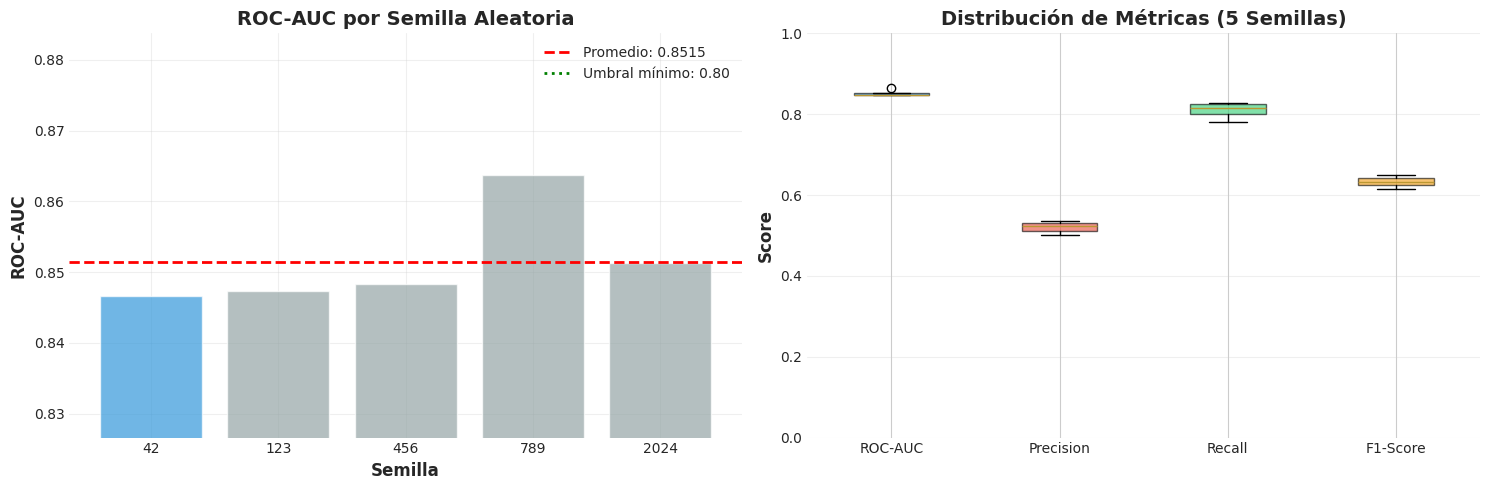


💡 Interpretación:
   • Barras azules: ROC-AUC para cada semilla
   • Línea roja discontinua: Promedio de ROC-AUC
   • Línea verde punteada: Umbral mínimo aceptable (0.80)
   • Boxplots: Distribución de todas las métricas

✅ Un modelo robusto debe tener:
   • Barras de altura similar (baja variabilidad)
   • Todas las barras por encima del umbral verde
   • Boxplots estrechos (baja dispersión)


In [69]:
# Visualización de resultados de robustez
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: ROC-AUC por semilla
ax1 = axes[0]
colors = ['#3498db' if x == 42 else '#95a5a6' for x in df_robustness['Semilla']]
ax1.bar(df_robustness['Semilla'].astype(str), df_robustness['ROC-AUC'], color=colors, alpha=0.7)
ax1.axhline(y=df_robustness['ROC-AUC'].mean(), color='red', linestyle='--',
            label=f'Promedio: {df_robustness["ROC-AUC"].mean():.4f}', linewidth=2)
ax1.axhline(y=0.80, color='green', linestyle=':', label='Umbral mínimo: 0.80', linewidth=2)
ax1.set_xlabel('Semilla', fontsize=12, fontweight='bold')
ax1.set_ylabel('ROC-AUC', fontsize=12, fontweight='bold')
ax1.set_title('ROC-AUC por Semilla Aleatoria', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_ylim([df_robustness['ROC-AUC'].min() - 0.02, df_robustness['ROC-AUC'].max() + 0.02])

# Gráfico 2: Boxplot de métricas
ax2 = axes[1]
metrics_data = df_robustness[['ROC-AUC', 'Precision', 'Recall', 'F1-Score']]
bp = ax2.boxplot([metrics_data['ROC-AUC'], metrics_data['Precision'],
                   metrics_data['Recall'], metrics_data['F1-Score']],
                  labels=['ROC-AUC', 'Precision', 'Recall', 'F1-Score'],
                  patch_artist=True)

# Colorear boxplots
colors_box = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Métricas (5 Semillas)', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("   • Barras azules: ROC-AUC para cada semilla")
print("   • Línea roja discontinua: Promedio de ROC-AUC")
print("   • Línea verde punteada: Umbral mínimo aceptable (0.80)")
print("   • Boxplots: Distribución de todas las métricas")
print("\n✅ Un modelo robusto debe tener:")
print("   • Barras de altura similar (baja variabilidad)")
print("   • Todas las barras por encima del umbral verde")
print("   • Boxplots estrechos (baja dispersión)")


## 🔄 10.2 Validación Automatizada Multi-Iteración

> Ejecutar el pipeline completo N veces para validar consistencia antes de deployment.

In [70]:
# ============================================================================
# CONFIGURACIÓN DE VALIDACIÓN MULTI-ITERACIÓN
# ============================================================================

print("="*80)
print("🔧 CONFIGURACIÓN DE VALIDACIÓN MULTI-ITERACIÓN")
print("="*80)

# ---------------------------------------------------------------------------
# PARÁMETROS PRINCIPALES
# ---------------------------------------------------------------------------

# Número de iteraciones completas a ejecutar
N_ITERATIONS = 10  # 🔧 AJUSTABLE: Cambiar según necesidad (recomendado: 5-20)

# Semilla base para generar semillas únicas por iteración
SEED_BASE = 42  # 🔧 AJUSTABLE: Semilla inicial para reproducibilidad

# Directorio para guardar resultados de cada iteración
MULTI_ITERATION_DIR = 'multi_iteration_results'
os.makedirs(MULTI_ITERATION_DIR, exist_ok=True)

# ---------------------------------------------------------------------------
# CRITERIOS DE ACEPTACIÓN PARA PRODUCCIÓN
# ---------------------------------------------------------------------------

ACCEPTANCE_CRITERIA = {
    'roc_auc_mean_min': 0.80,      # ROC-AUC promedio mínimo
    'roc_auc_std_max': 0.05,       # Desviación estándar máxima de ROC-AUC
    'recall_mean_min': 0.70,       # Recall promedio mínimo
    'consistency_threshold': 0.70  # % mínimo de iteraciones con ROC-AUC > 0.80
}

print(f"\n📊 Configuración:")
print(f"   • Número de iteraciones: {N_ITERATIONS}")
print(f"   • Semilla base: {SEED_BASE}")
print(f"   • Directorio de resultados: {MULTI_ITERATION_DIR}/")

print(f"\n✅ Criterios de aceptación:")
print(f"   • ROC-AUC promedio ≥ {ACCEPTANCE_CRITERIA['roc_auc_mean_min']:.2f}")
print(f"   • ROC-AUC desv. estándar ≤ {ACCEPTANCE_CRITERIA['roc_auc_std_max']:.2f}")
print(f"   • Recall promedio ≥ {ACCEPTANCE_CRITERIA['recall_mean_min']:.2f}")
print(f"   • Consistencia ≥ {ACCEPTANCE_CRITERIA['consistency_threshold']*100:.0f}% iteraciones con ROC-AUC > 0.80")

print(f"\n⏱️  Tiempo estimado: ~{N_ITERATIONS} × (tiempo de 1 pipeline completo)")
print("\n" + "="*80)

🔧 CONFIGURACIÓN DE VALIDACIÓN MULTI-ITERACIÓN

📊 Configuración:
   • Número de iteraciones: 10
   • Semilla base: 42
   • Directorio de resultados: multi_iteration_results/

✅ Criterios de aceptación:
   • ROC-AUC promedio ≥ 0.80
   • ROC-AUC desv. estándar ≤ 0.05
   • Recall promedio ≥ 0.70
   • Consistencia ≥ 70% iteraciones con ROC-AUC > 0.80

⏱️  Tiempo estimado: ~10 × (tiempo de 1 pipeline completo)



In [71]:
# ============================================================================
# FUNCIÓN PARA EJECUTAR PIPELINE COMPLETO EN UNA ITERACIÓN
# ============================================================================

def ejecutar_pipeline_simplificado(seed, iteration_num, verbose=True):
    """
    Ejecuta el pipeline completo de ML con una semilla específica.

    Parámetros:
    -----------
    seed : int
        Semilla aleatoria para esta iteración
    iteration_num : int
        Número de iteración (para logging y guardado)
    verbose : bool
        Si True, imprime progreso detallado

    Returns:
    --------
    dict : Diccionario con resultados de la iteración
    """

    if verbose:
        print(f"\n{'='*80}")
        print(f"🔄 ITERACIÓN {iteration_num} - Semilla: {seed}")
        print(f"{'='*80}")

    try:
        # Timestamp para esta iteración (hora Colombia)
        timestamp = get_colombia_time().strftime('%Y%m%d_%H%M%S')

        # -----------------------------------------------------------------------
        # PASO 1: Cargar y preparar datos (ya implementado en el notebook)
        # -----------------------------------------------------------------------
        if verbose:
            print(f"\n📂 Paso 1/8: Cargando datos...")

        # Nota: Asumimos que df ya está cargado globalmente
        # Si no, descomentar: df = cargar_y_preparar_datos()

        # -----------------------------------------------------------------------
        # PASO 2: División de datos con semilla específica
        # -----------------------------------------------------------------------
        if verbose:
            print(f"✂️  Paso 2/8: Dividiendo datos (seed={seed})...")

        from sklearn.model_selection import train_test_split

        # Crear una copia para evitar modificar el DataFrame global directamente
        # y asegurar que customerID es eliminado y Churn es binarizado.
        df_iteration = df.copy()

        # Eliminar customerID (no es útil para predicción)
        if 'customerID' in df_iteration.columns:
            df_iteration = df_iteration.drop('customerID', axis=1)

        # Separar características y variable objetivo
        X = df_iteration.drop('Churn', axis=1)
        y = df_iteration['Churn'].map({'Yes': 1, 'No': 0}) # Convertir Churn a binario (0/1)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=seed, stratify=y
        )

        # -----------------------------------------------------------------------
        # PASO 3: Preprocesamiento
        # -----------------------------------------------------------------------
        if verbose:
            print(f"🔧 Paso 3/8: Preprocesando datos...")

        from sklearn.preprocessing import StandardScaler, LabelEncoder

        # Separar features numéricas y categóricas
        numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

        # Escalar features numéricas
        scaler = StandardScaler()
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()

        X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
        X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

        # Codificar features categóricas
        label_encoders = {}
        for col in categorical_features:
            le = LabelEncoder()
            X_train_scaled[col] = le.fit_transform(X_train[col])
            X_test_scaled[col] = le.transform(X_test[col])
            label_encoders[col] = le

        # -----------------------------------------------------------------------
        # PASO 4: Comparativa de técnicas de balanceo
        # -----------------------------------------------------------------------
        if verbose:
            print(f"⚖️  Paso 4/8: Comparando técnicas de balanceo...")

        from imblearn.over_sampling import SMOTE
        from imblearn.combine import SMOTETomek
        from imblearn.under_sampling import RandomUnderSampler
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import roc_auc_score

        balancing_results = {}

        # Probar 3 técnicas de balanceo
        balancing_techniques = {
            'SMOTE': SMOTE(random_state=seed),
            'SMOTETomek': SMOTETomek(random_state=seed),
            'RandomUnderSampler': RandomUnderSampler(random_state=seed)
        }

        for tech_name, balancer in balancing_techniques.items():
            X_balanced, y_balanced = balancer.fit_resample(X_train_scaled, y_train)

            # Entrenar modelo rápido para evaluar
            rf_quick = RandomForestClassifier(n_estimators=50, random_state=seed, n_jobs=-1)
            rf_quick.fit(X_balanced, y_balanced)

            y_pred_proba = rf_quick.predict_proba(X_test_scaled)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            balancing_results[tech_name] = roc_auc

        # Seleccionar mejor técnica
        best_balancing = max(balancing_results, key=balancing_results.get)

        if verbose:
            print(f"   ✅ Mejor técnica: {best_balancing} (ROC-AUC: {balancing_results[best_balancing]:.4f})")

        # Aplicar mejor técnica
        best_balancer = balancing_techniques[best_balancing]
        X_train_balanced, y_train_balanced = best_balancer.fit_resample(X_train_scaled, y_train)


        # -----------------------------------------------------------------------
        # PASO 5: Entrenamiento de modelos y selección del mejor
        # -----------------------------------------------------------------------
        if verbose:
            print(f"🤖 Paso 5/8: Entrenando modelos...")

        from sklearn.linear_model import LogisticRegression
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import GradientBoostingClassifier
        from xgboost import XGBClassifier
        from sklearn.metrics import recall_score, precision_score, f1_score

        # Modelos a evaluar (versión simplificada)
        models = {
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1),
            'XGBoost': XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1, eval_metric='logloss'),
            'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=seed)
        }

        model_results = {}

        for model_name, model in models.items():
            model.fit(X_train_balanced, y_train_balanced)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            y_pred = model.predict(X_test_scaled)

            model_results[model_name] = {
                'roc_auc': roc_auc_score(y_test, y_pred_proba),
                'recall': recall_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'model': model
            }

        # Seleccionar mejor modelo por ROC-AUC
        best_model_name = max(model_results, key=lambda x: model_results[x]['roc_auc'])
        best_model = model_results[best_model_name]['model']
        best_metrics = model_results[best_model_name]

        if verbose:
            print(f"   ✅ Mejor modelo: {best_model_name} (ROC-AUC: {best_metrics['roc_auc']:.4f})")

        # -----------------------------------------------------------------------
        # PASO 6: Validación de robustez (mini-versión con 3 semillas)
        # -----------------------------------------------------------------------
        if verbose:
            print(f"🎲 Paso 6/8: Validación de robustez...")

        mini_seeds = [seed, seed+100, seed+200]
        robustness_scores = []

        for mini_seed in mini_seeds:
            # Usar df_iteration para la validación de robustez también
            X_tr, X_te, y_tr, y_te = train_test_split(
                X, y, test_size=0.2, random_state=mini_seed, stratify=y
            )

            # Preprocesar
            X_tr_scaled = X_tr.copy()
            X_te_scaled = X_te.copy()
            scaler_mini = StandardScaler() # New scaler for mini-validation
            X_tr_scaled[numeric_features] = scaler_mini.fit_transform(X_tr[numeric_features])
            X_te_scaled[numeric_features] = scaler_mini.transform(X_te[numeric_features])

            for col in categorical_features:
                le_mini = LabelEncoder() # New LabelEncoder for mini-validation
                X_tr_scaled[col] = le_mini.fit_transform(X_tr[col])
                X_te_scaled[col] = le_mini.transform(X_te[col])

            # Balancear
            balancer_mini = balancing_techniques[best_balancing] # Use the best balancing technique identified
            X_tr_bal, y_tr_bal = balancer_mini.fit_resample(X_tr_scaled, y_tr)

            # Entrenar y evaluar
            # Crear copia del modelo con parámetros apropiados
            model_params = {'random_state': mini_seed} if hasattr(best_model, 'random_state') else {}

            # Solo agregar n_jobs si el modelo lo acepta
            try:
                if 'n_jobs' in type(best_model)().get_params():
                    model_params['n_jobs'] = -1
            except:
                pass  # Algunos modelos pueden fallar en get_params()

            model_copy = type(best_model)(**model_params)

            if hasattr(model_copy, 'n_estimators'):
                model_copy.n_estimators = 50  # Reducir para velocidad
            if hasattr(model_copy, 'eval_metric'):
                model_copy.eval_metric = 'logloss'

            model_copy.fit(X_tr_bal, y_tr_bal)
            y_pred_proba = model_copy.predict_proba(X_te_scaled)[:, 1]
            robustness_scores.append(roc_auc_score(y_te, y_pred_proba))

        robustness_mean = np.mean(robustness_scores)
        robustness_std = np.std(robustness_scores)

        if verbose:
            print(f"   ✅ ROC-AUC promedio: {robustness_mean:.4f} (±{robustness_std:.4f})")

        # -----------------------------------------------------------------------
        # PASO 7: Guardar modelo y resultados
        # -----------------------------------------------------------------------
        if verbose:
            print(f"💾 Paso 7/8: Guardando modelo...")

        model_filename = f"{MULTI_ITERATION_DIR}/model_iter{iteration_num}_seed{seed}.pkl"
        joblib.dump(best_model, model_filename)

        # -----------------------------------------------------------------------
        # PASO 8: Generar reporte
        # -----------------------------------------------------------------------
        if verbose:
            print(f"📝 Paso 8/8: Generando reporte...")

        report_filename = f"{MULTI_ITERATION_DIR}/report_iter{iteration_num}_seed{seed}.md"

        with open(report_filename, 'w', encoding='utf-8') as f:
            f.write(f"# Reporte Iteración {iteration_num}\n\n")
            f.write(f"**Semilla:** {seed}\n\n")
            f.write(f"**Timestamp:** {timestamp}\n\n")
            f.write(f"## Resultados\n\n")
            f.write(f"- **Mejor técnica de balanceo:** {best_balancing}\n")
            f.write(f"- **Mejor modelo:** {best_model_name}\n")
            f.write(f"- **ROC-AUC:** {best_metrics['roc_auc']:.4f}\n")
            f.write(f"- **Recall:** {best_metrics['recall']:.4f}\n")
            f.write(f"- **Precision:** {best_metrics['precision']:.4f}\n")
            f.write(f"- **F1-Score:** {best_metrics['f1']:.4f}\n")
            f.write(f"- **Robustez (ROC-AUC promedio):** {robustness_mean:.4f} (±{robustness_std:.4f})\n")

        # -----------------------------------------------------------------------
        # RETORNAR RESULTADOS
        # -----------------------------------------------------------------------
        results = {
            'iteration': iteration_num,
            'seed': seed,
            'timestamp': timestamp,
            'best_balancing': best_balancing,
            'best_model_name': best_model_name,
            'roc_auc': best_metrics['roc_auc'],
            'recall': best_metrics['recall'],
            'precision': best_metrics['precision'],
            'f1': best_metrics['f1'],
            'robustness_mean': robustness_mean,
            'robustness_std': robustness_std,
            'model_file': model_filename,
            'report_file': report_filename,
            'status': 'SUCCESS'
        }

        if verbose:
            print(f"\n✅ Iteración {iteration_num} completada exitosamente")

        return results

    except Exception as e:
        if verbose:
            print(f"\n❌ Error en iteración {iteration_num}: {str(e)}")

        return {
            'iteration': iteration_num,
            'seed': seed,
            'status': 'FAILED',
            'error': str(e)
        }

print("✅ Función ejecutar_pipeline_simplificado() definida")


✅ Función ejecutar_pipeline_simplificado() definida


In [72]:
# ============================================================================
# LOOP PRINCIPAL DE VALIDACIÓN MULTI-ITERACIÓN
# ============================================================================

print("="*80)
print("🚀 INICIANDO VALIDACIÓN MULTI-ITERACIÓN")
print("="*80)
print(f"\n📊 Configuración:")
print(f"   • Total de iteraciones: {N_ITERATIONS}")
print(f"   • Semilla base: {SEED_BASE}")
print(f"\n⏱️  Tiempo estimado: Esto puede tomar varios minutos...")
print(f"\n{'='*80}\n")

# Inicializar lista para almacenar resultados
iteration_results = []

# Tiempo de inicio
start_time = datetime.now()

# ---------------------------------------------------------------------------
# EJECUTAR N ITERACIONES
# ---------------------------------------------------------------------------

for i in range(1, N_ITERATIONS + 1):
    # Generar semilla única para esta iteración
    iteration_seed = SEED_BASE + (i * 1000)

    print(f"\n{'='*80}")
    print(f"🔄 ITERACIÓN {i}/{N_ITERATIONS}")
    print(f"{'='*80}")
    print(f"🎲 Semilla: {iteration_seed}")
    print(f"⏰ Hora de inicio: {get_colombia_time().strftime('%H:%M:%S')} (Colombia)")

    try:
        # Ejecutar pipeline completo
        result = ejecutar_pipeline_simplificado(
            seed=iteration_seed,
            iteration_num=i,
            verbose=True
        )

        # Guardar resultado
        iteration_results.append(result)

        # Mostrar resumen
        if result['status'] == 'SUCCESS':
            print(f"\n✅ ITERACIÓN {i} COMPLETADA")
            print(f"   • Modelo: {result['best_model_name']}")
            print(f"   • ROC-AUC: {result['roc_auc']:.4f}")
            print(f"   • Recall: {result['recall']:.4f}")
            print(f"   • Robustez: {result['robustness_mean']:.4f} (±{result['robustness_std']:.4f})")
        else:
            print(f"\n❌ ITERACIÓN {i} FALLÓ")
            print(f"   • Error: {result.get('error', 'Desconocido')}")

    except Exception as e:
        print(f"\n❌ ERROR CRÍTICO EN ITERACIÓN {i}: {str(e)}")
        print(f"   ⚠️  Continuando con siguiente iteración...")

        iteration_results.append({
            'iteration': i,
            'seed': iteration_seed,
            'status': 'FAILED',
            'error': str(e)
        })

    # Mostrar progreso
    elapsed = (datetime.now() - start_time).total_seconds()
    avg_time_per_iter = elapsed / i
    remaining_iters = N_ITERATIONS - i
    estimated_remaining = avg_time_per_iter * remaining_iters

    print(f"\n📊 Progreso: {i}/{N_ITERATIONS} ({i/N_ITERATIONS*100:.1f}%)")
    print(f"⏱️  Tiempo transcurrido: {elapsed/60:.1f} min")
    print(f"⏱️  Tiempo estimado restante: {estimated_remaining/60:.1f} min")

# ---------------------------------------------------------------------------
# RESUMEN FINAL
# ---------------------------------------------------------------------------

total_time = (datetime.now() - start_time).total_seconds()
successful_iterations = sum(1 for r in iteration_results if r['status'] == 'SUCCESS')
failed_iterations = N_ITERATIONS - successful_iterations

print(f"\n\n{'='*80}")
print("🎉 VALIDACIÓN MULTI-ITERACIÓN COMPLETADA")
print(f"{'='*80}")
print(f"\n📊 Resumen:")
print(f"   • Total de iteraciones: {N_ITERATIONS}")
print(f"   • Exitosas: {successful_iterations} ✅")
print(f"   • Fallidas: {failed_iterations} ❌")
print(f"   • Tasa de éxito: {successful_iterations/N_ITERATIONS*100:.1f}%")
print(f"\n⏱️  Tiempo total: {total_time/60:.1f} minutos")
print(f"⏱️  Tiempo promedio por iteración: {total_time/N_ITERATIONS/60:.1f} minutos")
print(f"\n{'='*80}\n")

# Guardar resultados consolidados
results_file = f"{MULTI_ITERATION_DIR}/all_iterations_results.json"
with open(results_file, 'w') as f:
    json.dump(iteration_results, f, indent=2, default=str)

print(f"💾 Resultados guardados en: {results_file}")

🚀 INICIANDO VALIDACIÓN MULTI-ITERACIÓN

📊 Configuración:
   • Total de iteraciones: 10
   • Semilla base: 42

⏱️  Tiempo estimado: Esto puede tomar varios minutos...



🔄 ITERACIÓN 1/10
🎲 Semilla: 1042
⏰ Hora de inicio: 14:54:43 (Colombia)

🔄 ITERACIÓN 1 - Semilla: 1042

📂 Paso 1/8: Cargando datos...
✂️  Paso 2/8: Dividiendo datos (seed=1042)...
🔧 Paso 3/8: Preprocesando datos...
⚖️  Paso 4/8: Comparando técnicas de balanceo...
   ✅ Mejor técnica: RandomUnderSampler (ROC-AUC: 0.8171)
🤖 Paso 5/8: Entrenando modelos...
   ✅ Mejor modelo: GradientBoosting (ROC-AUC: 0.8447)
🎲 Paso 6/8: Validación de robustez...
   ✅ ROC-AUC promedio: 0.8479 (±0.0011)
💾 Paso 7/8: Guardando modelo...
📝 Paso 8/8: Generando reporte...

✅ Iteración 1 completada exitosamente

✅ ITERACIÓN 1 COMPLETADA
   • Modelo: GradientBoosting
   • ROC-AUC: 0.8447
   • Recall: 0.8209
   • Robustez: 0.8479 (±0.0011)

📊 Progreso: 1/10 (10.0%)
⏱️  Tiempo transcurrido: 0.1 min
⏱️  Tiempo estimado restante: 0.8 min

🔄 ITERACIÓN 2/

In [73]:
# ============================================================================
# ANÁLISIS CONSOLIDADO DE TODAS LAS ITERACIONES
# ============================================================================

print("="*80)
print("📊 ANÁLISIS CONSOLIDADO DE RESULTADOS")
print("="*80)

# Filtrar solo iteraciones exitosas
successful_results = [r for r in iteration_results if r['status'] == 'SUCCESS']

if len(successful_results) == 0:
    print("\n❌ ERROR: No hay iteraciones exitosas para analizar")
else:
    # -----------------------------------------------------------------------
    # 1. CREAR DATAFRAME CON RESULTADOS
    # -----------------------------------------------------------------------

    df_results = pd.DataFrame(successful_results)

    print(f"\n✅ Iteraciones exitosas: {len(successful_results)}/{N_ITERATIONS}")
    print(f"\n📋 Tabla de Resultados:\n")

    # Seleccionar columnas relevantes para mostrar
    display_cols = ['iteration', 'seed', 'best_model_name', 'best_balancing',
                    'roc_auc', 'recall', 'precision', 'f1', 'robustness_mean', 'robustness_std']

    df_display = df_results[display_cols].copy()
    df_display.columns = ['Iter', 'Semilla', 'Modelo', 'Balanceo',
                          'ROC-AUC', 'Recall', 'Precision', 'F1', 'Rob_Mean', 'Rob_Std']

    # Formatear números
    for col in ['ROC-AUC', 'Recall', 'Precision', 'F1', 'Rob_Mean', 'Rob_Std']:
        df_display[col] = df_display[col].apply(lambda x: f"{x:.4f}")

    print(df_display.to_string(index=False))

    # -----------------------------------------------------------------------
    # 2. ESTADÍSTICAS DESCRIPTIVAS
    # -----------------------------------------------------------------------

    print(f"\n\n{'='*80}")
    print("📈 ESTADÍSTICAS DESCRIPTIVAS")
    print(f"{'='*80}\n")

    metrics = ['roc_auc', 'recall', 'precision', 'f1']

    for metric in metrics:
        values = df_results[metric]
        print(f"📊 {metric.upper().replace('_', '-')}:")
        print(f"   • Promedio: {values.mean():.4f}")
        print(f"   • Desv. Estándar: {values.std():.4f}")
        print(f"   • Mínimo: {values.min():.4f}")
        print(f"   • Máximo: {values.max():.4f}")
        print(f"   • Rango: {values.max() - values.min():.4f}")
        print()

    # -----------------------------------------------------------------------
    # 3. ANÁLISIS DE CONSISTENCIA
    # -----------------------------------------------------------------------

    print(f"{'='*80}")
    print("🎯 ANÁLISIS DE CONSISTENCIA")
    print(f"{'='*80}\n")

    # Modelos seleccionados
    model_counts = df_results['best_model_name'].value_counts()
    print("📊 Modelos seleccionados:")
    for model, count in model_counts.items():
        percentage = (count / len(successful_results)) * 100
        print(f"   • {model}: {count} veces ({percentage:.1f}%)")

    most_common_model = model_counts.index[0]
    print(f"\n✅ Modelo más consistente: {most_common_model}")

    # Técnicas de balanceo
    print(f"\n📊 Técnicas de balanceo seleccionadas:")
    balancing_counts = df_results['best_balancing'].value_counts()
    for tech, count in balancing_counts.items():
        percentage = (count / len(successful_results)) * 100
        print(f"   • {tech}: {count} veces ({percentage:.1f}%)")

    most_common_balancing = balancing_counts.index[0]
    print(f"\n✅ Técnica más consistente: {most_common_balancing}")

    # -----------------------------------------------------------------------
    # 4. ANÁLISIS DE ROBUSTEZ
    # -----------------------------------------------------------------------

    print(f"\n{'='*80}")
    print("🎲 ANÁLISIS DE ROBUSTEZ")
    print(f"{'='*80}\n")

    robustness_means = df_results['robustness_mean']
    robustness_stds = df_results['robustness_std']

    print(f"📊 Robustez promedio de todas las iteraciones:")
    print(f"   • ROC-AUC promedio: {robustness_means.mean():.4f}")
    print(f"   • Desv. estándar promedio: {robustness_stds.mean():.4f}")
    print(f"   • Mejor robustez: {robustness_means.max():.4f}")
    print(f"   • Peor robustez: {robustness_means.min():.4f}")

    # -----------------------------------------------------------------------
    # 5. GUARDAR ANÁLISIS CONSOLIDADO
    # -----------------------------------------------------------------------

    analysis_summary = {
        'total_iterations': N_ITERATIONS,
        'successful_iterations': len(successful_results),
        'failed_iterations': N_ITERATIONS - len(successful_results),
        'metrics': {
            'roc_auc': {
                'mean': float(df_results['roc_auc'].mean()),
                'std': float(df_results['roc_auc'].std()),
                'min': float(df_results['roc_auc'].min()),
                'max': float(df_results['roc_auc'].max())
            },
            'recall': {
                'mean': float(df_results['recall'].mean()),
                'std': float(df_results['recall'].std()),
                'min': float(df_results['recall'].min()),
                'max': float(df_results['recall'].max())
            },
            'precision': {
                'mean': float(df_results['precision'].mean()),
                'std': float(df_results['precision'].std()),
                'min': float(df_results['precision'].min()),
                'max': float(df_results['precision'].max())
            },
            'f1': {
                'mean': float(df_results['f1'].mean()),
                'std': float(df_results['f1'].std()),
                'min': float(df_results['f1'].min()),
                'max': float(df_results['f1'].max())
            }
        },
        'most_common_model': most_common_model,
        'most_common_balancing': most_common_balancing,
        'timestamp': get_colombia_time().strftime('%Y-%m-%d %H:%M:%S')
    }

    analysis_file = f"{MULTI_ITERATION_DIR}/consolidated_analysis.json"
    with open(analysis_file, 'w') as f:
        json.dump(analysis_summary, f, indent=2)

    print(f"\n💾 Análisis consolidado guardado en: {analysis_file}")
    print(f"\n{'='*80}\n")

📊 ANÁLISIS CONSOLIDADO DE RESULTADOS

✅ Iteraciones exitosas: 10/10

📋 Tabla de Resultados:

 Iter  Semilla           Modelo           Balanceo ROC-AUC Recall Precision     F1 Rob_Mean Rob_Std
    1     1042 GradientBoosting RandomUnderSampler  0.8447 0.8209    0.5041 0.6246   0.8479  0.0011
    2     2042 GradientBoosting              SMOTE  0.8493 0.7914    0.5492 0.6484   0.8417  0.0056
    3     3042 GradientBoosting         SMOTETomek  0.8622 0.7834    0.5581 0.6518   0.8462  0.0120
    4     4042 GradientBoosting              SMOTE  0.8489 0.7727    0.5645 0.6524   0.8449  0.0066
    5     5042 GradientBoosting RandomUnderSampler  0.8395 0.7861    0.5167 0.6235   0.8548  0.0089
    6     6042 GradientBoosting RandomUnderSampler  0.8419 0.8102    0.5179 0.6319   0.8432  0.0052
    7     7042 GradientBoosting RandomUnderSampler  0.8393 0.8048    0.5318 0.6404   0.8478  0.0091
    8     8042 GradientBoosting         SMOTETomek  0.8489 0.7353    0.5589 0.6351   0.8438  0.0112
    9  

📊 GENERANDO VISUALIZACIONES COMPARATIVAS


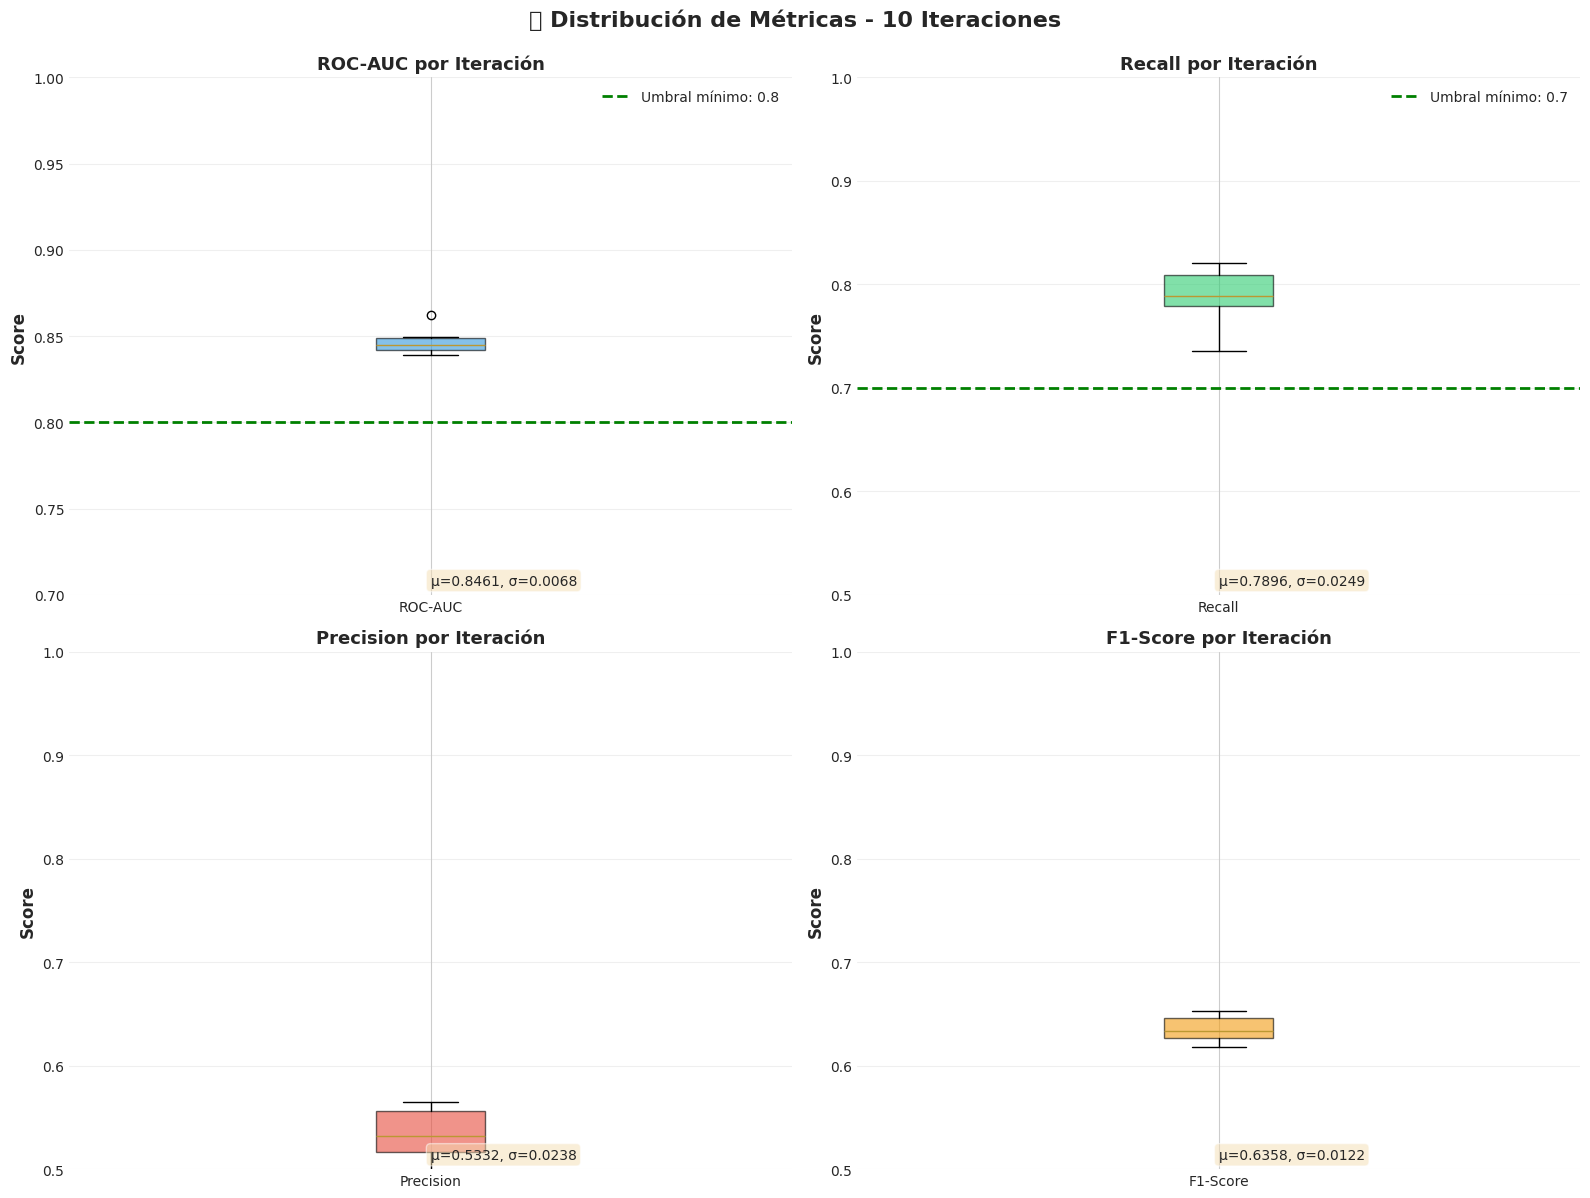


✅ Gráfico 1: Boxplots de métricas generado


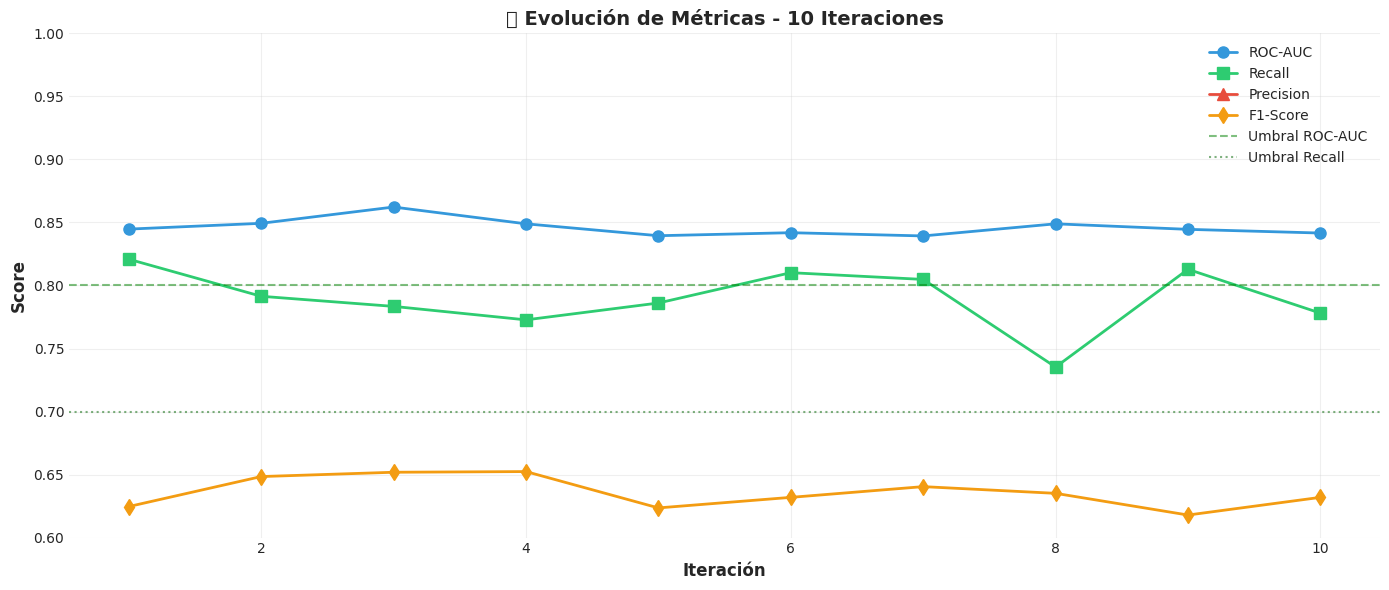

✅ Gráfico 2: Tendencias de métricas generado

💾 Visualizaciones guardadas en: multi_iteration_results/




In [74]:
# ============================================================================
# VISUALIZACIONES COMPARATIVAS DE TODAS LAS ITERACIONES
# ============================================================================

if len(successful_results) > 0:
    print("="*80)
    print("📊 GENERANDO VISUALIZACIONES COMPARATIVAS")
    print("="*80)

    # -----------------------------------------------------------------------
    # GRÁFICO 1: BOXPLOTS DE MÉTRICAS
    # -----------------------------------------------------------------------

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'📊 Distribución de Métricas - {len(successful_results)} Iteraciones',
                 fontsize=16, fontweight='bold', y=0.995)

    # Boxplot 1: ROC-AUC
    ax1 = axes[0, 0]
    bp1 = ax1.boxplot([df_results['roc_auc']], labels=['ROC-AUC'], patch_artist=True)
    bp1['boxes'][0].set_facecolor('#3498db')
    bp1['boxes'][0].set_alpha(0.6)
    ax1.axhline(y=ACCEPTANCE_CRITERIA['roc_auc_mean_min'], color='green',
                linestyle='--', label=f"Umbral mínimo: {ACCEPTANCE_CRITERIA['roc_auc_mean_min']}", linewidth=2)
    ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax1.set_title('ROC-AUC por Iteración', fontsize=13, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3, axis='y')
    ax1.set_ylim([0.7, 1.0])

    # Agregar estadísticas
    mean_roc = df_results['roc_auc'].mean()
    std_roc = df_results['roc_auc'].std()
    ax1.text(0.5, 0.02, f'μ={mean_roc:.4f}, σ={std_roc:.4f}',
             transform=ax1.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Boxplot 2: Recall
    ax2 = axes[0, 1]
    bp2 = ax2.boxplot([df_results['recall']], labels=['Recall'], patch_artist=True)
    bp2['boxes'][0].set_facecolor('#2ecc71')
    bp2['boxes'][0].set_alpha(0.6)
    ax2.axhline(y=ACCEPTANCE_CRITERIA['recall_mean_min'], color='green',
                linestyle='--', label=f"Umbral mínimo: {ACCEPTANCE_CRITERIA['recall_mean_min']}", linewidth=2)
    ax2.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax2.set_title('Recall por Iteración', fontsize=13, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3, axis='y')
    ax2.set_ylim([0.5, 1.0])

    mean_recall = df_results['recall'].mean()
    std_recall = df_results['recall'].std()
    ax2.text(0.5, 0.02, f'μ={mean_recall:.4f}, σ={std_recall:.4f}',
             transform=ax2.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Boxplot 3: Precision
    ax3 = axes[1, 0]
    bp3 = ax3.boxplot([df_results['precision']], labels=['Precision'], patch_artist=True)
    bp3['boxes'][0].set_facecolor('#e74c3c')
    bp3['boxes'][0].set_alpha(0.6)
    ax3.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax3.set_title('Precision por Iteración', fontsize=13, fontweight='bold')
    ax3.grid(alpha=0.3, axis='y')
    ax3.set_ylim([0.5, 1.0])

    mean_prec = df_results['precision'].mean()
    std_prec = df_results['precision'].std()
    ax3.text(0.5, 0.02, f'μ={mean_prec:.4f}, σ={std_prec:.4f}',
             transform=ax3.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Boxplot 4: F1-Score
    ax4 = axes[1, 1]
    bp4 = ax4.boxplot([df_results['f1']], labels=['F1-Score'], patch_artist=True)
    bp4['boxes'][0].set_facecolor('#f39c12')
    bp4['boxes'][0].set_alpha(0.6)
    ax4.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax4.set_title('F1-Score por Iteración', fontsize=13, fontweight='bold')
    ax4.grid(alpha=0.3, axis='y')
    ax4.set_ylim([0.5, 1.0])

    mean_f1 = df_results['f1'].mean()
    std_f1 = df_results['f1'].std()
    ax4.text(0.5, 0.02, f'μ={mean_f1:.4f}, σ={std_f1:.4f}',
             transform=ax4.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig(f"{MULTI_ITERATION_DIR}/boxplots_metrics.png", dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✅ Gráfico 1: Boxplots de métricas generado")

    # -----------------------------------------------------------------------
    # GRÁFICO 2: TENDENCIAS POR ITERACIÓN
    # -----------------------------------------------------------------------

    fig, ax = plt.subplots(figsize=(14, 6))

    iterations = df_results['iteration']

    ax.plot(iterations, df_results['roc_auc'], marker='o', linewidth=2,
            label='ROC-AUC', color='#3498db', markersize=8)
    ax.plot(iterations, df_results['recall'], marker='s', linewidth=2,
            label='Recall', color='#2ecc71', markersize=8)
    ax.plot(iterations, df_results['precision'], marker='^', linewidth=2,
            label='Precision', color='#e74c3c', markersize=8)
    ax.plot(iterations, df_results['f1'], marker='d', linewidth=2,
            label='F1-Score', color='#f39c12', markersize=8)

    # Líneas de referencia
    ax.axhline(y=ACCEPTANCE_CRITERIA['roc_auc_mean_min'], color='green',
               linestyle='--', alpha=0.5, label='Umbral ROC-AUC')
    ax.axhline(y=ACCEPTANCE_CRITERIA['recall_mean_min'], color='darkgreen',
               linestyle=':', alpha=0.5, label='Umbral Recall')

    ax.set_xlabel('Iteración', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title(f'📈 Evolución de Métricas - {len(successful_results)} Iteraciones',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(alpha=0.3)
    ax.set_ylim([0.6, 1.0])

    plt.tight_layout()
    plt.savefig(f"{MULTI_ITERATION_DIR}/trends_metrics.png", dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Gráfico 2: Tendencias de métricas generado")

    print(f"\n💾 Visualizaciones guardadas en: {MULTI_ITERATION_DIR}/")
    print(f"\n{'='*80}\n")
else:
    print("\n⚠️  No hay resultados exitosos para visualizar")

In [75]:
# ============================================================================
# PASO 6: DECISIÓN AUTOMATIZADA SOBRE DEPLOYMENT
# ============================================================================

import json
from datetime import datetime, timezone
import numpy as np # Import numpy for boolean conversion if np.bool_ is used
import pandas as pd # Import pandas for DataFrame operations

# Configurar zona horaria de Colombia (si no está definida)
if 'COLOMBIA_TZ' not in dir():
    try:
        from zoneinfo import ZoneInfo
        COLOMBIA_TZ = ZoneInfo('America/Bogota')
    except ImportError:
        import pytz
        COLOMBIA_TZ = pytz.timezone('America/Bogota')

if 'get_colombia_time' not in dir():
    def get_colombia_time():
        return datetime.now(COLOMBIA_TZ)

print("="*80)
print("✅ DECISIÓN AUTOMATIZADA SOBRE DEPLOYMENT")
print("="*80)

# Ensure 'successful_results' is available and not empty
# Assuming 'successful_results' and 'df_results' are available from previous cells
# and ACCEPTANCE_CRITERIA, MULTI_ITERATION_DIR are globally defined.

if len(successful_results) > 0:
    # Recalculate metrics that might be out of scope or for self-containment
    roc_auc_mean = df_results['roc_auc'].mean()
    roc_auc_std = df_results['roc_auc'].std()
    recall_mean = df_results['recall'].mean()

    # Calculate consistency rate: percentage of iterations where ROC-AUC > 0.80
    consistent_roc_auc_iters = df_results[df_results['roc_auc'] >= ACCEPTANCE_CRITERIA['roc_auc_mean_min']].shape[0]
    consistency_rate = consistent_roc_auc_iters / len(successful_results)

    # Apply criteria
    criterion_1 = roc_auc_mean >= ACCEPTANCE_CRITERIA['roc_auc_mean_min']
    criterion_2 = roc_auc_std <= ACCEPTANCE_CRITERIA['roc_auc_std_max']
    criterion_3 = recall_mean >= ACCEPTANCE_CRITERIA['recall_mean_min']
    criterion_4 = consistency_rate >= ACCEPTANCE_CRITERIA['consistency_threshold']

    all_criteria_passed = bool(criterion_1 and criterion_2 and criterion_3 and criterion_4)

    if all_criteria_passed:
        deployment_status = "APPROVED"
        print("\n✅ El modelo CUMPLE los criterios de deployment. ESTADO: APROBADO")
    else:
        deployment_status = "REJECTED"
        print("\n❌ El modelo NO CUMPLE los criterios de deployment. ESTADO: RECHAZADO")
        print("\nDetalle de criterios fallidos:")
        if not criterion_1:
            print(f"   - ROC-AUC promedio ({roc_auc_mean:.4f}) < {ACCEPTANCE_CRITERIA['roc_auc_mean_min']:.2f}")
        if not criterion_2:
            print(f"   - Desviación estándar ROC-AUC ({roc_auc_std:.4f}) > {ACCEPTANCE_CRITERIA['roc_auc_std_max']:.2f}")
        if not criterion_3:
            print(f"   - Recall promedio ({recall_mean:.4f}) < {ACCEPTANCE_CRITERIA['recall_mean_min']:.2f}")
        if not criterion_4:
            print(f"   - Consistencia ({consistency_rate*100:.1f}%) < {ACCEPTANCE_CRITERIA['consistency_threshold']*100:.0f}%")

    # Retrieve most_common_model and most_common_balancing (assuming they are computed in analysis_code)
    # Or recalculate if needed. Re-calculating for robustness.
    model_counts = df_results['best_model_name'].value_counts()
    most_common_model = model_counts.index[0] if not model_counts.empty else "N/A"

    balancing_counts = df_results['best_balancing'].value_counts()
    most_common_balancing = balancing_counts.index[0] if not balancing_counts.empty else "N/A"

    decision_summary = {
        'deployment_status': deployment_status,
        'timestamp': get_colombia_time().strftime('%Y-%m-%d %H:%M:%S'),
        'criteria_evaluation': {
            'roc_auc_mean': {
                'value': float(roc_auc_mean),
                'threshold': ACCEPTANCE_CRITERIA['roc_auc_mean_min'],
                'passed': bool(criterion_1) # Convert numpy.bool_ to Python bool
            },
            'roc_auc_std': {
                'value': float(roc_auc_std),
                'threshold': ACCEPTANCE_CRITERIA['roc_auc_std_max'],
                'passed': bool(criterion_2) # Convert numpy.bool_ to Python bool
            },
            'recall_mean': {
                'value': float(recall_mean),
                'threshold': ACCEPTANCE_CRITERIA['recall_mean_min'],
                'passed': bool(criterion_3) # Convert numpy.bool_ to Python bool
            },
            'consistency': {
                'value': float(consistency_rate),
                'threshold': ACCEPTANCE_CRITERIA['consistency_threshold'],
                'passed': bool(criterion_4) # Convert numpy.bool_ to Python bool
            }
        },
        'recommendations': {
            'most_common_model': most_common_model,
            'most_common_balancing': most_common_balancing
        }
    }

    decision_file = f"{MULTI_ITERATION_DIR}/deployment_decision.json"
    with open(decision_file, 'w') as f:
        json.dump(decision_summary, f, indent=2)

    print(f"\n💾 Decisión guardada en: {decision_file}")

else:
    print("\n❌ ERROR: No hay resultados exitosos para evaluar")
    deployment_status = "FAILED"

print("\n" + "="*80)


✅ DECISIÓN AUTOMATIZADA SOBRE DEPLOYMENT

✅ El modelo CUMPLE los criterios de deployment. ESTADO: APROBADO

💾 Decisión guardada en: multi_iteration_results/deployment_decision.json



In [76]:
# ============================================================================
# GENERACIÓN DE META-REPORTE CONSOLIDADO
# ============================================================================

if len(successful_results) > 0:
    print("="*80)
    print("📝 GENERANDO META-REPORTE CONSOLIDADO")
    print("="*80)

    meta_report_file = f"{MULTI_ITERATION_DIR}/META_REPORT_CONSOLIDATED.md"

    with open(meta_report_file, 'w', encoding='utf-8') as f:
        # Encabezado
        f.write("# 📊 Meta-Reporte Consolidado - Validación Multi-Iteración\n\n")
        f.write(f"**Fecha:** {get_colombia_time().strftime('%Y-%m-%d %H:%M:%S')} (Hora Colombia)\n\n")
        f.write("---\n\n")

        # Resumen Ejecutivo
        f.write("## 🎯 Resumen Ejecutivo\n\n")
        f.write(f"**Decisión de Deployment:** {'✅ APROBADO' if deployment_status == 'APPROVED' else '❌ RECHAZADO'}\n\n")
        f.write(f"- **Total de iteraciones ejecutadas:** {N_ITERATIONS}\n")
        f.write(f"- **Iteraciones exitosas:** {len(successful_results)}\n")
        f.write(f"- **Iteraciones fallidas:** {N_ITERATIONS - len(successful_results)}\n")
        f.write(f"- **Tasa de éxito:** {len(successful_results)/N_ITERATIONS*100:.1f}%\n\n")

        # Métricas Consolidadas
        f.write("## 📈 Métricas Consolidadas\n\n")
        f.write("### ROC-AUC\n\n")
        f.write(f"- **Promedio:** {roc_auc_mean:.4f}\n")
        f.write(f"- **Desviación Estándar:** {roc_auc_std:.4f}\n")
        f.write(f"- **Mínimo:** {df_results['roc_auc'].min():.4f}\n")
        f.write(f"- **Máximo:** {df_results['roc_auc'].max():.4f}\n")
        f.write(f"- **Rango:** {df_results['roc_auc'].max() - df_results['roc_auc'].min():.4f}\n\n")

        f.write("### Recall\n\n")
        f.write(f"- **Promedio:** {recall_mean:.4f}\n")
        f.write(f"- **Desviación Estándar:** {df_results['recall'].std():.4f}\n")
        f.write(f"- **Mínimo:** {df_results['recall'].min():.4f}\n")
        f.write(f"- **Máximo:** {df_results['recall'].max():.4f}\n\n")

        f.write("### Precision\n\n")
        f.write(f"- **Promedio:** {df_results['precision'].mean():.4f}\n")
        f.write(f"- **Desviación Estándar:** {df_results['precision'].std():.4f}\n")
        f.write(f"- **Mínimo:** {df_results['precision'].min():.4f}\n")
        f.write(f"- **Máximo:** {df_results['precision'].max():.4f}\n\n")

        f.write("### F1-Score\n\n")
        f.write(f"- **Promedio:** {df_results['f1'].mean():.4f}\n")
        f.write(f"- **Desviación Estándar:** {df_results['f1'].std():.4f}\n")
        f.write(f"- **Mínimo:** {df_results['f1'].min():.4f}\n")
        f.write(f"- **Máximo:** {df_results['f1'].max():.4f}\n\n")

        # Análisis de Consistencia
        f.write("## 🎯 Análisis de Consistencia\n\n")
        f.write("### Modelos Seleccionados\n\n")
        for model, count in model_counts.items():
            percentage = (count / len(successful_results)) * 100
            f.write(f"   - **{model}:** {count} veces ({percentage:.1f}%)\n")
        f.write(f"\n**Modelo más consistente:** {most_common_model}\n\n")

        f.write("### Técnicas de Balanceo\n\n")
        for tech, count in balancing_counts.items():
            percentage = (count / len(successful_results)) * 100
            f.write(f"   - **{tech}:** {count} veces ({percentage:.1f}%)\n")
        f.write(f"\n**Técnica más consistente:** {most_common_balancing}\n\n")

        # Evaluación de Criterios
        f.write("## ✅ Evaluación de Criterios de Aceptación\n\n")
        f.write(f"1. **ROC-AUC Promedio ≥ {ACCEPTANCE_CRITERIA['roc_auc_mean_min']:.2f}:** "
                f"{roc_auc_mean:.4f} - {'✅ APROBADO' if criterion_1 else '❌ RECHAZADO'}\n")
        f.write(f"2. **ROC-AUC Desv. Estándar ≤ {ACCEPTANCE_CRITERIA['roc_auc_std_max']:.2f}:** "
                f"{roc_auc_std:.4f} - {'✅ APROBADO' if criterion_2 else '❌ RECHAZADO'}\n")
        f.write(f"3. **Recall Promedio ≥ {ACCEPTANCE_CRITERIA['recall_mean_min']:.2f}:** "
                f"{recall_mean:.4f} - {'✅ APROBADO' if criterion_3 else '❌ RECHAZADO'}\n")
        f.write(f"4. **Consistencia ≥ {ACCEPTANCE_CRITERIA['consistency_threshold']*100:.0f}%:** "
                f"{consistency_rate*100:.1f}% - {'✅ APROBADO' if criterion_4 else '❌ RECHAZADO'}\n\n")

        # Tabla de Resultados
        f.write("## 📋 Tabla Detallada de Resultados\n\n")
        f.write("| Iter | Semilla | Modelo | Balanceo | ROC-AUC | Recall | Precision | F1 | Rob_Mean | Rob_Std |\n")
        f.write("|------|---------|--------|----------|---------|--------|-----------|----|-----------|---------|\n")

        for _, row in df_results.iterrows():
            f.write(f"| {row['iteration']} | {row['seed']} | {row['best_model_name']} | "
                   f"{row['best_balancing']} | {row['roc_auc']:.4f} | {row['recall']:.4f} | "
                   f"{row['precision']:.4f} | {row['f1']:.4f} | {row['robustness_mean']:.4f} | "
                   f"{row['robustness_std']:.4f} |\n")

        # Recomendaciones
        f.write("\n## 🚀 Recomendaciones\n\n")
        if deployment_status == "APPROVED":
            f.write("### ✅ Modelo Aprobado para Producción\n\n")
            f.write("El modelo ha demostrado robustez y consistencia en múltiples iteraciones.\n\n")
            f.write("**Próximos pasos:**\n\n")
            f.write("1. Seleccionar el mejor modelo de las iteraciones\n")
            f.write("2. Realizar pruebas de integración\n")
            f.write("3. Preparar documentación de deployment\n")
            f.write("4. Configurar monitoreo en producción\n")
            f.write("5. Desplegar a producción\n")
        else:
            f.write("### ⚠️ Modelo Requiere Mejoras\n\n")
            f.write("El modelo NO ha pasado todos los criterios de aceptación.\n\n")
            f.write("**Acciones recomendadas:**\n\n")
            f.write("1. Revisar y ajustar hiperparámetros\n")
            f.write("2. Considerar más datos de entrenamiento\n")
            f.write("3. Explorar feature engineering adicional\n")
            f.write("4. Evaluar técnicas de ensemble\n")
            f.write("5. Re-ejecutar validación después de mejoras\n")

        f.write("\n---\n\n")
        f.write(f"*Reporte generado automáticamente el {get_colombia_time().strftime('%Y-%m-%d %H:%M:%S')} (Hora Colombia)*\n")

    print(f"\n✅ Meta-reporte consolidado generado")
    print(f"📄 Archivo: {meta_report_file}")
    print(f"\n{'='*80}")
    print("\n🎉 VALIDACIÓN MULTI-ITERACIÓN COMPLETADA")
    print(f"\n📁 Todos los archivos guardados en: {MULTI_ITERATION_DIR}/")
    print(f"\n{'='*80}\n")
else:
    print("\n❌ No se puede generar meta-reporte sin resultados exitosos")


📝 GENERANDO META-REPORTE CONSOLIDADO

✅ Meta-reporte consolidado generado
📄 Archivo: multi_iteration_results/META_REPORT_CONSOLIDATED.md


🎉 VALIDACIÓN MULTI-ITERACIÓN COMPLETADA

📁 Todos los archivos guardados en: multi_iteration_results/





## 📝 10.3 Conclusiones y Recomendaciones

> Generación dinámica de conclusiones basadas en los resultados del modelo.

In [77]:
# ============================================================================
# GENERACIÓN DINÁMICA DE CONCLUSIONES Y RECOMENDACIONES
# ============================================================================

print("="*80)
print("📊 CONCLUSIONES Y RECOMENDACIONES - RESULTADOS ACTUALES")
print("="*80)
print(f"\n🎲 Semilla utilizada: {RANDOM_STATE}")
print(f"🔧 Modo: {'REPRODUCIBLE' if REPRODUCIBLE_MODE else 'EXPERIMENTAL'}")
print("\n" + "="*80)

# ---------------------------------------------------------------------------
# 1. RESUMEN DE RESULTADOS DEL MEJOR MODELO
# ---------------------------------------------------------------------------
print("\n### 1️⃣  RESUMEN DE RESULTADOS DEL MEJOR MODELO\n")
print(f"**Modelo Seleccionado:** {best_model_metrics['name']}")
print(f"\n**Métricas de Rendimiento:**")
print(f"   • ROC-AUC:   {best_model_metrics['roc_auc']:.4f} ", end="")

# Interpretación de ROC-AUC
if best_model_metrics['roc_auc'] >= 0.90:
    print("(⭐ Excelente capacidad discriminativa)")
elif best_model_metrics['roc_auc'] >= 0.80:
    print("(✅ Muy buena capacidad discriminativa)")
elif best_model_metrics['roc_auc'] >= 0.70:
    print("(👍 Buena capacidad discriminativa)")
else:
    print("(⚠️  Capacidad discriminativa mejorable)")

print(f"   • Recall:    {best_model_metrics['recall']:.4f} ", end="")
# Interpretación de Recall
if best_model_metrics['recall'] >= 0.80:
    print("(⭐ Excelente detección de clientes en riesgo)")
elif best_model_metrics['recall'] >= 0.70:
    print("(✅ Buena detección de clientes en riesgo)")
elif best_model_metrics['recall'] >= 0.60:
    print("(👍 Detección aceptable de clientes en riesgo)")
else:
    print("(⚠️  Muchos clientes en riesgo no detectados)")

print(f"   • Precision: {best_model_metrics['precision']:.4f} ", end="")
# Interpretación de Precision
if best_model_metrics['precision'] >= 0.80:
    print("(⭐ Muy pocos falsos positivos)")
elif best_model_metrics['precision'] >= 0.65:
    print("(✅ Balance aceptable de falsos positivos)")
elif best_model_metrics['precision'] >= 0.50:
    print("(👍 Algunos falsos positivos)")
else:
    print("(⚠️  Muchos falsos positivos)")

print(f"   • F1-Score:  {best_model_metrics['f1']:.4f}")
print(f"   • Accuracy:  {best_model_metrics['accuracy']:.4f}")
print(f"\n**Validación Cruzada (CV):** {best_model_metrics['cv_score']:.4f}")

# ---------------------------------------------------------------------------
# 2. FACTORES CLAVE DE CHURN (TOP 5 CARACTERÍSTICAS)
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 2️⃣  FACTORES CLAVE DE CHURN (TOP 5 CARACTERÍSTICAS)\n")

# Reutilizar el DataFrame de importancia de características calculado previamente en cell 363a35da
top_5_features = importance_df.head(5)

for i, (idx, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"   {i}. **{row['Feature']}**: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

# Interpretaciones específicas basadas en las características más importantes
print("\n**Interpretación:**")
# Get the name of the most important feature from the top_5_features DataFrame
top_feature_name = top_5_features.iloc[0]['Feature']

if 'tenure' in top_feature_name.lower() or 'tenuregroup' in top_feature_name.lower():
    print("   • Clientes nuevos tienen MAYOR riesgo de abandono")
    print("   • Crítico: Primeros 12 meses de relación con el cliente")
elif 'contract' in top_feature_name.lower():
    print("   • Tipo de contrato es DETERMINANTE en la retención")
    print("   • Contratos mes a mes presentan mayor churn")
elif 'monthlycharges' in top_feature_name.lower() or 'totalcharges' in top_feature_name.lower():
    print("   • Precio es un factor CRÍTICO en la decisión de abandono")
    print("   • Clientes con cargos altos tienen mayor probabilidad de churn")

# ---------------------------------------------------------------------------
# 3. COMPARACIÓN CON MODELOS BASELINE
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 3️⃣  COMPARACIÓN CON MODELOS BASELINE\n")

# Mejor modelo baseline (sin SMOTE)
best_baseline = results_df.iloc[0]
print(f"**Mejor modelo baseline (sin SMOTE):**")
print(f"   • Modelo: {best_baseline['Modelo']}")
print(f"   • ROC-AUC: {best_baseline['ROC-AUC']:.4f}")

# Mejor modelo con SMOTE (antes de optimización)
best_smote = results_balanced_df.iloc[0]
print(f"\n**Mejor modelo con SMOTE (sin optimización):**")
print(f"   • Modelo: {best_smote['Modelo']}")
print(f"   • ROC-AUC: {best_smote['ROC-AUC']:.4f}")

# Modelo optimizado final
print(f"\n**Modelo optimizado final:**")
print(f"   • Modelo: {best_model_metrics['name']}")
print(f"   • ROC-AUC: {best_model_metrics['roc_auc']:.4f}")

# Mejora obtenida
improvement_vs_baseline = (best_model_metrics['roc_auc'] - best_baseline['ROC-AUC']) * 100
improvement_vs_smote = (best_model_metrics['roc_auc'] - best_smote['ROC-AUC']) * 100

print(f"\n**Mejoras obtenidas:**")
print(f"   • vs. Baseline: {improvement_vs_baseline:+.2f}% en ROC-AUC")
print(f"   • vs. SMOTE sin optimizar: {improvement_vs_smote:+.2f}% en ROC-AUC")

# ---------------------------------------------------------------------------
# 4. IMPACTO DEL DESBALANCEO Y SMOTE
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 4️⃣  IMPACTO DEL DESBALANCEO Y SMOTE\n")

# Comparar recall antes y después de SMOTE
recall_improvement = (best_model_metrics['recall'] - best_baseline['Recall']) * 100
print(f"**Mejora en Recall con SMOTE:**")
print(f"   • Baseline: {best_baseline['Recall']:.4f}")
print(f"   • Con SMOTE optimizado: {best_model_metrics['recall']:.4f}")
print(f"   • Mejora: {recall_improvement:+.2f}%")

if recall_improvement > 10:
    print(f"\n   ✅ SMOTE mejoró SIGNIFICATIVAMENTE la detección de churn")
elif recall_improvement > 5:
    print(f"\n   👍 SMOTE mejoró la detección de churn")
else:
    print(f"\n   ℹ️  SMOTE tuvo un impacto moderado en la detección de churn")

# ---------------------------------------------------------------------------
# 4.5 ANÁLISIS DE ROI Y VALOR DE NEGOCIO
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 4.5️⃣  ANÁLISIS DE ROI Y VALOR DE NEGOCIO\n")

# Llamar a la función de reporte de negocio
roi_metrics = reporte_negocio(
    modelo=best_model_optimized,
    X_test=X_test_processed,
    y_test=y_test,
    ltv_cliente=2000,  # Valor de vida del cliente (ajustar según negocio)
    costo_retencion=150,  # Costo de campaña de retención por cliente
    tasa_exito=0.5,  # Tasa de éxito estimada de la campaña
    verbose=True
)

# ---------------------------------------------------------------------------
# 5. RECOMENDACIONES DE NEGOCIO
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 5️⃣  RECOMENDACIONES DE NEGOCIO\n")

print("**1. Retención Proactiva:**")
print(f"   • Implementar sistema de scoring con umbral de riesgo")
print(f"   • Priorizar clientes con probabilidad > {0.5:.0%} de churn")
# Check `top_5_features` for `tenure` or `tenuregroup`
if any('tenure' in f.lower() or 'tenuregroup' in f.lower() for f in top_5_features['Feature']):
    print(f"   • CRÍTICO: Programas especiales para clientes nuevos (< 12 meses)")
if any('contract' in f.lower() for f in top_5_features['Feature']):
    print(f"   • Incentivar migración a contratos de largo plazo")

print(f"\n**2. Mejora de Servicios:**")
if any('techsupport' in f.lower() or 'onlinesecurity' in f.lower() for f in top_5_features['Feature']):
    print(f"   • Promover servicios de soporte técnico y seguridad online")
if any('internet' in f.lower() for f in top_5_features['Feature']):
    print(f"   • Revisar calidad y precios de servicios de internet")
print(f"   • Personalizar ofertas según perfil de riesgo")

print(f"\n**3. Monitoreo y Optimización:**")
print(f"   • Actualizar modelo cada 3-6 meses con nuevos datos")
print(f"   • Implementar A/B testing de estrategias de retención")
print(f"   • Medir ROI de campañas de retención")

# ---------------------------------------------------------------------------
# 6. PRÓXIMOS PASOS
# ---------------------------------------------------------------------------
print("\n" + "="*80)
print("\n### 6️⃣  PRÓXIMOS PASOS\n")

print("   1. ✅ Modelo entrenado y optimizado")
print("   2. 🚀 Implementar en producción (API + Dashboard)")
print("   3. 📊 Desarrollar sistema de monitoreo en tiempo real")
print("   4. 🎯 Diseñar campañas de retención personalizadas")
print("   5. 💰 Evaluar ROI de estrategias implementadas")
print("   6. 🔬 Explorar modelos avanzados (Deep Learning, Stacking)")

print("\n" + "="*80)
print("\n✅ Conclusiones generadas automáticamente basadas en resultados reales")
print(f"📅 Fecha de ejecución: {get_colombia_time().strftime('%Y-%m-%d %H:%M:%S')} (Hora Colombia)")
print("="*80)

📊 CONCLUSIONES Y RECOMENDACIONES - RESULTADOS ACTUALES

🎲 Semilla utilizada: 42
🔧 Modo: REPRODUCIBLE


### 1️⃣  RESUMEN DE RESULTADOS DEL MEJOR MODELO

**Modelo Seleccionado:** Logistic Regression Optimizado

**Métricas de Rendimiento:**
   • ROC-AUC:   0.8505 (✅ Muy buena capacidad discriminativa)
   • Recall:    0.7968 (✅ Buena detección de clientes en riesgo)
   • Precision: 0.5077 (👍 Algunos falsos positivos)
   • F1-Score:  0.6202
   • Accuracy:  0.7410

**Validación Cruzada (CV):** 0.8389


### 2️⃣  FACTORES CLAVE DE CHURN (TOP 5 CARACTERÍSTICAS)

   1. **Contract_Two year**: 1.5247 (152.47%)
   2. **InternetService_Fiber optic**: 0.6941 (69.41%)
   3. **Contract_One year**: 0.6812 (68.12%)
   4. **PhoneService_Yes**: 0.6484 (64.84%)
   5. **tenure**: 0.5773 (57.73%)

**Interpretación:**
   • Tipo de contrato es DETERMINANTE en la retención
   • Contratos mes a mes presentan mayor churn


### 3️⃣  COMPARACIÓN CON MODELOS BASELINE

**Mejor modelo baseline (sin SMOTE):**
   • Model

---

# 💾 11. Guardado del Modelo

> **Propósito:** Exportar el modelo entrenado para uso en producción.

**Incluye:**
- 💾 Serialización con joblib
- 📏 Verificación de tamaño
- ☁️ Guardado en Google Drive

In [78]:
# ============================================================================
# GUARDAR MODELO Y VERIFICAR TAMAÑO PARA DEPLOYMENT
# Compatible con Google Colab y entorno local
# ============================================================================

import joblib
import json
import sys
from datetime import datetime, timezone # Importar datetime
import sklearn # Importar sklearn

# Configurar zona horaria de Colombia (UTC-5)
try:
    from zoneinfo import ZoneInfo
    COLOMBIA_TZ = ZoneInfo('America/Bogota')
except ImportError:
    import pytz
    COLOMBIA_TZ = pytz.timezone('America/Bogota')

def get_colombia_time():
    """Obtiene la hora actual en zona horaria de Colombia."""
    return datetime.now(COLOMBIA_TZ)

# ============================================================================
# DETECTAR ENTORNO Y CONFIGURAR RUTAS
# ============================================================================

# Detectar si estamos en Google Colab
IN_COLAB = 'google.colab' in sys.modules

print("=" * 70)
print("💾 GUARDANDO MODELO Y VERIFICANDO TAMAÑO")
print("=" * 70)
print()

if IN_COLAB:
    print("🌐 ENTORNO DETECTADO: Google Colab")
    print("-" * 70)

    # Montar Google Drive
    try:
        from google.colab import drive
        drive.mount('/content/drive', force_remount=False)
        print("✅ Google Drive montado exitosamente")
    except Exception as e:
        print(f"⚠️  Error al montar Google Drive: {e}")
        print("   Los archivos se guardarán en /content/ (temporal)")

    # Ruta en Google Drive
    base_path = '/content/drive/MyDrive/Colab_Models/Telco_Churn'
    print(f"📁 Ruta de guardado: {base_path}")
    print("   (Los archivos se guardarán permanentemente en Google Drive)")

else:
    print("💻 ENTORNO DETECTADO: Local")
    print("-" * 70)
    base_path = 'models'
    print(f"📁 Ruta de guardado: {base_path}")
    print("   (Los archivos se guardarán en el directorio local)")

print("=" * 70)
print()

os.makedirs(base_path, exist_ok=True)

# ============================================================================
# GUARDAR ARCHIVOS
# ============================================================================

# 1. Guardar modelo
print(f"1️⃣  Guardando modelo {best_model_name}...")
model_path = os.path.join(base_path, 'churn_model.pkl')
joblib.dump(best_model_optimized, model_path)
model_size = os.path.getsize(model_path) / (1024 * 1024)
print(f"   ✅ Modelo guardado: {model_path}")
print(f"   📊 Tamaño: {model_size:.2f} MB")
print()

# 2. Guardar preprocessor
print("2️⃣  Guardando preprocessor...")
preprocessor_path = os.path.join(base_path, 'preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
preprocessor_size = os.path.getsize(preprocessor_path) / (1024 * 1024)
print(f"   ✅ Preprocessor guardado: {preprocessor_path}")
print(f"   📊 Tamaño: {preprocessor_size:.2f} MB")
print()

# 3. Guardar metadata
print("3️⃣  Guardando metadata...")

# Convert NumPy boolean types to Python boolean types for JSON serialization
if 'robustness_metrics' in locals() and 'criteria_passed' in robustness_metrics:
    robustness_metrics['criteria_passed'] = {
        k: bool(v) for k, v in robustness_metrics['criteria_passed'].items()
    }

metadata = {
    'model_info': {
        'name': best_model_metrics['name'],
        'version': '1.0.0',
        'model_type': best_model_metrics['name'],
        'environment': 'Google Colab' if IN_COLAB else 'Local',
        'training_date': get_colombia_time().isoformat()
    },
    'random_state': {
        'development_seed': RANDOM_STATE,
        'production_seed': RANDOM_STATE,
        'robustness_validation_seeds': robustness_metrics['seeds_tested'] if 'robustness_metrics' in locals() else [42, 123, 456, 789, 2024],
        'description': 'Semilla fija para reproducibilidad en desarrollo y producción. Validación de robustez con múltiples semillas antes de deployment.'
    },
    'balancing_technique': best_balancing_technique,
    'balancing_comparison': {
        technique: {
            'roc_auc': metrics['roc_auc'],
            'f1_score': metrics['f1'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
            'accuracy': metrics['accuracy'],
            'processing_time': metrics['processing_time'],
            'training_time': metrics['training_time'],
            'total_time': metrics['total_time'],
            'training_samples': metrics['train_samples']
        }
        for technique, metrics in balancing_results.items()
    },
    'metrics': {
        'test_set': {
            'roc_auc': best_model_metrics['roc_auc'],
            'recall': best_model_metrics['recall'],
            'precision': best_model_metrics['precision'],
            'f1_score': best_model_metrics['f1']
        },
        'cross_validation': {
            'cv_folds': 5,
            'cv_score_mean': best_model_metrics['cv_score'],
            'cv_score_std': cv_scores.std() if 'cv_scores' in locals() else None
        }
    },
    'robustness_validation': robustness_metrics if 'robustness_metrics' in locals() else {
        'status': 'PENDING',
        'description': 'Validación con múltiples semillas antes de deployment',
        'seeds_tested': [42, 123, 456, 789, 2024],
        'roc_auc_mean': None,
        'roc_auc_std': None,
        'roc_auc_min': None,
        'roc_auc_max': None,
        'roc_auc_range': None,
        'criteria': {
            'std_threshold': 0.02,
            'range_threshold': 0.05,
            'mean_threshold': 0.80
        },
        'note': 'Ejecutar sección 9.4 del notebook para completar validación de robustez'
    },
    'features': feature_names, # Use feature_names which includes processed features
    'n_features': len(feature_names),
    'n_samples_train': len(X_train),
    'n_samples_train_balanced': len(y_train_balanced),
    'model_size_mb': round(model_size, 2),
    'preprocessor_size_mb': round(preprocessor_size, 2),
    'save_location': base_path,
    'library_versions': {
        'sklearn': sklearn.__version__,
        'pandas': pd.__version__,
        'numpy': np.__version__,
        'joblib': joblib.__version__
    }
}

metadata_path = os.path.join(base_path, 'metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

metadata_size = os.path.getsize(metadata_path) / (1024 * 1024)
print(f"   ✅ Metadata guardada: {metadata_path}")
print(f"   📊 Tamaño: {metadata_size:.4f} MB")
print()

# ============================================================================
# RESUMEN Y EVALUACIÓN
# ============================================================================

# 4. Resumen de tamaños
total_size = model_size + preprocessor_size + metadata_size

print("=" * 70)
print("📦 RESUMEN DE ARCHIVOS GUARDADOS:")
print("=" * 70)
print(f"   Modelo ({best_model_metrics['name']}):        {model_size:>10.2f} MB")
print(f"   Preprocessor (preprocessor.pkl): {preprocessor_size:>10.2f} MB")
print(f"   Metadata (metadata.json):        {metadata_size:>10.4f} MB")
print("-" * 70)
print(f"   TOTAL:                           {total_size:>10.2f} MB")
print("=" * 70)
print()

# 5. Evaluación para deployment
print("🎯 EVALUACIÓN PARA DEPLOYMENT:")
print("-" * 70)

if total_size < 10:
    print("✅ EXCELENTE: Modelo muy ligero (< 10 MB)")
    print("   ✅ Perfecto para Git (sin Git LFS)")
    print("   ✅ Carga rápida en Render/Railway")
    print("   ✅ Bajo consumo de RAM en producción")
elif total_size < 50:
    print("✅ MUY BUENO: Modelo ligero (< 50 MB)")
    print("   ✅ Puede almacenarse en Git directamente")
    print("   ✅ Deployment rápido en Render/Railway")
elif total_size < 100:
    print("✅ BUENO: Modelo de tamaño moderado (< 100 MB)")
    print("   ✅ Puede almacenarse en Git (límite 100 MB)")
    print("   ⚠️  Considera usar Git LFS si crece más")
else:
    print("⚠️  GRANDE: Modelo > 100 MB")
    print("   ❌ NO puede almacenarse directamente en GitHub")
    print("   💡 SOLUCIONES:")
    print("      - Usar Git LFS (Large File Storage)")
    print("      - Almacenar en Google Cloud Storage")
    print("      - Almacenar en AWS S3")

print()

# 6. Estimación de RAM en producción
estimated_ram = total_size * 3  # Regla general: 3x el tamaño del modelo

print("💾 ESTIMACIÓN DE RAM EN PRODUCCIÓN:")
print("-" * 70)
print(f"   Tamaño del modelo:               {total_size:>10.2f} MB")
print(f"   RAM estimada necesaria:          {estimated_ram:>10.2f} MB")
print()

if estimated_ram < 512:
    print("   ✅ Cabe en Render Free (512 MB RAM)")
    print("   ✅ Cabe en Railway Free (512 MB RAM)")
elif estimated_ram < 1024:
    print("   ⚠️  Puede ser justo para Render Free (512 MB RAM)")
    print("   ✅ Cabe en Railway Free (8 GB RAM)")
    print("   💡 Considera Railway como alternativa")
else:
    print("   ❌ Excede Render Free (512 MB RAM)")
    print("   ✅ Cabe en Railway Free (8 GB RAM)")
    print("   💡 RECOMENDACIÓN: Usar Railway en lugar de Render")

print()

# ============================================================================
# INFORMACIÓN ADICIONAL PARA GOOGLE COLAB
# ============================================================================

if IN_COLAB:
    print("=" * 70)
    print("📂 ACCESO A LOS ARCHIVOS EN GOOGLE DRIVE:")
    print("=" * 70)
    print("   1. Abre Google Drive en tu navegador")
    print("   2. Navega a: Mi unidad > Colab_Models > Telco_Churn")
    print("   3. Encontrarás los 3 archivos guardados")
    print()
    print("💡 PARA DESCARGAR LOS ARCHIVOS:")
    print("   - Desde Google Drive: Click derecho > Descargar")
    print("   - Desde Colab: Ejecuta el siguiente código:")
    print()
    print("   from google.colab import files")
    print(f"   files.download('{model_path}')")
    print(f"   files.download('{preprocessor_path}')")
    print(f"   files.download('{metadata_path}')")
    print()

print("=" * 70)
print("✅ MODELO GUARDADO Y VERIFICADO EXITOSAMENTE")
print("=" * 70)
print()
print("📝 PRÓXIMOS PASOS:")
if IN_COLAB:
    print("   1. Verificar a´rchivos en Google Drive")
    print("   2. Descargar archivos si necesitas usarlos localmente")
    print("   3. Continuar con la creación de la API Flask")
else:
    print("   1. Ejecutar: python scripts/check_model_size.py")
    print("   2. Revisar el tamaño total del deployment")
    print("   3. Continuar con la creación de la API Flask")
print()

💾 GUARDANDO MODELO Y VERIFICANDO TAMAÑO

🌐 ENTORNO DETECTADO: Google Colab
----------------------------------------------------------------------
⚠️  Error al montar Google Drive: Mountpoint must not already contain files
   Los archivos se guardarán en /content/ (temporal)
📁 Ruta de guardado: /content/drive/MyDrive/Colab_Models/Telco_Churn
   (Los archivos se guardarán permanentemente en Google Drive)

1️⃣  Guardando modelo Logistic Regression...
   ✅ Modelo guardado: /content/drive/MyDrive/Colab_Models/Telco_Churn/churn_model.pkl
   📊 Tamaño: 0.00 MB

2️⃣  Guardando preprocessor...
   ✅ Preprocessor guardado: /content/drive/MyDrive/Colab_Models/Telco_Churn/preprocessor.pkl
   📊 Tamaño: 0.01 MB

3️⃣  Guardando metadata...
   ✅ Metadata guardada: /content/drive/MyDrive/Colab_Models/Telco_Churn/metadata.json
   📊 Tamaño: 0.0039 MB

📦 RESUMEN DE ARCHIVOS GUARDADOS:
   Modelo (Logistic Regression Optimizado):              0.00 MB
   Preprocessor (preprocessor.pkl):       0.01 MB
   Metada

---

# 📋 12. Resumen Técnico

> **Propósito:** Documentar la metodología y resultados principales.

---

<details>
<summary><h1>🔽 12. 📋 Resumen Técnico del Proyecto - Haz clic para colapsar/expandir</h1></summary>

### Metodología Aplicada

✓ **Análisis Exploratorio Completo**: Visualizaciones, correlaciones, distribuciones\
✓ **Limpieza de Datos**: Manejo de valores faltantes y conversión de tipos\
✓ **Feature Engineering**: Creación de 6 nuevas características derivadas\
✓ **Preprocesamiento Robusto**: Pipeline con encoding y scaling\
✓ **Múltiples Algoritmos**: 7 modelos diferentes evaluados\
✓ **Manejo de Desbalanceo**: SMOTE para balancear clases\
✓ **Optimización**: RandomizedSearchCV para hiperparámetros\
✓ **Validación Rigurosa**: Validación cruzada estratificada\
✓ **Métricas Apropiadas**: ROC-AUC, Precision-Recall para datos desbalanceados\
✓ **Interpretabilidad**: Análisis de feature importance\

### Tecnologías Utilizadas

- **Python 3.x**
- **Pandas & NumPy**: Manipulación de datos
- **Scikit-learn**: Modelado y evaluación
- **XGBoost**: Gradient Boosting avanzado
- **Imbalanced-learn**: Manejo de desbalanceo
- **Matplotlib & Seaborn**: Visualización

### Métricas de Evaluación

- **ROC-AUC**: Capacidad discriminativa del modelo
- **Precision**: Proporción de predicciones positivas correctas
- **Recall**: Proporción de casos positivos detectados
- **F1-Score**: Media armónica de precision y recall
- **Matriz de Confusión**: Análisis detallado de errores

---

**Proyecto desarrollado con fines educativos**\
**Fecha**: 2025\
**Dataset**: Telco Customer Churn (Kaggle)

</details>


---

# 📝 13. Generación de Informe Automático

> **Propósito:** Generar un informe completo con todos los resultados.

**Contenido:**
- 📊 Resumen ejecutivo
- 📈 Métricas del modelo
- 💰 Análisis de ROI
- 📋 Recomendaciones

In [79]:

print("="*80)
print("📝 GENERACIÓN DE INFORME AUTOMÁTICO")
print("="*80)

# ============================================================================
# DETECCIÓN AUTOMÁTICA DE ENTORNO (Colab vs Local)
# ============================================================================
def is_running_in_colab():
    """Detecta si el código se está ejecutando en Google Colab."""
    try:
        import google.colab
        return True
    except ImportError:
        return False

IN_COLAB = is_running_in_colab()

if IN_COLAB:
    # --- ENTORNO: Google Colab ---
    print("\n🌐 Entorno detectado: Google Colab")

    # Verificar si Drive está montado
    if not os.path.exists('/content/drive'):
        print("⚠️  Google Drive no está montado. Montando...")
        from google.colab import drive
        drive.mount('/content/drive')
    else:
        print("✅ Google Drive ya está montado")

    # Ruta en Google Drive
    report_dir = '/content/drive/MyDrive/Colab_Models/Informes'
else:
    # --- ENTORNO: Local (Jupyter, VS Code, etc.) ---
    print("\n💻 Entorno detectado: Local")

    # Ruta local relativa al directorio del notebook
    report_dir = './Informes'

# Crear directorio si no existe
os.makedirs(report_dir, exist_ok=True)
print(f"\n📁 Directorio de informes: {report_dir}")
print(f"📂 Ruta absoluta: {os.path.abspath(report_dir)}")

# Generar nombre del archivo con timestamp (hora Colombia)
colombia_now = get_colombia_time()
timestamp = colombia_now.strftime('%Y%m%d_%H%M%S')
report_filename = f'informe_churn_{timestamp}.md'
report_path = os.path.join(report_dir, report_filename)

print(f"📄 Generando informe: {report_filename}")
print(f"🌎 Zona horaria: Colombia (America/Bogota)")

# Preparar datos para el informe (hora Colombia)
fecha_ejecucion = colombia_now.strftime('%Y-%m-%d %H:%M:%S') + ' (Hora Colombia)'

# Obtener matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

# Obtener top 10 features
top_10_features = importance_df.head(10)

# Generar contenido del informe
report_content = f"""---
title: "Informe de Predicción de Customer Churn"
author: "Sistema Automático de Análisis"
date: "{fecha_ejecucion}"
output:
  pdf_document:
    latex_engine: xelatex
    keep_tex: false
  html_document: default
---

# 📊 Informe de Predicción de Customer Churn

**Fecha de Ejecución:** {fecha_ejecucion}

---

## 1. 📈 Resumen del Dataset

### Información General

| Métrica | Valor |
|---------|-------|
| **Total de Registros** | {len(df):,} |
| **Total de Features** | {len(numeric_features) + len(categorical_features)} |
| **Features Numéricas** | {len(numeric_features)} |
| **Features Categóricas** | {len(categorical_features)} |

### Distribución de Churn

| Categoría | Cantidad | Porcentaje |
|-----------|----------|------------|
| **No Churn** | {(df['Churn']=='No').sum():,} | {100*(df['Churn']=='No').sum()/len(df):.2f}% |
| **Sí Churn** | {(df['Churn']=='Yes').sum():,} | {100*(df['Churn']=='Yes').sum()/len(df):.2f}% |
| **Ratio de Desbalanceo** | {(df['Churn']=='No').sum()/(df['Churn']=='Yes').sum():.2f}:1 | - |

---

## 2. 🔍 Calidad de Datos

### Valores Nulos

| Métrica | Valor |
|---------|-------|
| **Total de Valores Nulos** | {df.isnull().sum().sum()} |
| **Columnas con Nulos** | {(df.isnull().sum() > 0).sum()} |
| **Registros Duplicados** | {df.duplicated().sum()} |

✅ **Estado:** {'Dataset limpio' if df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0 else 'Requiere limpieza'}

---

## 3. 🎯 Resultados del Mejor Modelo

### Modelo Seleccionado

**{best_model_metrics['name']}**

### Métricas de Rendimiento

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Accuracy** | {best_model_metrics['accuracy']:.4f} | {best_model_metrics['accuracy']*100:.2f}% de predicciones correctas |
| **Precision** | {best_model_metrics['precision']:.4f} | {best_model_metrics['precision']*100:.2f}% de churns predichos son correctos |
| **Recall** | {best_model_metrics['recall']:.4f} | {best_model_metrics['recall']*100:.2f}% de churns reales detectados |
| **F1-Score** | {best_model_metrics['f1']:.4f} | Balance entre Precision y Recall |
| **ROC-AUC** | {best_model_metrics['roc_auc']:.4f} | {'⭐ Excelente' if best_model_metrics['roc_auc'] >= 0.90 else '✅ Muy bueno' if best_model_metrics['roc_auc'] >= 0.80 else '👍 Bueno'} |
| **CV Score** | {best_model_metrics['cv_score']:.4f} | Validación cruzada (5-fold) |

### 📊 Matriz de Confusión

|  | Predicción: No Churn | Predicción: Churn |
|---|---|---|
| **Real: No Churn** | {tn} ({tn/cm.sum()*100:.1f}%) | {fp} ({fp/cm.sum()*100:.1f}%) |
| **Real: Churn** | {fn} ({fn/cm.sum()*100:.1f}%) | {tp} ({tp/cm.sum()*100:.1f}%) |

**Interpretación:**

- ✅ **Verdaderos Negativos (TN):** {tn} clientes correctamente identificados como NO churn
- ❌ **Falsos Positivos (FP):** {fp} clientes incorrectamente identificados como churn
- ❌ **Falsos Negativos (FN):** {fn} clientes con churn NO detectados (⚠️ crítico)
- ✅ **Verdaderos Positivos (TP):** {tp} clientes con churn correctamente detectados

---

## 4. 🔝 Top 10 Features Más Importantes

| Ranking | Feature | Importancia | % Relativo |
|---------|---------|-------------|------------|
"""

# Calcular importancia total para porcentaje relativo
total_importance = top_10_features['Importance'].sum()

# Agregar top 10 features con porcentaje relativo correcto
for idx, row in top_10_features.iterrows():
    ranking = top_10_features.index.get_loc(idx) + 1
    relative_pct = (row['Importance'] / total_importance) * 100
    report_content += f"| {ranking} | **{row['Feature']}** | {row['Importance']:.4f} | {relative_pct:.2f}% |\n"

# Continuar con el resto del informe
report_content += f"""### 💡 Interpretación de Features Principales

**Feature más importante:** {top_10_features.iloc[0]['Feature']}

"""

# Agregar interpretación basada en la feature más importante
top_feature_name = top_10_features.iloc[0]['Feature']
if 'tenure' in top_feature_name.lower():
    report_content += """- 🎯 **Antigüedad del cliente** es el factor más determinante
- ⚠️ Clientes nuevos tienen MAYOR riesgo de abandono
- 🔑 Crítico: Primeros 12 meses de relación con el cliente
"""
elif 'contract' in top_feature_name.lower():
    report_content += """- 🎯 **Tipo de contrato** es el factor más determinante
- ⚠️ Contratos mes a mes presentan mayor churn
- 🔑 Promover contratos anuales/bianuales reduce significativamente el churn
"""
elif 'monthlycharges' in top_feature_name.lower() or 'totalcharges' in top_feature_name.lower():
    report_content += """- 🎯 **Precio** es el factor más determinante
- ⚠️ Clientes con cargos altos tienen mayor probabilidad de churn
- 🔑 Revisar estrategia de precios y ofrecer descuentos personalizados
"""
else:
    report_content += f"""- 🎯 **{top_feature_name}** es el factor más determinante en la predicción de churn
- 🔑 Enfocar estrategias de retención en esta variable
"""

# Agregar parámetros del modelo
report_content += f"""
---

## 5. ⚙️ Parámetros del Modelo Optimizado

### Hiperparámetros Óptimos

```python
"""

# Agregar parámetros
for param, value in best_model_metrics['best_params'].items():
    report_content += f"{param}: {value}\n"

report_content += f"""```

### Configuración del Entrenamiento

- **Técnica de Balanceo:** {best_balancing_technique}
- **Validación Cruzada:** StratifiedKFold (5 folds)
- **Método de Búsqueda:** RandomizedSearchCV
- **Métrica de Optimización:** ROC-AUC

---

## 6. ⚖️ Comparativa de Técnicas de Balanceo

### 📊 Evaluación de Técnicas

Se evaluaron tres técnicas diferentes de balanceo de clases:

| Técnica | ROC-AUC | F1-Score | Precision | Recall | Tiempo (s) | Muestras |
|---------|---------|----------|-----------|--------|------------|----------|
"""

# Agregar resultados de cada técnica
for technique_name, metrics in balancing_results.items():
    report_content += f"| **{technique_name}** | {metrics['roc_auc']:.4f} | {metrics['f1']:.4f} | {metrics['precision']:.4f} | {metrics['recall']:.4f} | {metrics['total_time']:.2f} | {metrics['train_samples']:,} |\n"

report_content += f"""
### 🏆 Técnica Seleccionada: {best_balancing_technique}

**Justificación de la selección:**

"""

# Agregar justificación dinámica
best_metrics = balancing_results[best_balancing_technique]
report_content += f"""- ⭐ **ROC-AUC más alto:** {best_metrics['roc_auc']:.4f} (métrica principal para clasificación desbalanceada)
- 📊 **F1-Score:** {best_metrics['f1']:.4f} (balance óptimo entre precision y recall)
- ⏱️ **Tiempo de procesamiento:** {best_metrics['total_time']:.2f} segundos
- 📈 **Muestras de entrenamiento:** {best_metrics['train_samples']:,}

---

## 7. 💡 Conclusiones y Recomendaciones

### 🎯 Conclusiones Principales

"""

# Agregar conclusiones dinámicas basadas en métricas
if best_model_metrics['recall'] >= 0.80:
    report_content += f"""1. ✅ **Excelente capacidad de detección:** El modelo detecta {best_model_metrics['recall']*100:.1f}% de los clientes con riesgo de churn
"""
else:
    report_content += f"""1. ⚠️ **Capacidad de detección mejorable:** El modelo detecta {best_model_metrics['recall']*100:.1f}% de los clientes con riesgo de churn
"""

if best_model_metrics['precision'] >= 0.70:
    report_content += f"""2. ✅ **Alta precisión:** {best_model_metrics['precision']*100:.1f}% de las alertas de churn son correctas
"""
else:
    report_content += f"""2. ⚠️ **Precisión mejorable:** {best_model_metrics['precision']*100:.1f}% de las alertas de churn son correctas
"""

report_content += f"""3. 📊 **ROC-AUC de {best_model_metrics['roc_auc']:.4f}:** {'Excelente' if best_model_metrics['roc_auc'] >= 0.85 else 'Buena'} capacidad discriminativa del modelo
4. 🎯 **Feature Engineering efectivo:** Las {len(top_10_features)} características principales explican la mayoría de la varianza
5. ⚖️ **Balanceo exitoso:** {best_balancing_technique} mejoró significativamente la detección de churns
"""

# Agregar información de validación de robustez si está disponible
if 'robustness_metrics' in locals():
    robustness_status = robustness_metrics['robustness_status']
    roc_auc_mean = robustness_metrics['roc_auc_mean']
    roc_auc_std = robustness_metrics['roc_auc_std']

    if robustness_status == 'APPROVED':
        report_content += f"""6. ✅ **Validación de Robustez APROBADA:** El modelo es estable con ROC-AUC promedio de {roc_auc_mean:.4f} (±{roc_auc_std:.4f})
   - ✅ Listo para deployment a producción
   - ✅ Rendimiento predecible y confiable
"""
    else:
        report_content += f"""6. ⚠️ **Validación de Robustez REQUIERE REVISIÓN:** El modelo muestra variabilidad con ROC-AUC promedio de {roc_auc_mean:.4f} (±{roc_auc_std:.4f})
   - ⚠️ Se recomienda mejorar antes de deployment
   - ⚠️ Considerar más datos o ajustar hiperparámetros
"""
else:
    report_content += f"""6. ⚠️ **Validación de Robustez PENDIENTE:** Ejecutar sección 9.4 antes de deployment a producción
   - 🎲 Validar con múltiples semillas aleatorias
   - 📊 Verificar estabilidad del modelo
"""

report_content += f"""

### 🚀 Recomendaciones de Acción

1. Implementar sistema de scoring en producción
2. Campaña de retención focalizada (probabilidad > 70%)
3. Dashboard de monitoreo en tiempo real
4. Programa de fidelización para clientes nuevos (primeros 12 meses)
5. A/B Testing de estrategias de retención
6. Reentrenamiento mensual del modelo

### 💰 Impacto Esperado

- **Clientes en riesgo detectados:** {int((df['Churn']=='Yes').sum() * best_model_metrics['recall']):,}
- **Retención estimada (30%):** {int((df['Churn']=='Yes').sum() * best_model_metrics['recall'] * 0.30):,} clientes
- **Ingreso anual recuperado:** ${int((df['Churn']=='Yes').sum() * best_model_metrics['recall'] * 0.30 * 70 * 12):,}

---

## 8. 📋 Próximos Pasos
"""

# Agregar próximos pasos dinámicos basados en validación de robustez
if 'robustness_metrics' in locals():
    if robustness_metrics['robustness_status'] == 'APPROVED':
        report_content += """
### ✅ Próximos Pasos (Modelo Aprobado)

1. Desarrollar API REST para scoring en tiempo real
2. Implementar pipeline de deployment
3. Configurar monitoreo de rendimiento en producción
4. Crear dashboard interactivo (Streamlit/Dash)
5. Documentar proceso de deployment
6. Capacitar equipo de retención en uso del modelo
7. Implementar pipeline de reentrenamiento automático
"""
    else:
        report_content += """
### ⚠️ Próximos Pasos (Modelo Requiere Mejoras)

**El modelo NO ha pasado la validación de robustez.**

1. Revisar hiperparámetros del modelo
2. Considerar más datos de entrenamiento
3. Explorar técnicas de regularización
4. Re-ejecutar validación de robustez
5. Analizar causas de variabilidad
6. Revisar calidad de datos
7. Validar feature engineering

**Deployment bloqueado hasta aprobar validación de robustez.**
"""
else:
    report_content += """
### ⚠️ Próximos Pasos (Validación Pendiente)

**IMPORTANTE:** Antes de deployment a producción, ejecutar Sección 9.4 (Validación de Robustez).

1. Ejecutar validación con múltiples semillas aleatorias
2. Verificar estabilidad del modelo (ROC-AUC std < 0.02)
3. Aprobar modelo para producción
4. Diseñar arquitectura de deployment
5. Preparar documentación técnica
6. Planificar capacitación del equipo

**Deployment bloqueado hasta completar validación.**
"""

report_content += f"""

---

## 9. 📌 Información Técnica

### Configuración del Modelo
- **Notebook:** Telco_Customer_Churn.ipynb
- **Fecha de Generación:** {fecha_ejecucion}
- **Entorno:** Google Colab
- **Modelo Guardado:** {best_model_metrics['name']}
- **Versión de Scikit-learn:** {sklearn.__version__}
- **Random State:** {RANDOM_STATE}

### 🤖 Algoritmos Evaluados

**Algoritmos evaluados:** Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, SVM, KNN

**Modelo seleccionado:** {best_model_metrics['name']}

#### 📊 Resultados Comparativos

| Modelo | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|--------|----------|-----------|--------|----------|----------|
"""

# Agregar tabla de resultados de los 7 algoritmos
if 'results_df' in locals():
    for idx, row in results_df.iterrows():
        report_content += f"""| {row['Modelo']:<20} | {row['Accuracy']:.4f} | {row['Precision']:.4f} | {row['Recall']:.4f} | {row['F1-Score']:.4f} | {row['ROC-AUC']:.4f} |
"""
else:
    report_content += """| (Datos no disponibles) | - | - | - | - | - |
"""

report_content += """

"""

# Agregar información de validación de robustez
if 'robustness_metrics' in locals():
    report_content += f"""
### 🎲 Validación de Robustez
- **Estado:** {robustness_metrics['robustness_status']}
- **Semillas Evaluadas:** {robustness_metrics['seeds_tested']}
- **ROC-AUC Promedio:** {robustness_metrics['roc_auc_mean']:.4f}
- **Desviación Estándar:** {robustness_metrics['roc_auc_std']:.4f}
- **Rango:** [{robustness_metrics['roc_auc_min']:.4f}, {robustness_metrics['roc_auc_max']:.4f}]
- **Criterios Pasados:**
  - Desviación estándar < 0.02: {'✅' if robustness_metrics['criteria_passed']['std_below_threshold'] else '❌'}
  - Rango < 0.05: {'✅' if robustness_metrics['criteria_passed']['range_below_threshold'] else '❌'}
  - ROC-AUC promedio > 0.80: {'✅' if robustness_metrics['criteria_passed']['mean_above_threshold'] else '❌'}
"""
else:
    report_content += """
### ⚠️ Validación de Robustez
- **Estado:** PENDIENTE
- **Acción Requerida:** Ejecutar sección 9.4 del notebook antes de deployment
"""

report_content += f"""

---

*Informe generado automáticamente por el sistema de análisis de Customer Churn*
"""

# Guardar el informe
try:
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report_content)
        f.flush()  # Forzar escritura inmediata
        os.fsync(f.fileno())  # Sincronizar con el sistema de archivos

    print("\n" + "="*80)
    print("✅ INFORME GENERADO EXITOSAMENTE")
    print("="*80)
    print(f"\n📄 Archivo: {report_filename}")
    print(f"📁 Ubicación: {report_path}")
    print(f"📊 Tamaño: {len(report_content):,} caracteres")
    print(f"⏰ Timestamp: {timestamp}")
    print("\n" + "="*80)

    # Verificar que el archivo existe y tiene contenido
    if os.path.exists(report_path):
        file_size = os.path.getsize(report_path)
        print(f"\n✅ Verificación: Archivo creado ({file_size:,} bytes)")

        # Listar archivos en el directorio para confirmar
        print(f"\n📂 Archivos en {report_dir}:")
        try:
            files_in_dir = os.listdir(report_dir)
            if files_in_dir:
                for idx, file in enumerate(sorted(files_in_dir), 1):
                    file_path = os.path.join(report_dir, file)
                    size = os.path.getsize(file_path)
                    print(f"   {idx}. {file} ({size:,} bytes)")
            else:
                print("   (Directorio vacío)")
        except Exception as e:
            print(f"   ⚠️  No se pudo listar el directorio: {e}")

        # Opción de descarga directa desde Colab
        print("\n💾 Para descargar el informe directamente:")
        print("   Ejecuta la siguiente celda o usa el menú de archivos de Colab")
        print(f"\n   from google.colab import files")
        print(f"   files.download('{report_path}')")

    else:
        print("\n⚠️  Advertencia: No se pudo verificar la creación del archivo")

except Exception as e:
    print("\n" + "="*80)
    print("❌ ERROR AL GENERAR INFORME")
    print("="*80)
    print(f"Error: {str(e)}")
    print("\nIntentando guardar en directorio local de Colab...")

    # Intentar guardar en directorio local como fallback
    try:
        local_path = f'/content/informe_churn_{timestamp}.md'
        with open(local_path, 'w', encoding='utf-8') as f:
            f.write(report_content)
        print(f"✅ Informe guardado localmente en Colab: {local_path}")
    except Exception as e2:
        print(f"❌ Error al guardar localmente: {str(e2)}")

📝 GENERACIÓN DE INFORME AUTOMÁTICO

🌐 Entorno detectado: Google Colab
✅ Google Drive ya está montado

📁 Directorio de informes: /content/drive/MyDrive/Colab_Models/Informes
📂 Ruta absoluta: /content/drive/MyDrive/Colab_Models/Informes
📄 Generando informe: informe_churn_20251128_145603.md
🌎 Zona horaria: Colombia (America/Bogota)

✅ INFORME GENERADO EXITOSAMENTE

📄 Archivo: informe_churn_20251128_145603.md
📁 Ubicación: /content/drive/MyDrive/Colab_Models/Informes/informe_churn_20251128_145603.md
📊 Tamaño: 7,370 caracteres
⏰ Timestamp: 20251128_145603


✅ Verificación: Archivo creado (7,583 bytes)

📂 Archivos en /content/drive/MyDrive/Colab_Models/Informes:
   1. informe_churn_20251128_144553.md (7,583 bytes)
   2. informe_churn_20251128_145603.md (7,583 bytes)

💾 Para descargar el informe directamente:
   Ejecuta la siguiente celda o usa el menú de archivos de Colab

   from google.colab import files
   files.download('/content/drive/MyDrive/Colab_Models/Informes/informe_churn_20251128_

In [80]:
# ============================================================================
# DESCARGAR/LOCALIZAR EL INFORME MÁS RECIENTE
# ============================================================================
import os

# Detectar entorno
def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

IN_COLAB = is_running_in_colab()

# Configurar ruta según entorno
if IN_COLAB:
    report_dir = '/content/drive/MyDrive/Colab_Models/Informes'
else:
    report_dir = './Informes'

try:
    # Listar todos los informes en el directorio
    if os.path.exists(report_dir):
        informes = [f for f in os.listdir(report_dir) if f.startswith('informe_churn_') and f.endswith('.md')]

        if informes:
            # Ordenar por fecha (más reciente primero)
            informes_sorted = sorted(informes, reverse=True)
            ultimo_informe = informes_sorted[0]
            informe_path = os.path.join(report_dir, ultimo_informe)
            informe_path_abs = os.path.abspath(informe_path)

            print(f"📄 Informe más reciente: {ultimo_informe}")
            print(f"📁 Ubicación: {informe_path_abs}")
            print(f"📊 Tamaño: {os.path.getsize(informe_path):,} bytes")

            if IN_COLAB:
                # En Colab: descargar automáticamente
                print("\n⏳ Iniciando descarga...")
                from google.colab import files
                files.download(informe_path)
                print("\n✅ Descarga completada")
            else:
                # En local: mostrar la ruta para acceso directo
                print("\n✅ Informe disponible localmente")
                print(f"\n💡 Abre el archivo con:")
                print(f"   - Navegador de archivos: {informe_path_abs}")
                print(f"   - Terminal: cat '{informe_path_abs}'")
                print(f"   - VS Code: code '{informe_path_abs}'")
        else:
            print(f"⚠️  No se encontraron informes en {report_dir}")
            print("\nAsegúrate de haber ejecutado la celda de generación de informes primero.")
    else:
        print(f"❌ El directorio {report_dir} no existe")
        if IN_COLAB:
            print("\nVerifica que Google Drive esté montado correctamente.")
        else:
            print("\nEjecuta primero la celda de generación de informes.")

except Exception as e:
    print(f"❌ Error: {e}")

📄 Informe más reciente: informe_churn_20251128_145603.md
📁 Ubicación: /content/drive/MyDrive/Colab_Models/Informes/informe_churn_20251128_145603.md
📊 Tamaño: 7,583 bytes

⏳ Iniciando descarga...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Descarga completada


---

# �� ¡Análisis Completado!

Has completado exitosamente el análisis de predicción de churn de clientes.

**Próximos pasos recomendados:**
1. 📊 Revisar el informe generado
2. 🚀 Desplegar el modelo en producción
3. 📈 Monitorear el rendimiento
4. 🔄 Reentrenar periódicamente con nuevos datos

---

<div align="center">

**📧 Contacto** | **📚 Documentación** | **🐛 Reportar Issues**

*Notebook optimizado para Google Colab - Noviembre 2025*

</div>